<a href="https://colab.research.google.com/github/sujitkamaraj/BeyondTheGut/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


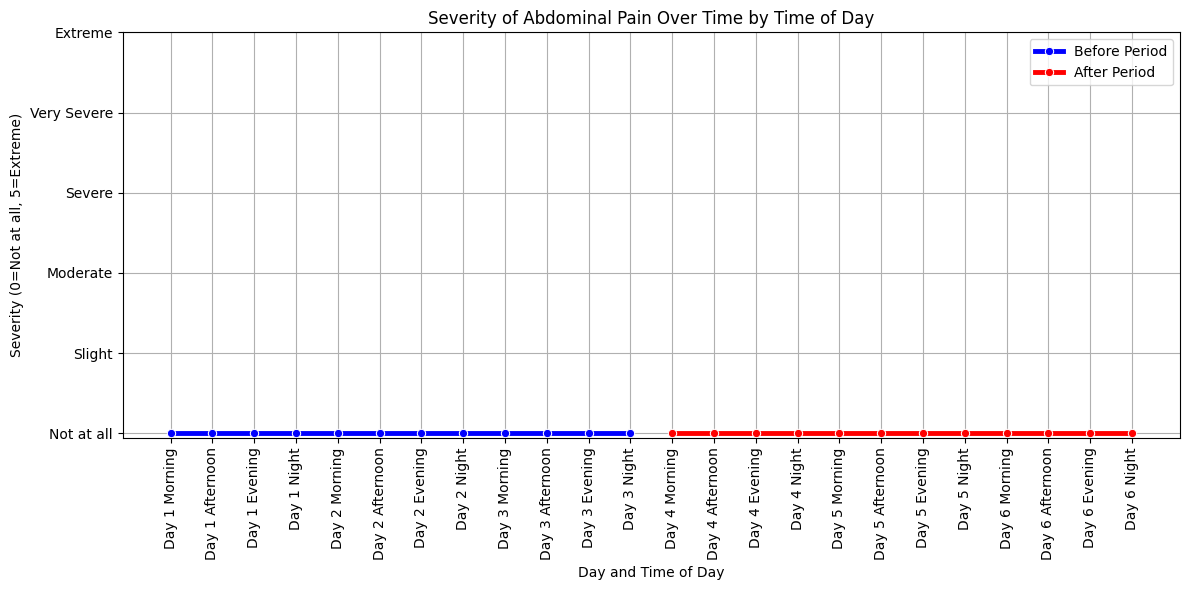

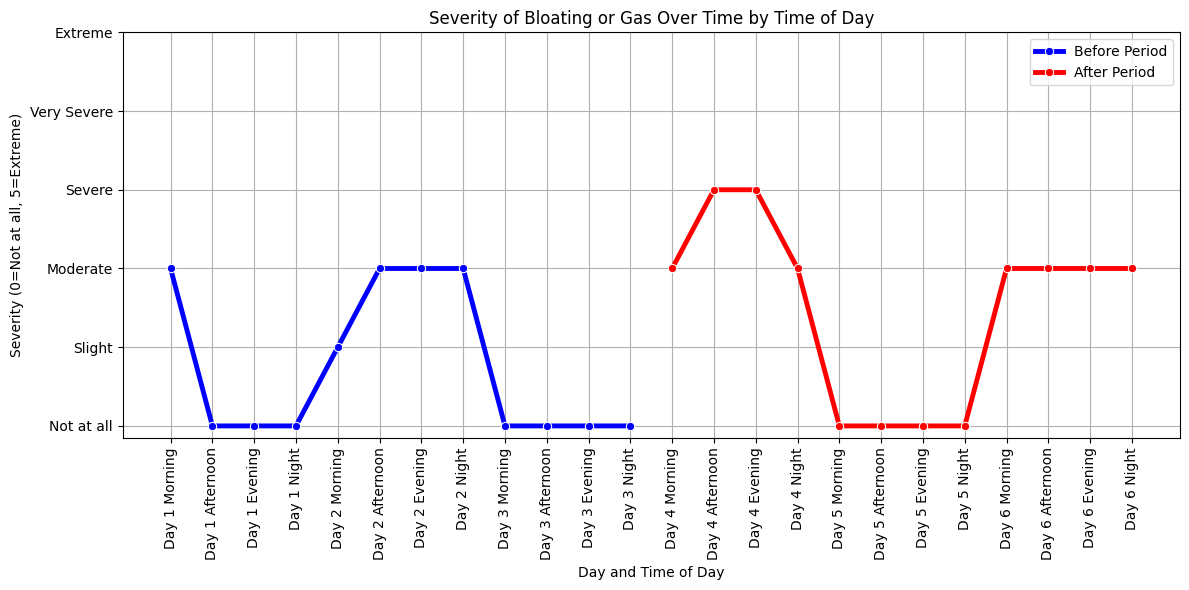

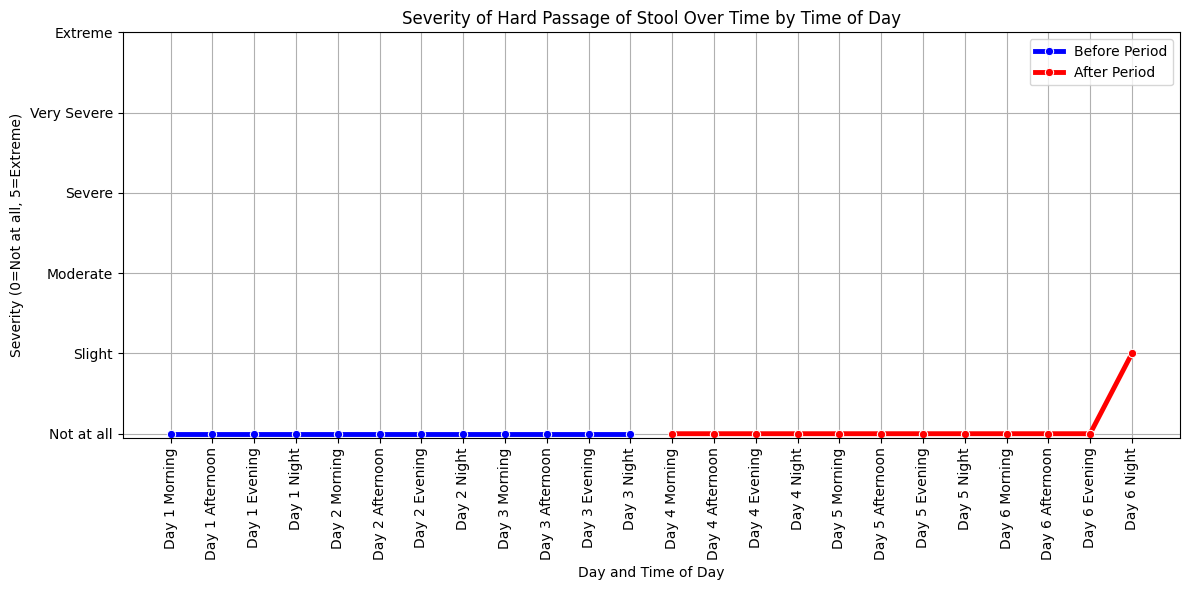

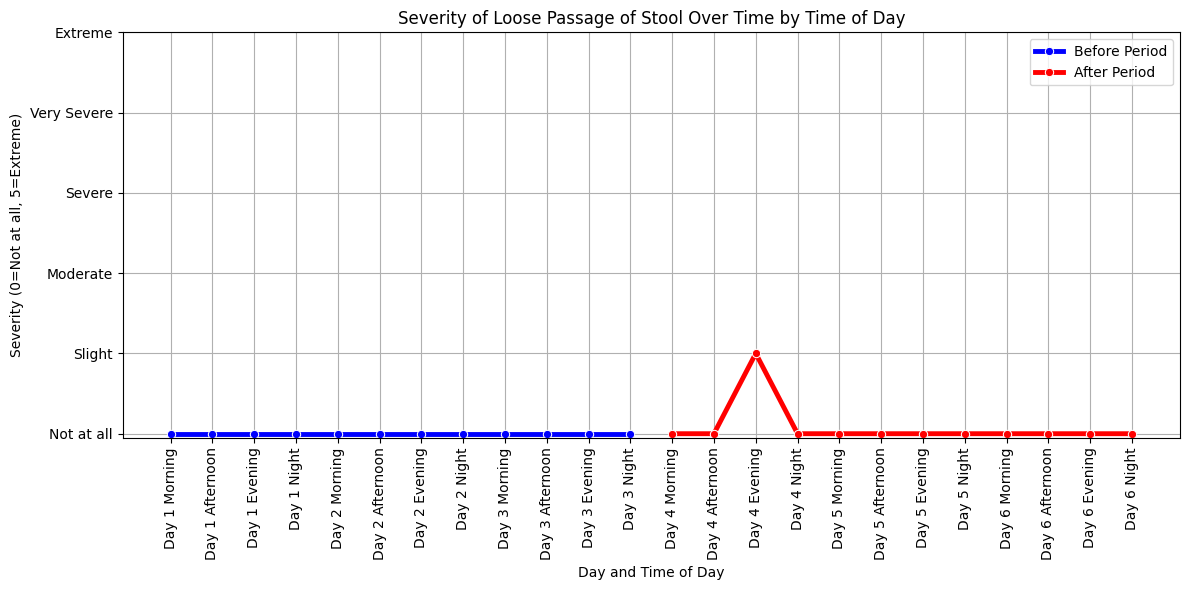

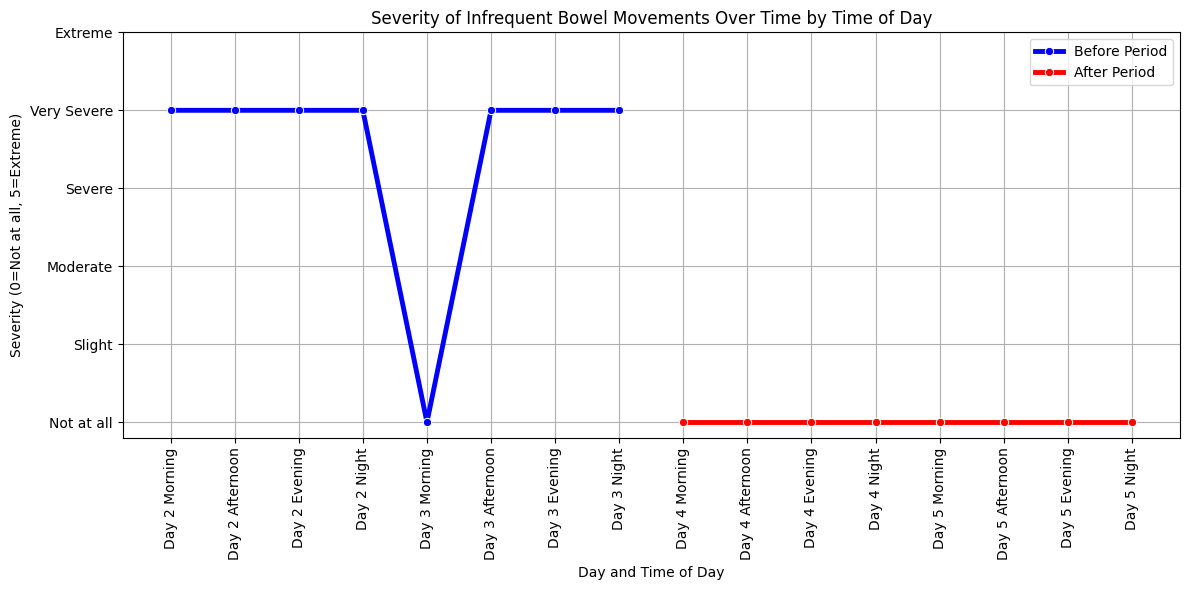

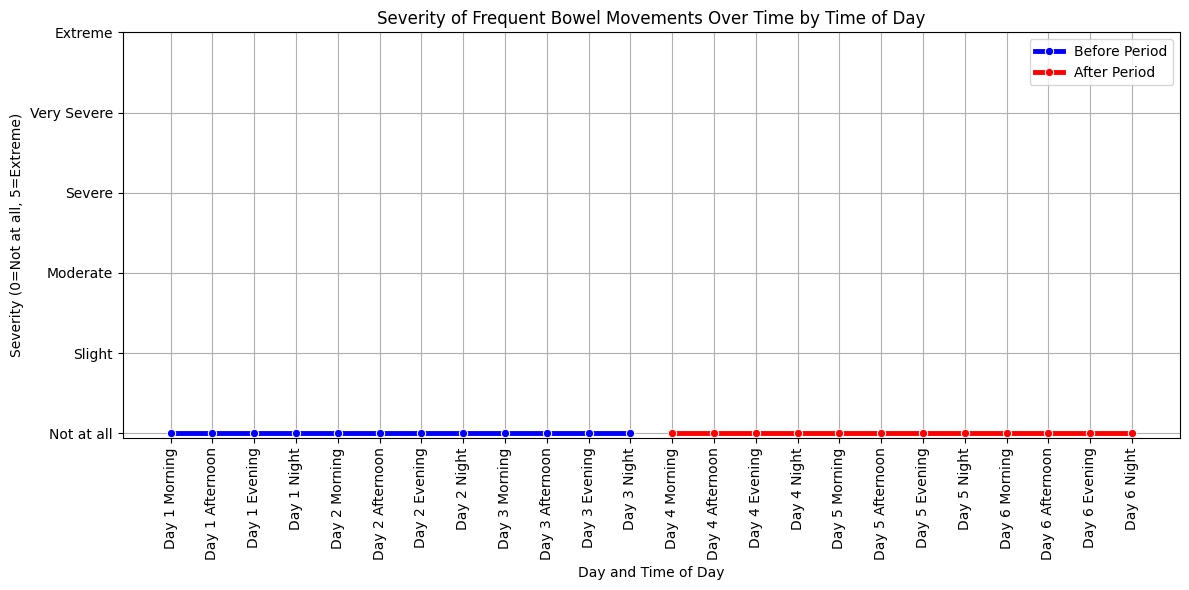

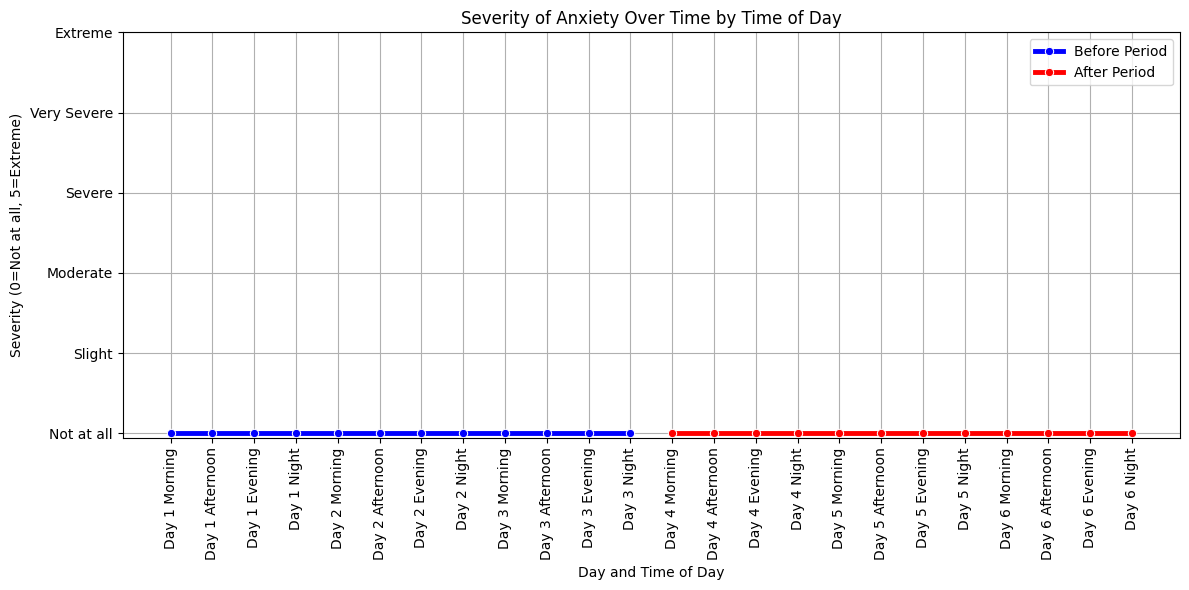

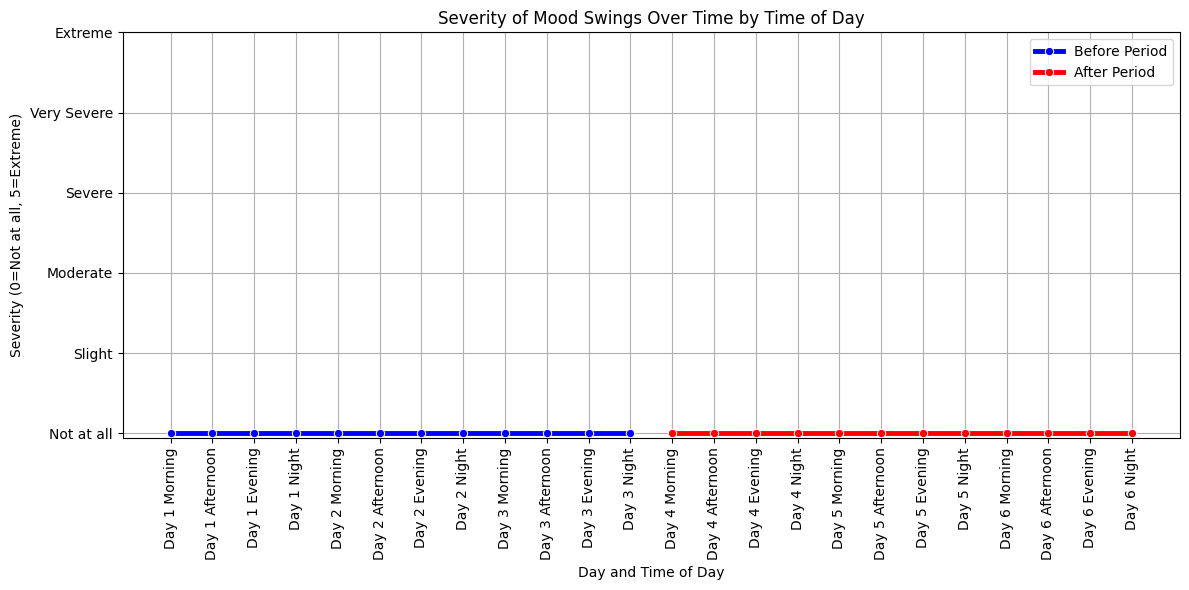

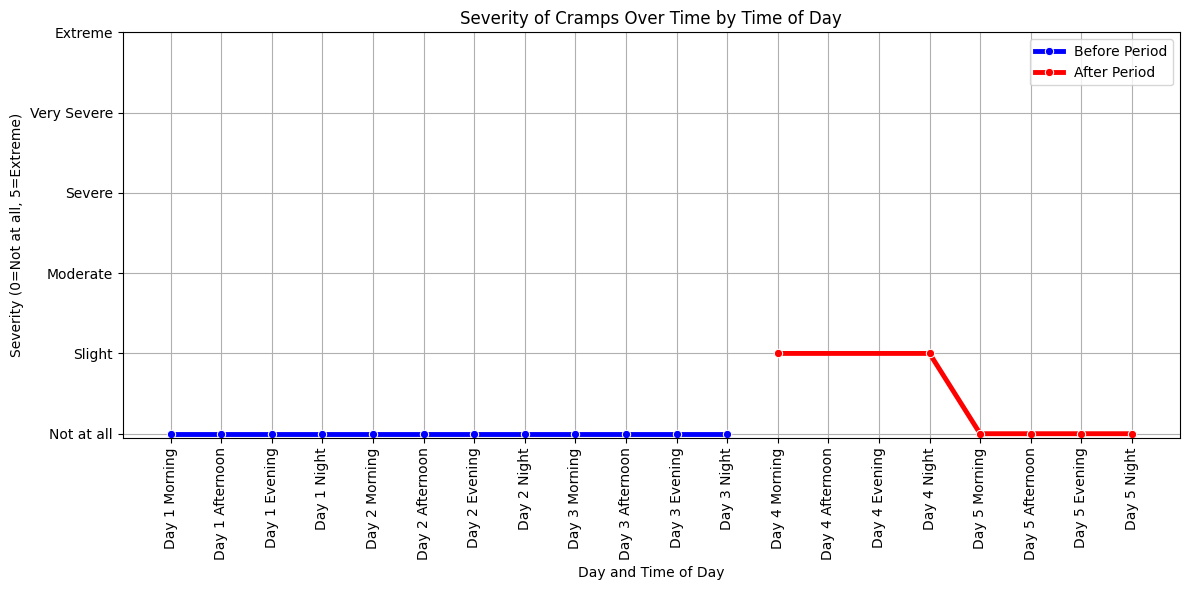

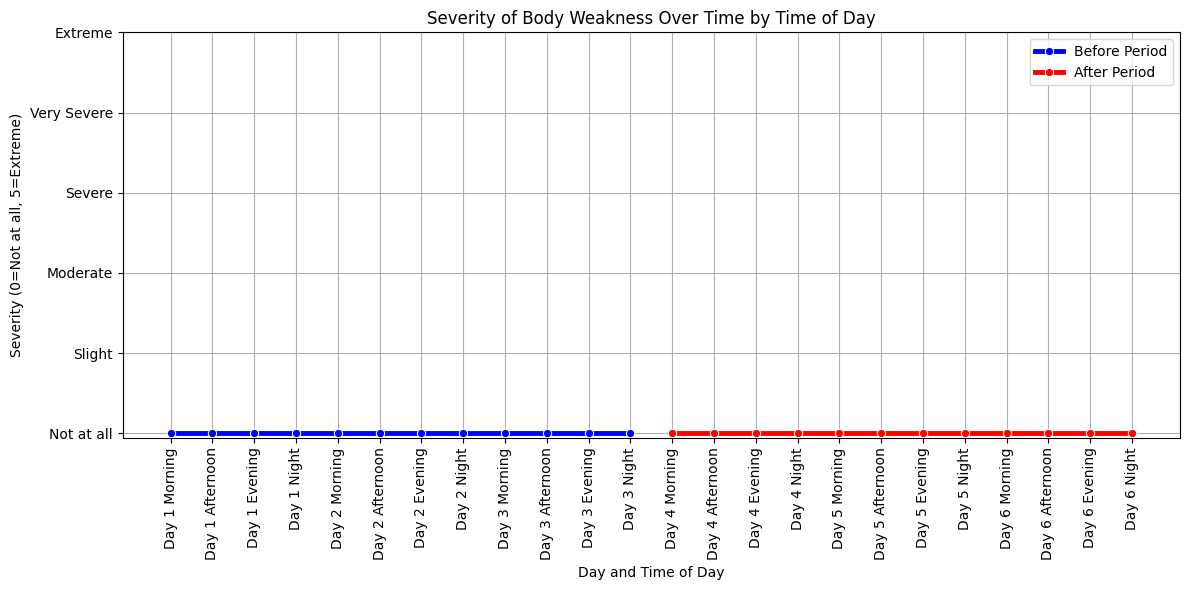

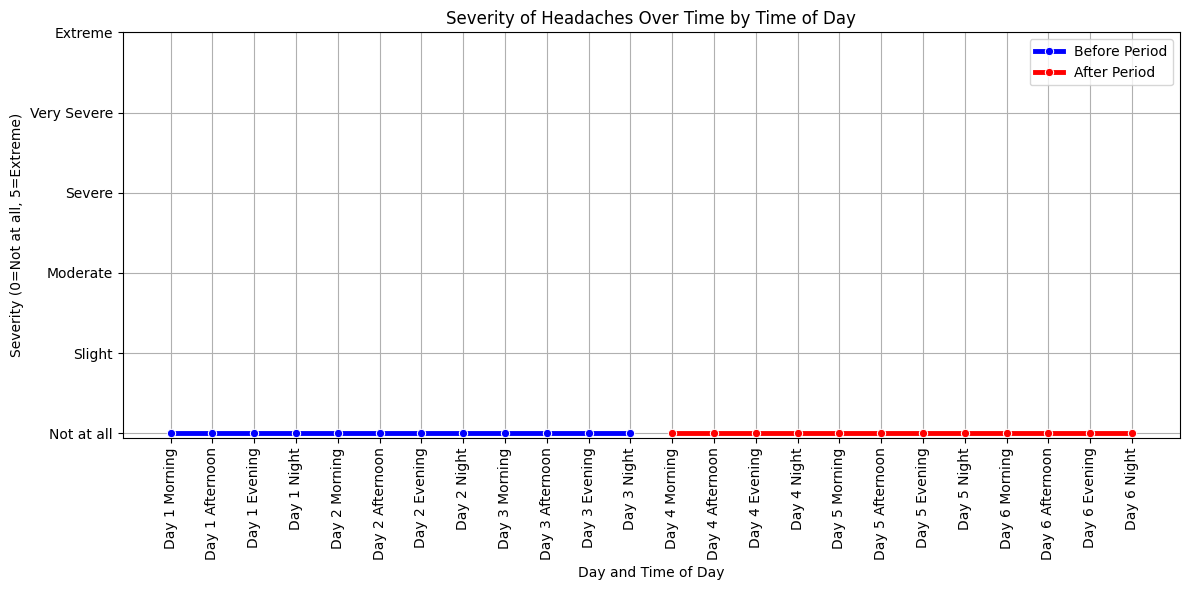

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Create a directory to save plots if it doesn't exist
output_dir = "/content/drive/MyDrive/symptom_plots_68"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load your CSV file
df_org = pd.read_csv("Symptoms - 73.csv")

# Filter for just one symptom
for i in df_org['symptom_name'].unique():
    symptom = i
    df = df_org[df_org['symptom_name'] == symptom].copy().reset_index(drop=True)

    # Assign sequence numbers to use instead of date
    df['sequence'] = df.index + 1

    # Map severity levels to numeric values
    severity_mapping = {
        "Not at all": 0,
        "Slight": 1,
        "Moderate": 2,
        "Severe": 3,
        "Very Severe": 4
    }
    for time in ['morning_severity', 'afternoon_severity', 'evening_severity', 'night_severity']:
        df[time] = df[time].map(severity_mapping)

    # Melt to long format
    df_melted = df.melt(
        id_vars='sequence',
        value_vars=['morning_severity', 'afternoon_severity', 'evening_severity', 'night_severity'],
        var_name='time_of_day',
        value_name='severity'
    )

    # Clean and order time_of_day values
    df_melted['time_of_day'] = df_melted['time_of_day'].str.replace('_severity', '').str.title()
    df_melted['time_of_day'] = pd.Categorical(df_melted['time_of_day'],
                                            categories=['Morning', 'Afternoon', 'Evening', 'Night'],
                                            ordered=True)

    # Sort and build x-axis labels like "Day 1 Morning", etc.
    df_melted = df_melted.sort_values(by=['sequence', 'time_of_day'])
    df_melted['day_time'] = df_melted.apply(lambda row: f"Day {row['sequence']} {row['time_of_day']}", axis=1)

    # Create a period marker (before/after day 4)
    df_melted['period'] = df_melted['sequence'].apply(lambda x: 'Before Period' if x < 4 else 'After Period')

    # Plot
    plt.figure(figsize=(12, 6))

    # Plot with two different colors based on period
    sns.lineplot(
        data=df_melted,
        x='day_time',
        y='severity',
        hue='period',
        marker='o',
        linewidth=3.5,
        palette={'Before Period': 'blue', 'After Period': 'red'}
    )

    plt.title(f'Severity of {i} Over Time by Time of Day')
    plt.xlabel('Day and Time of Day')
    plt.ylabel('Severity (0=Not at all, 5=Extreme)')
    plt.xticks(rotation=90)
    plt.yticks(range(6), ['Not at all', 'Slight', 'Moderate', 'Severe', 'Very Severe', 'Extreme'])
    plt.grid(True)
    plt.legend(title='')
    plt.tight_layout()

    # Save the plot as a PNG file in Google Drive
    clean_symptom_name = symptom.replace(' ', '_').replace('/', '_').lower()
    filename = f"{output_dir}/symptom_67_{clean_symptom_name}.png"
    plt.savefig(filename, dpi=300)

    # Show the plot (optional)
    plt.show()

    # Close the figure to free up memory
    plt.close()

Mounted at /content/drive


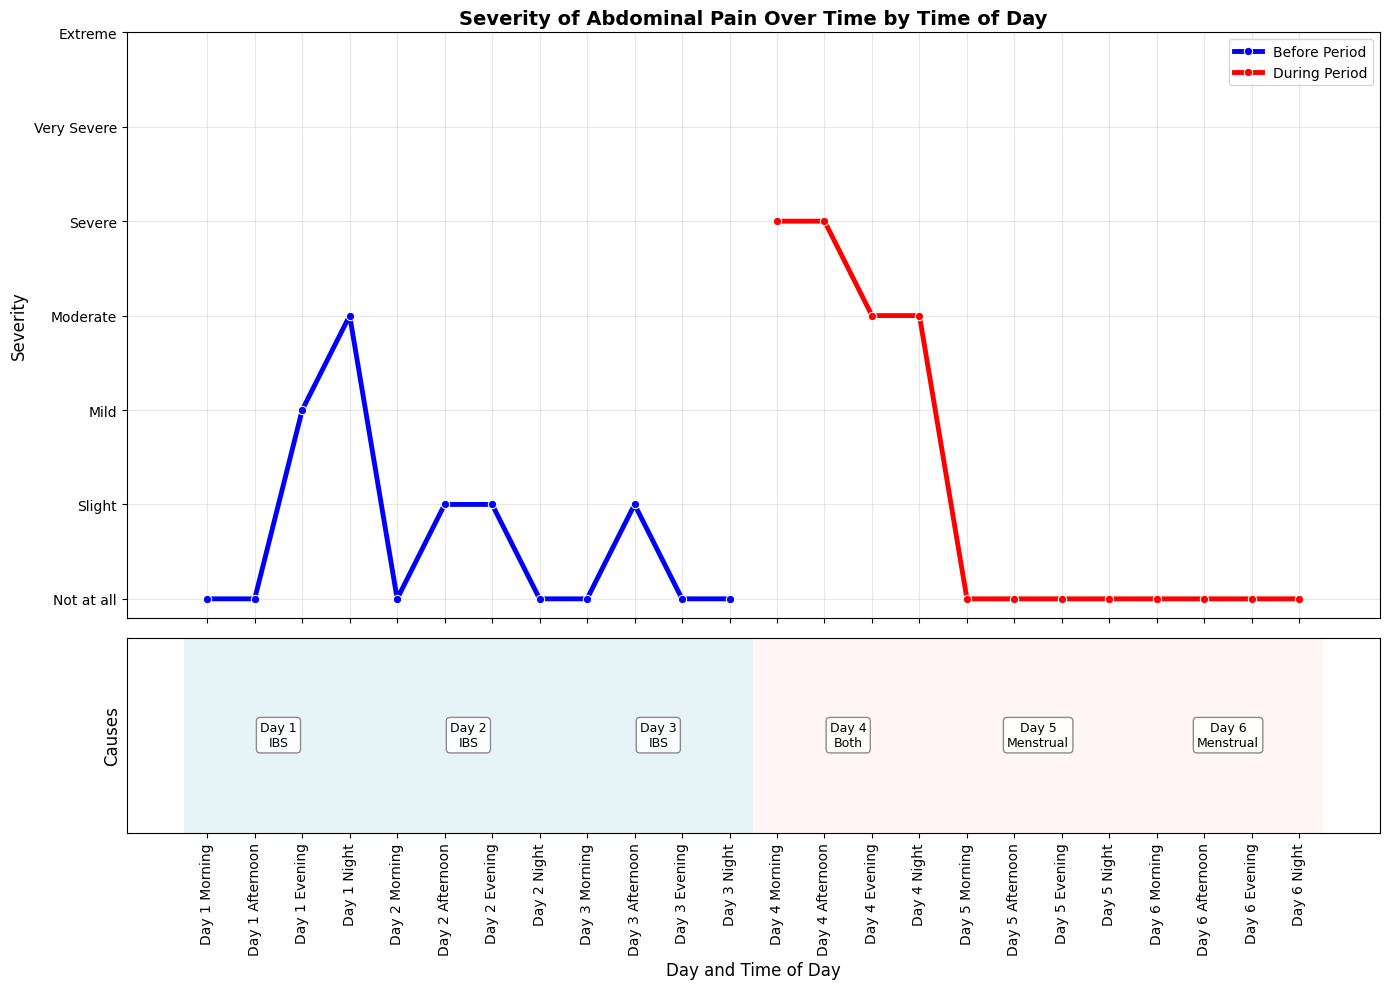

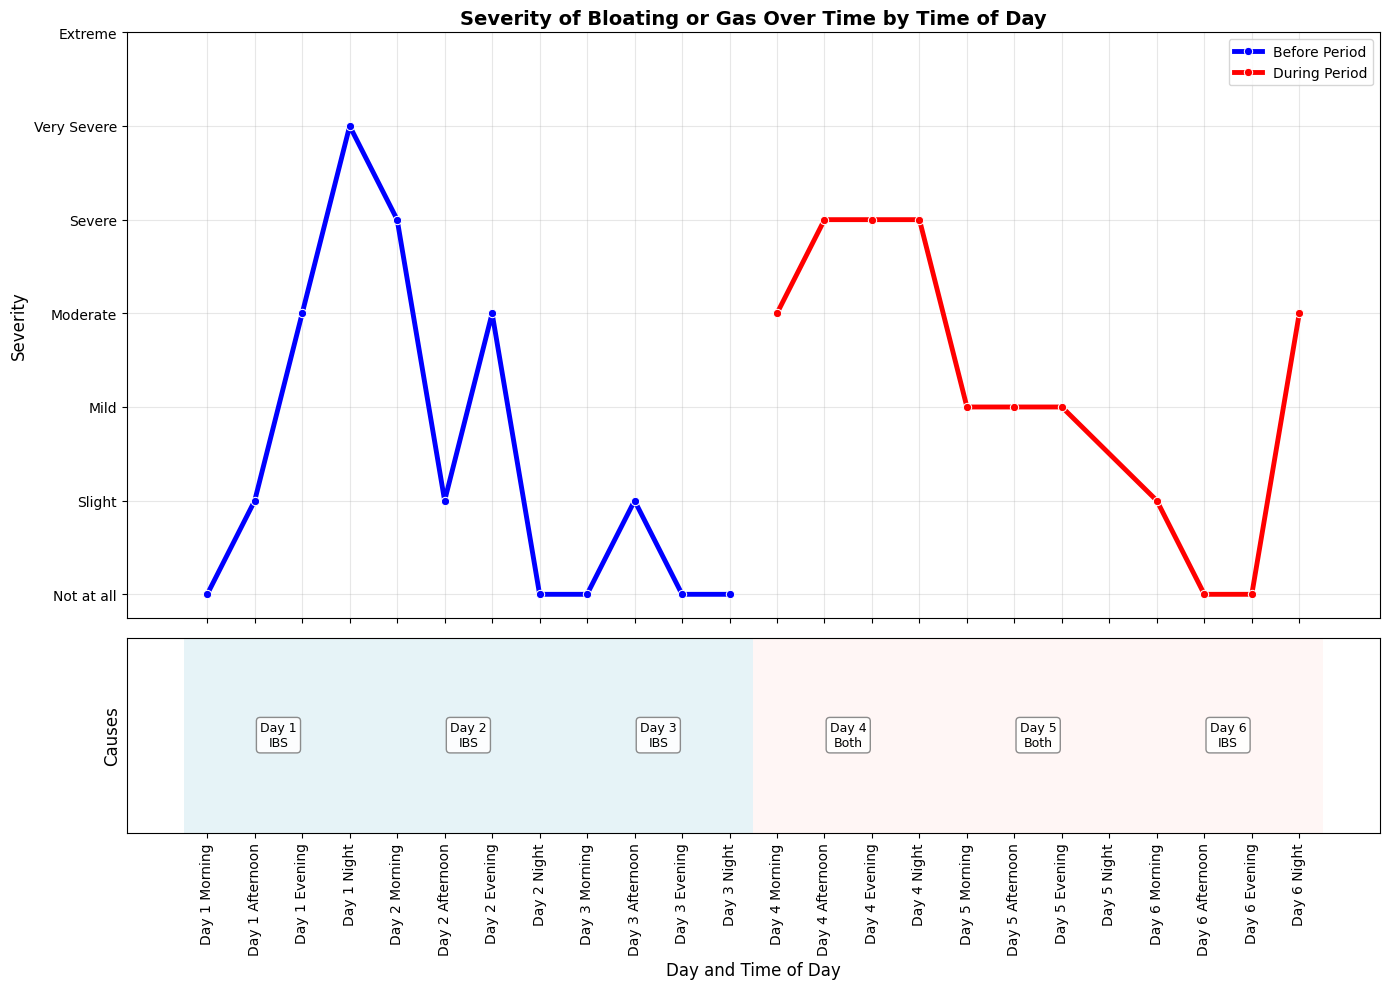

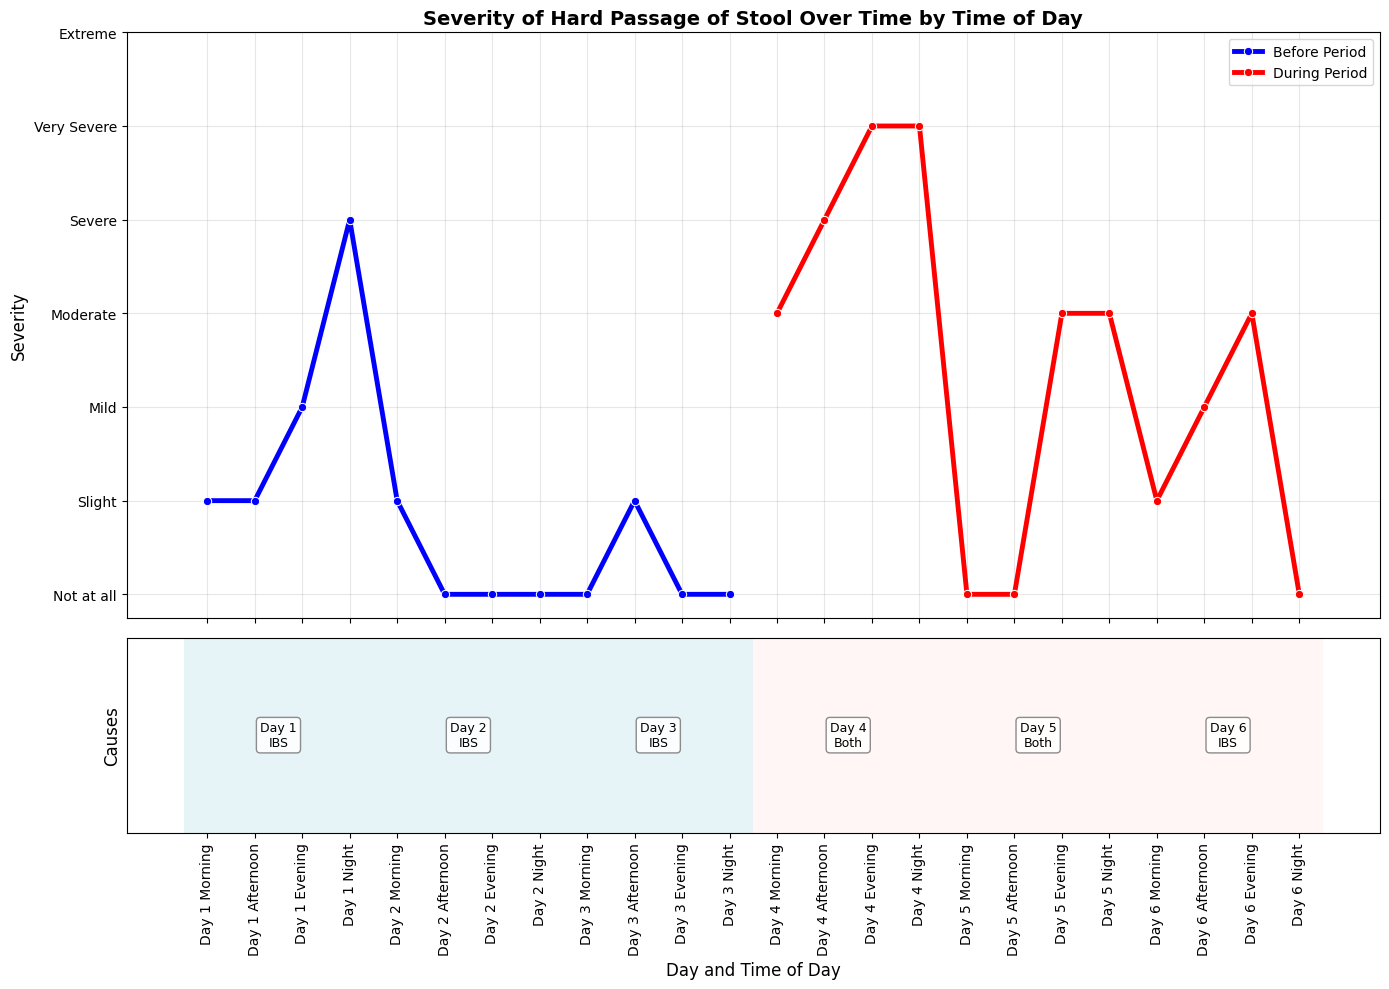

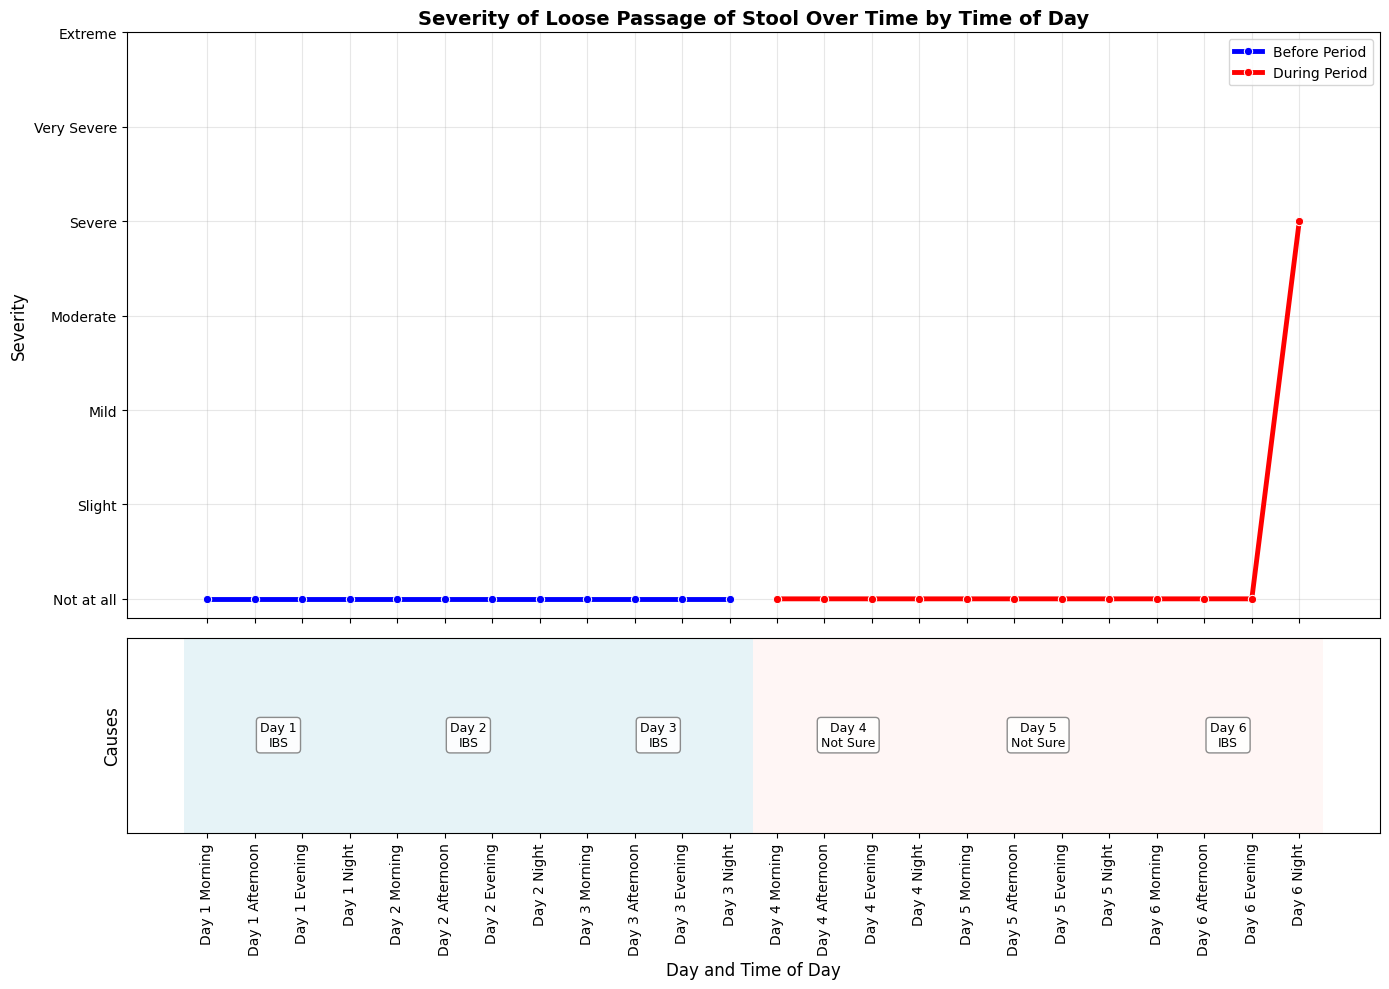

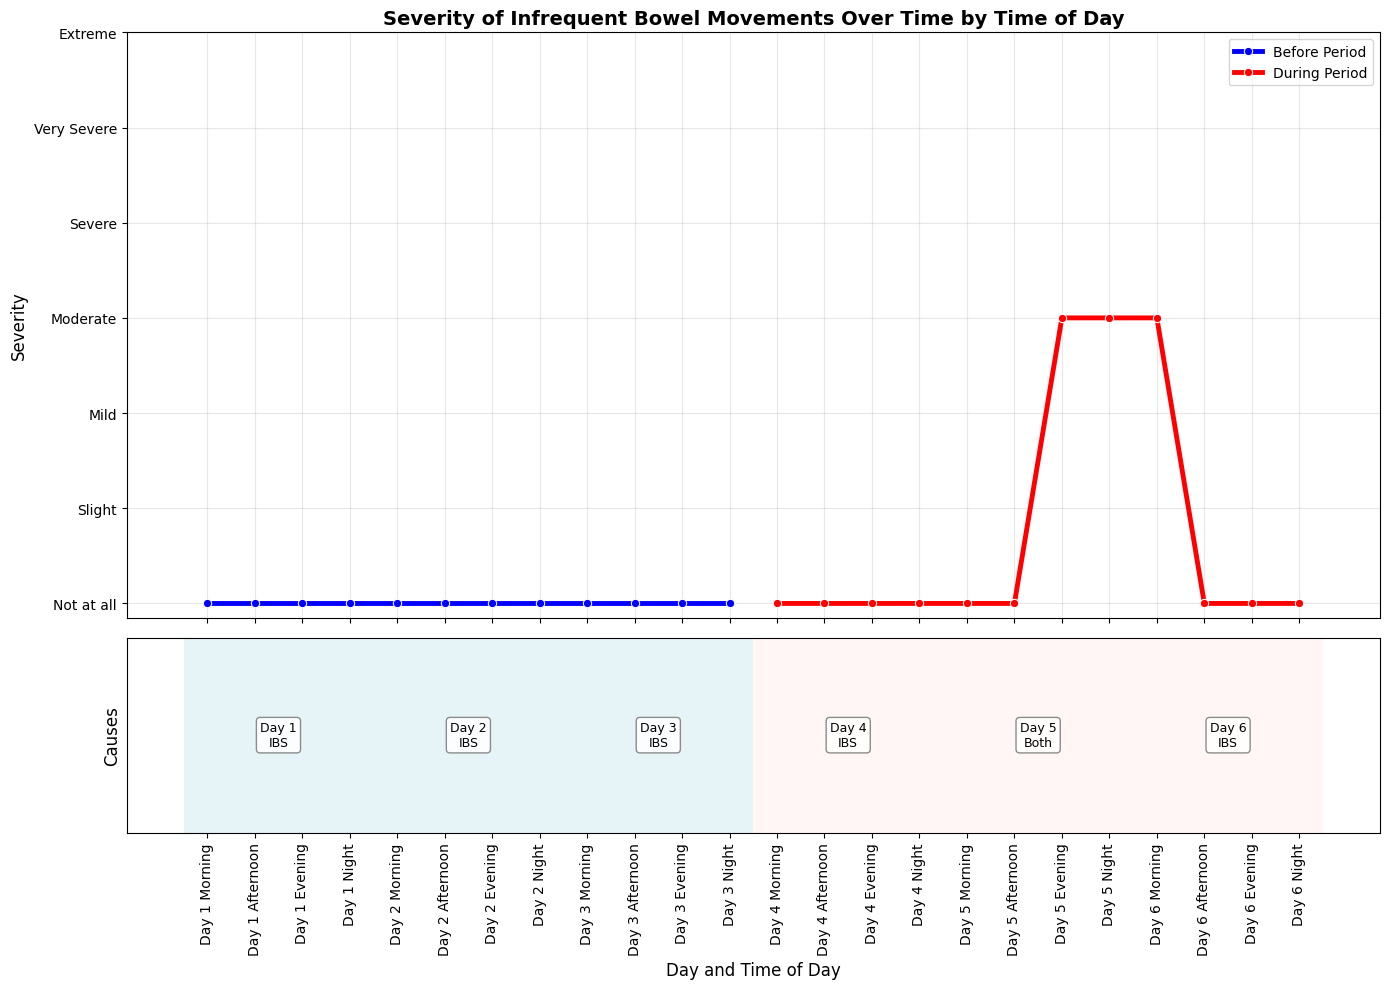

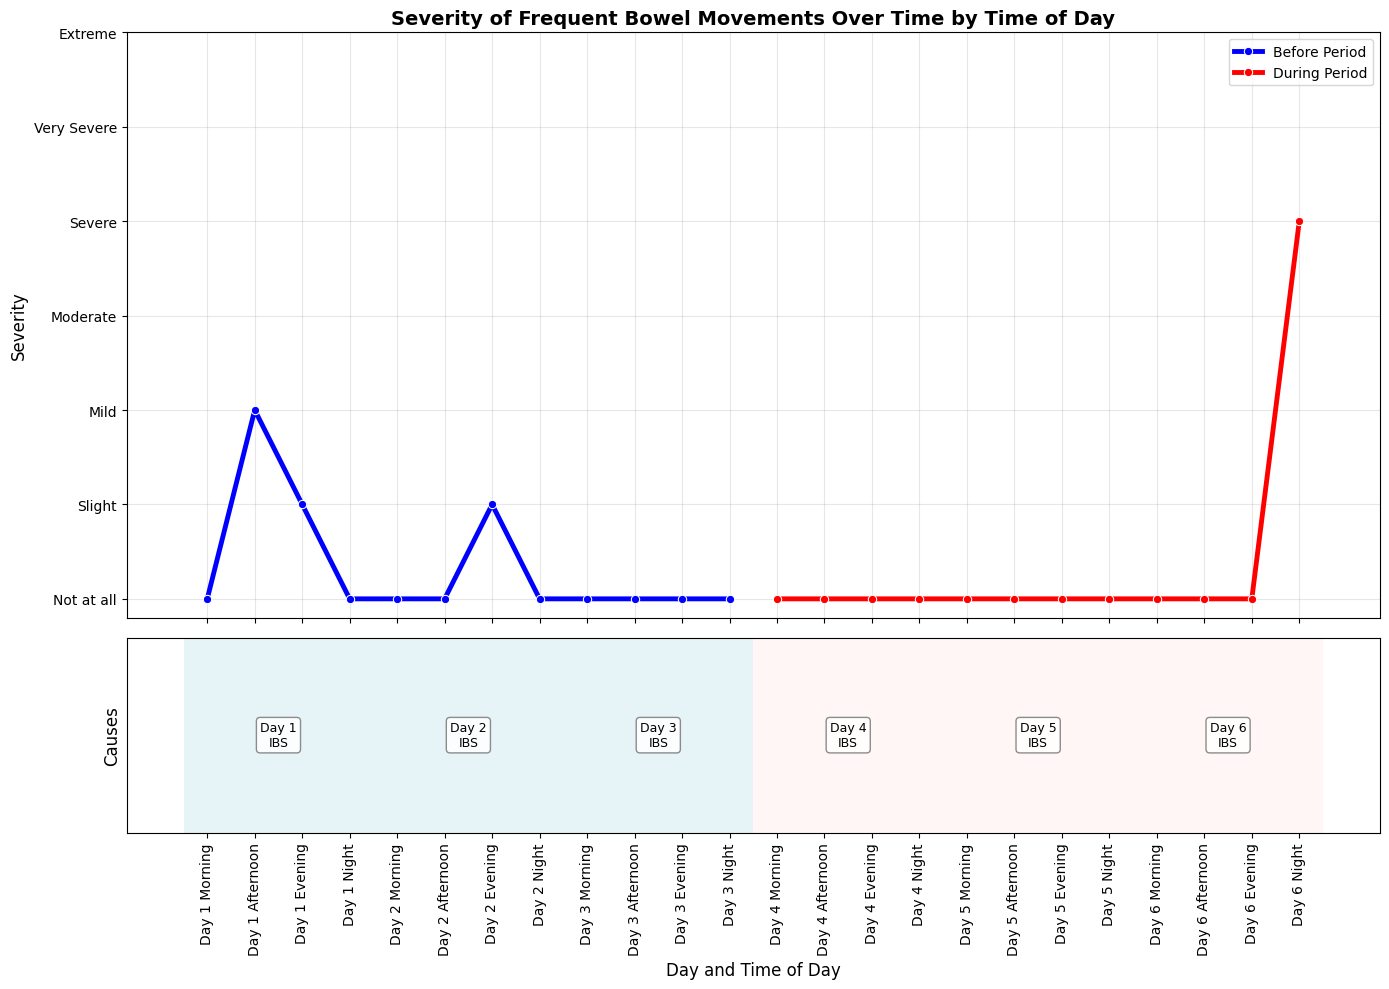

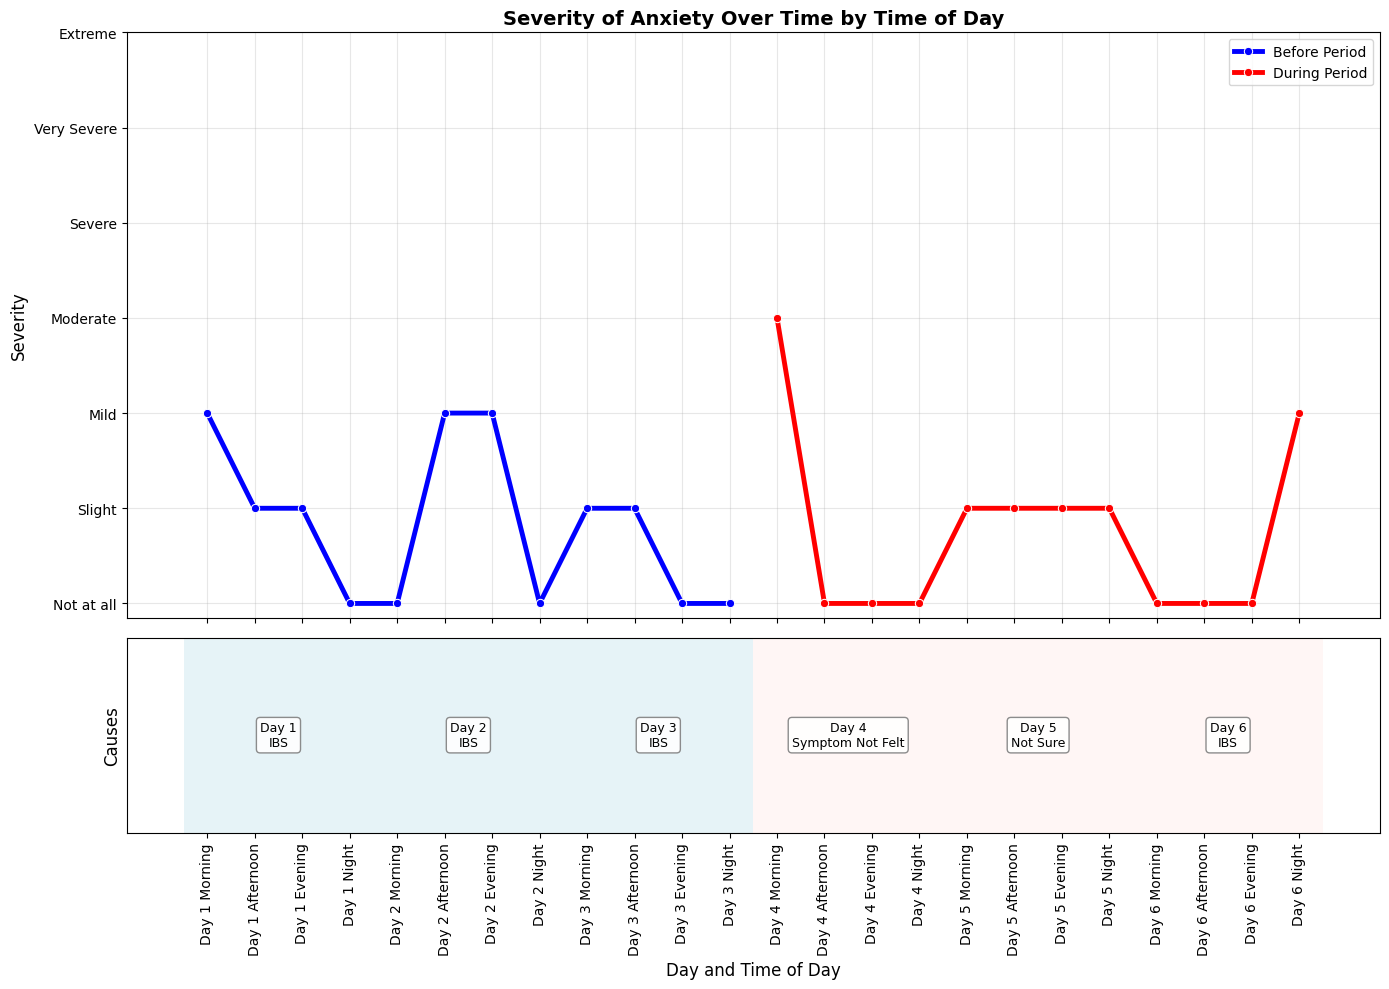

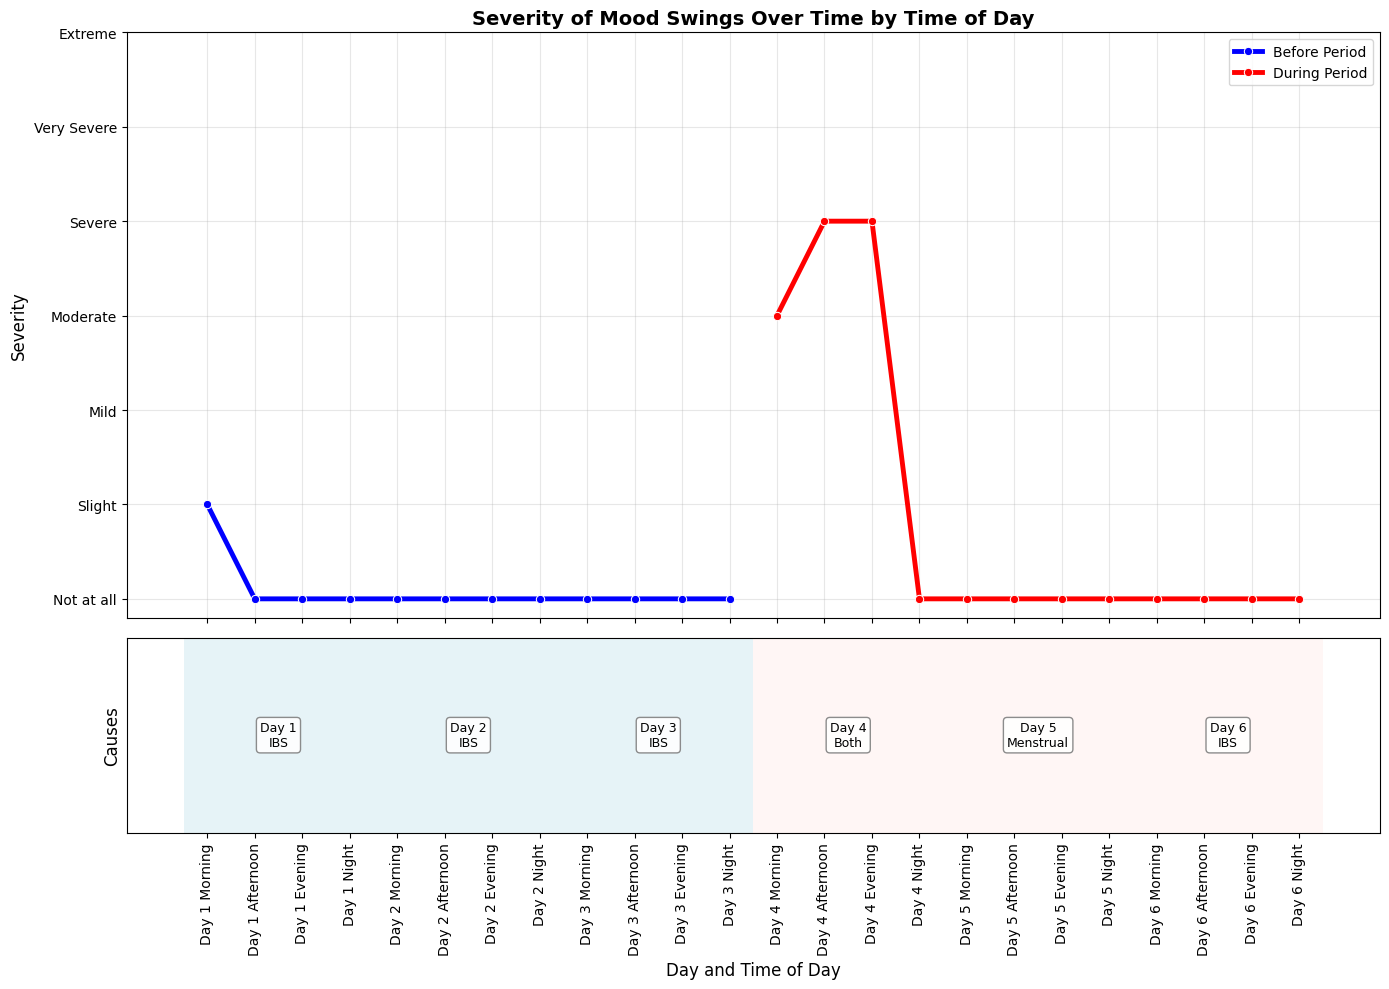

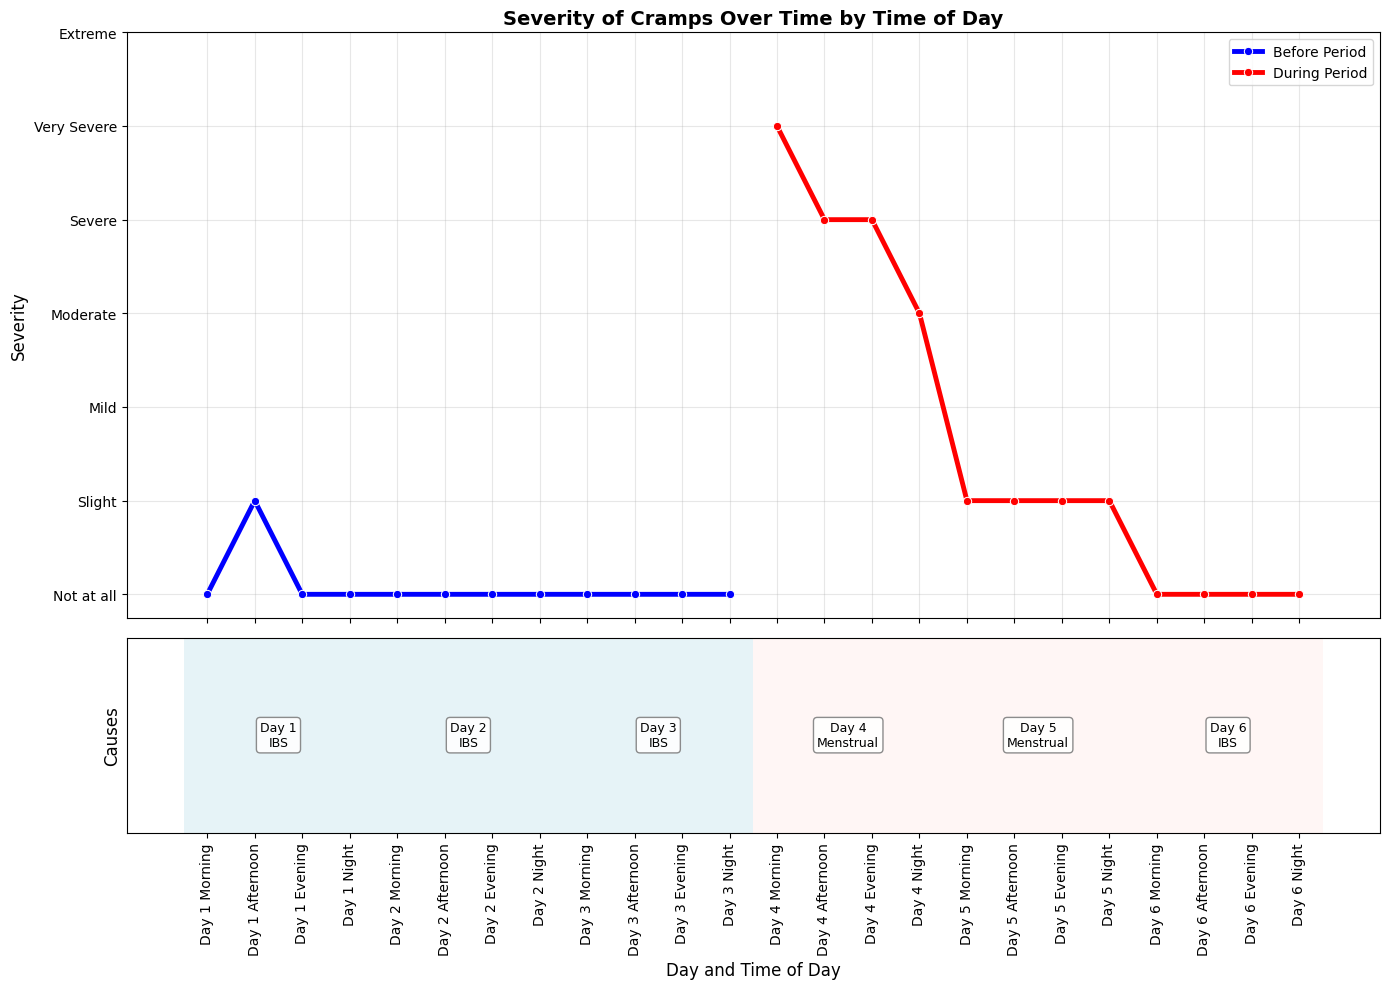

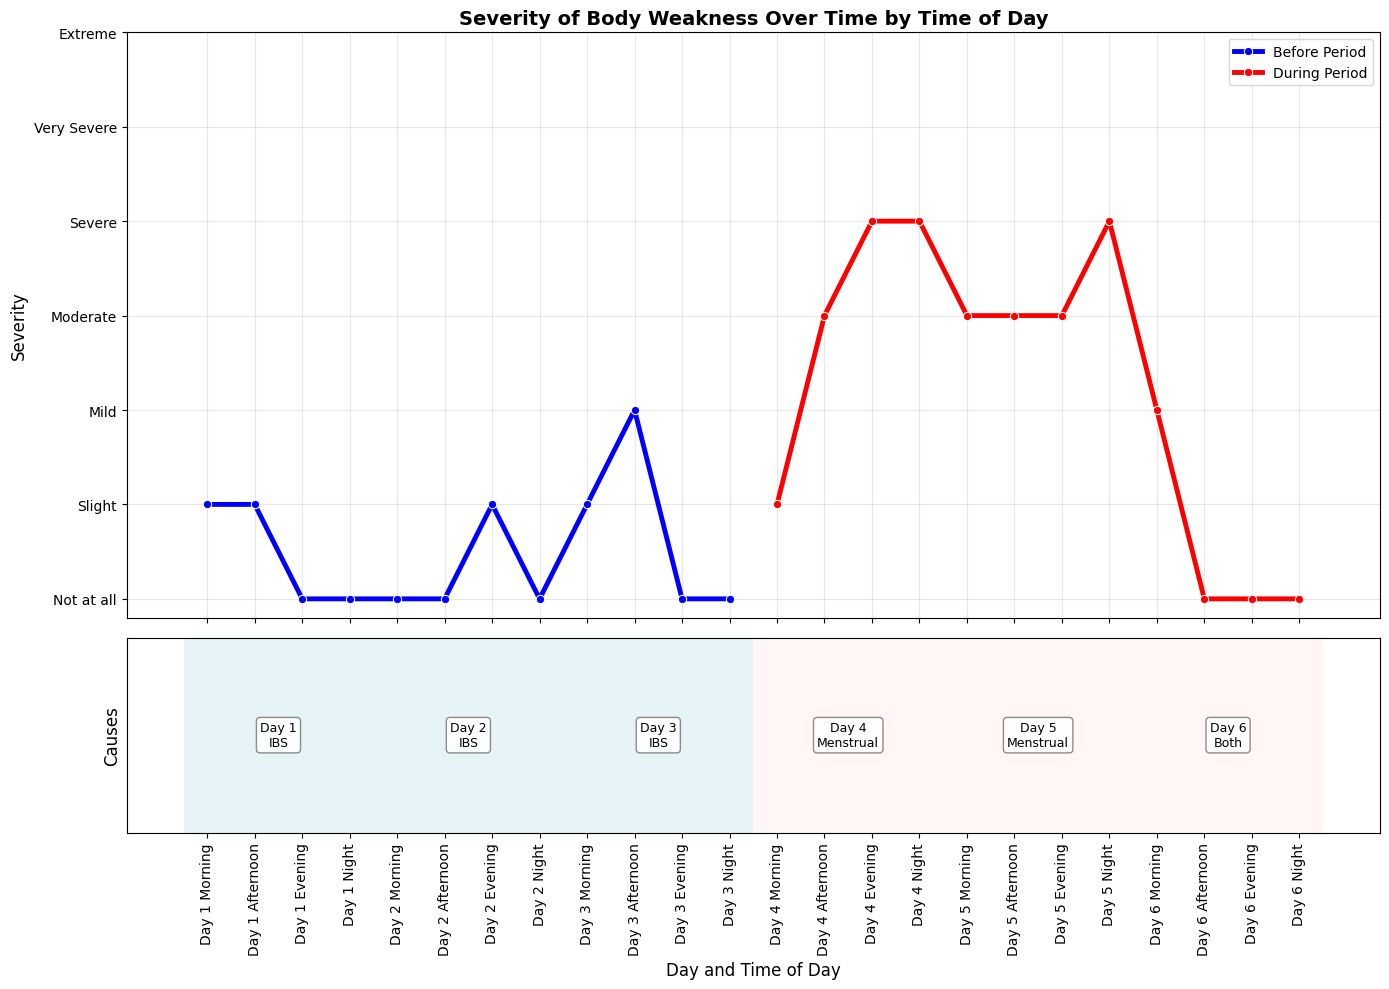

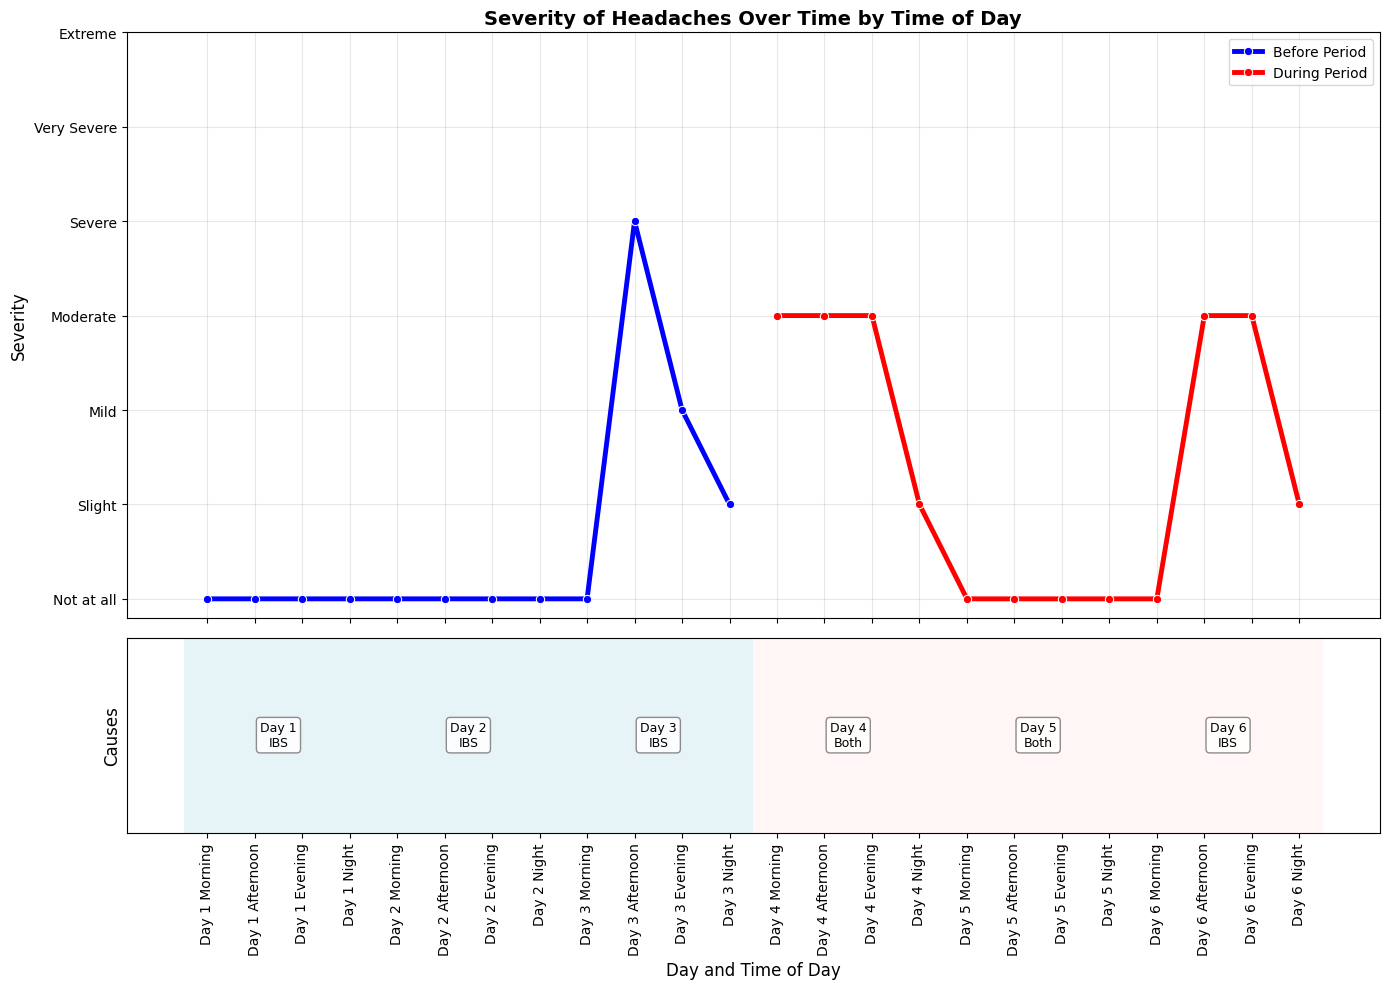

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Create a directory to save plots if it doesn't exist
output_dir = "/content/drive/MyDrive/symptom_plots_68"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load your CSV file
df_org = pd.read_csv("Symptoms - 72.csv")

# Filter for just one symptom
for i in df_org['symptom_name'].unique():
    symptom = i
    df = df_org[df_org['symptom_name'] == symptom].copy().reset_index(drop=True)

    # Assign sequence numbers to use instead of date
    df['sequence'] = df.index + 1

    # Create a period marker (before/during day 4)
    df['period'] = df['sequence'].apply(lambda x: 'Before Period' if x < 4 else 'During Period')

    # Map severity levels to numeric values
    # Updated to include "Mild" after "Slight"
    severity_mapping = {
        "Not at all": 0,
        "Slight": 1,
        "Mild": 2,
        "Moderate": 3,
        "Severe": 4,
        "Very Severe": 5
    }
    for time in ['morning_severity', 'afternoon_severity', 'evening_severity', 'night_severity']:
        df[time] = df[time].map(severity_mapping)

    # Melt to long format
    df_melted = df.melt(
        id_vars=['sequence', 'period', 'cause'],  # Include cause
        value_vars=['morning_severity', 'afternoon_severity', 'evening_severity', 'night_severity'],
        var_name='time_of_day',
        value_name='severity'
    )

    # Clean and order time_of_day values
    df_melted['time_of_day'] = df_melted['time_of_day'].str.replace('_severity', '').str.title()
    df_melted['time_of_day'] = pd.Categorical(df_melted['time_of_day'],
                                            categories=['Morning', 'Afternoon', 'Evening', 'Night'],
                                            ordered=True)

    # Sort and build x-axis labels like "Day 1 Morning", etc.
    df_melted = df_melted.sort_values(by=['sequence', 'time_of_day'])
    df_melted['day_time'] = df_melted.apply(lambda row: f"Day {row['sequence']} {row['time_of_day']}", axis=1)

    # Create a figure with 2 rows
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

    # Plot 1: Severity over time with two different colors based on period
    sns.lineplot(
        data=df_melted,
        x='day_time',
        y='severity',
        hue='period',
        marker='o',
        linewidth=3.5,
        palette={'Before Period': 'blue', 'During Period': 'red'},
        ax=ax1
    )

    ax1.set_title(f'Severity of {i} Over Time by Time of Day', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Severity', fontsize=12)

    # Update y-ticks to include "Mild"
    ax1.set_yticks(range(7))  # Increased to 7 levels (0-6)
    ax1.set_yticklabels(['Not at all', 'Slight', 'Mild', 'Moderate', 'Severe', 'Very Severe', 'Extreme'])
    ax1.grid(True, alpha=0.3)
    ax1.legend(title='', loc='upper right')

    # Plot 2: Create a visualization for causes by day
    ax2.set_yticks([])  # Hide Y-axis
    ax2.set_ylabel('Causes', fontsize=12)
    ax2.grid(False)

    # Fill the background with period colors
    for day in df['sequence'].unique():
        # Find the x-positions for this day's data points
        day_data = df_melted[df_melted['sequence'] == day]
        if len(day_data) > 0:
            # Get all x positions for this day
            day_times = day_data['day_time'].unique()
            x_positions = [list(df_melted['day_time'].unique()).index(dt) for dt in day_times]
            start_pos = min(x_positions) - 0.5
            end_pos = max(x_positions) + 0.5

            # Draw a colored background for this day based on the period
            period = 'Before Period' if day < 4 else 'During Period'
            color = 'lightblue' if period == 'Before Period' else 'mistyrose'
            ax2.axvspan(start_pos, end_pos, facecolor=color, alpha=0.3)

            # Add the cause text for this day
            cause = df[df['sequence'] == day]['cause'].iloc[0]

            # Calculate middle position for the text
            mid_pos = (start_pos + end_pos) / 2

            # Add a text box with the day and cause
            text = f"Day {day}\n{cause}"
            text_box = ax2.text(
                mid_pos, 0.5, text,
                ha='center', va='center',
                fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.9),
                wrap=True
            )

    # Adjust x-axis
    plt.xticks(range(len(df_melted['day_time'].unique())), df_melted['day_time'].unique(), rotation=90)
    plt.xlabel('Day and Time of Day', fontsize=12)

    plt.tight_layout()

    # Save the plot as a PNG file in Google Drive
    clean_symptom_name = symptom.replace(' ', '_').replace('/', '_').lower()
    filename = f"{output_dir}/symptom_67_{clean_symptom_name}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')

    # Show the plot (optional)
    plt.show()

    # Close the figure to free up memory
    plt.close(fig)

Mounted at /content/drive


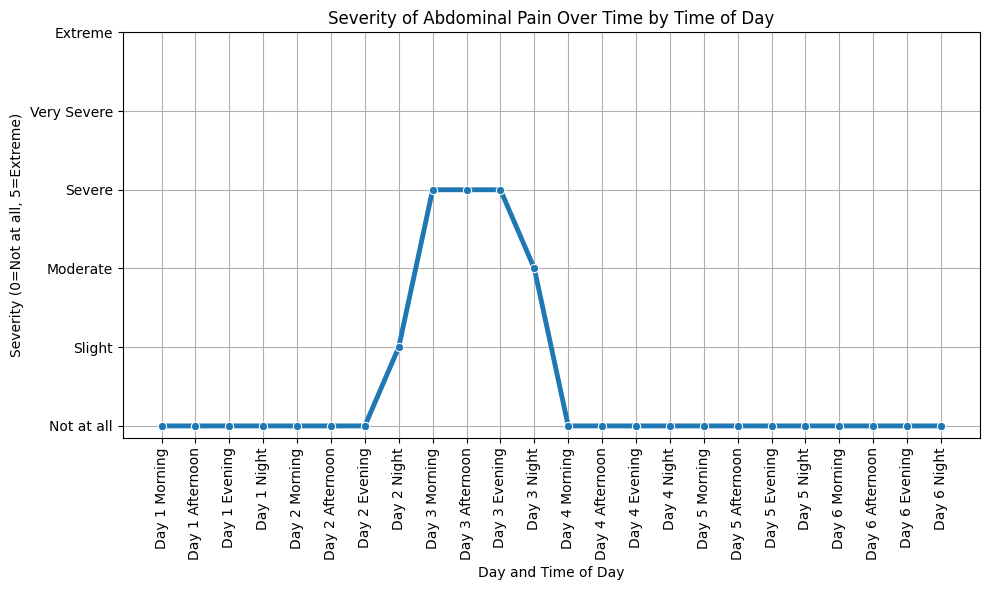

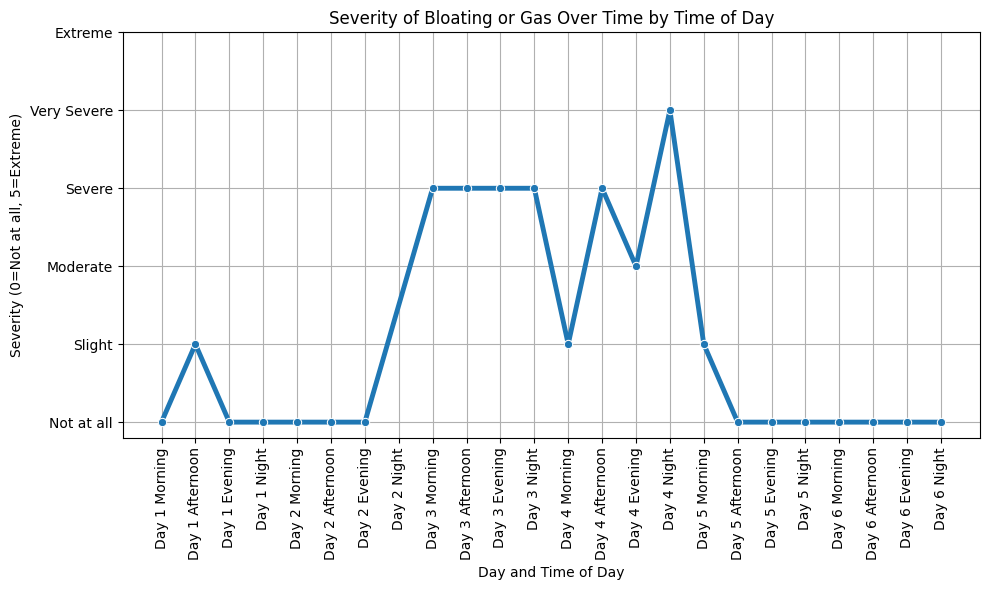

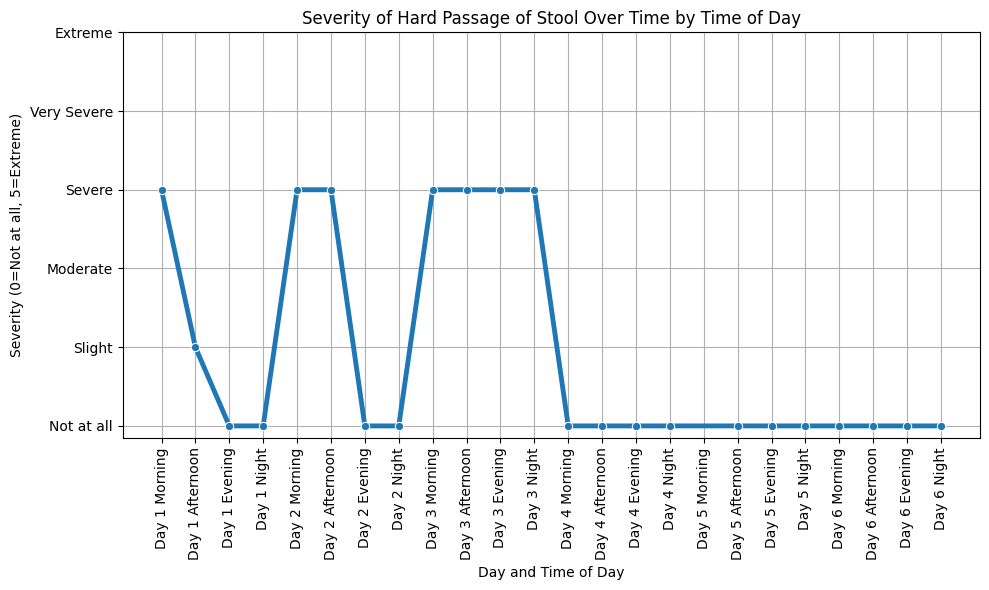

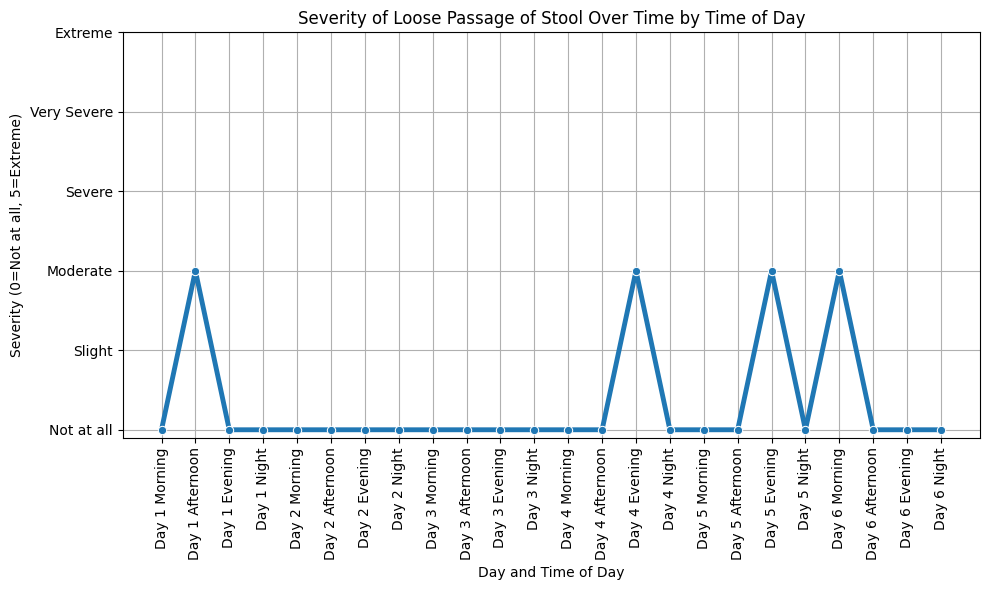

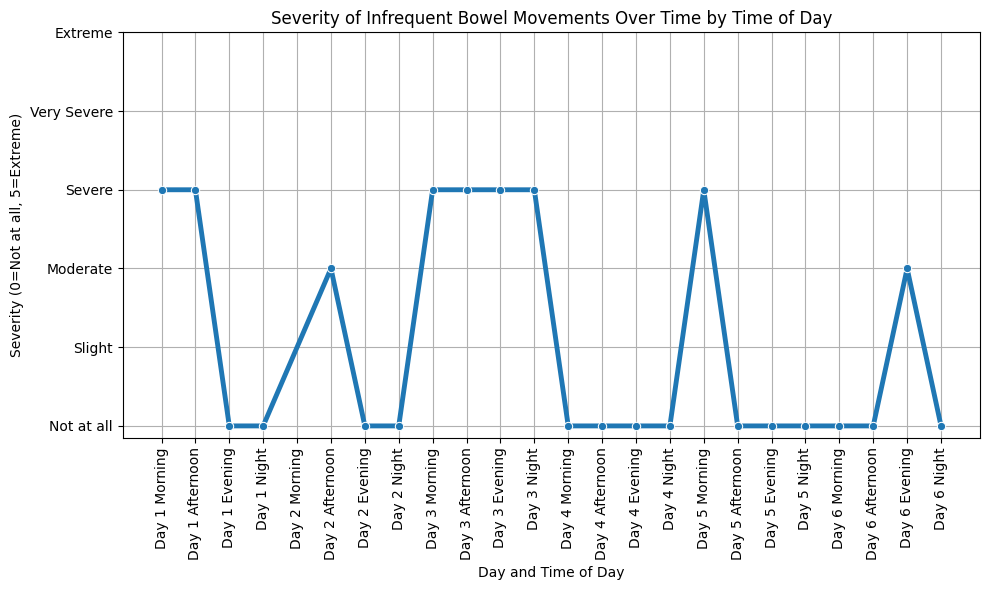

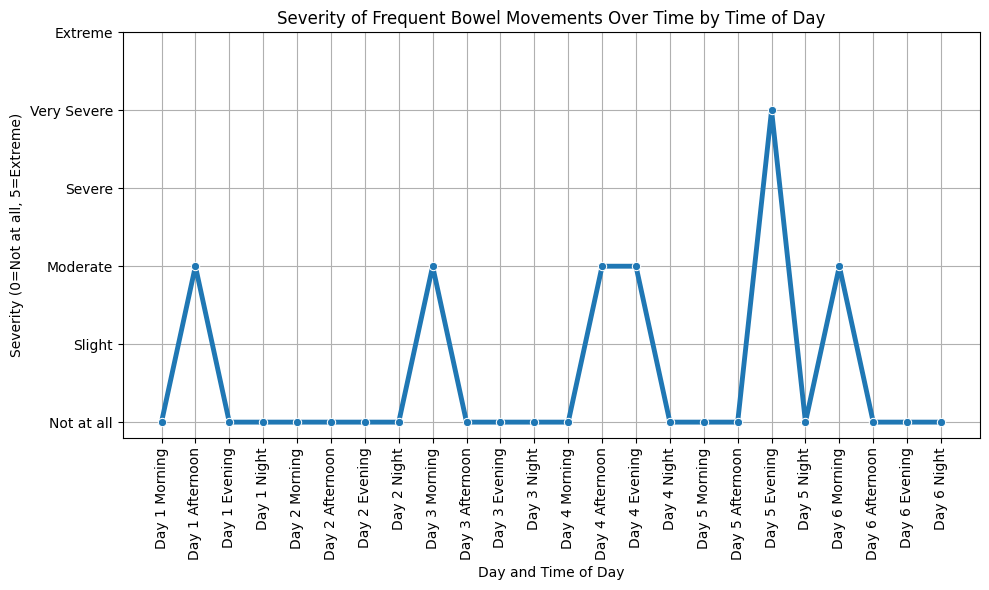

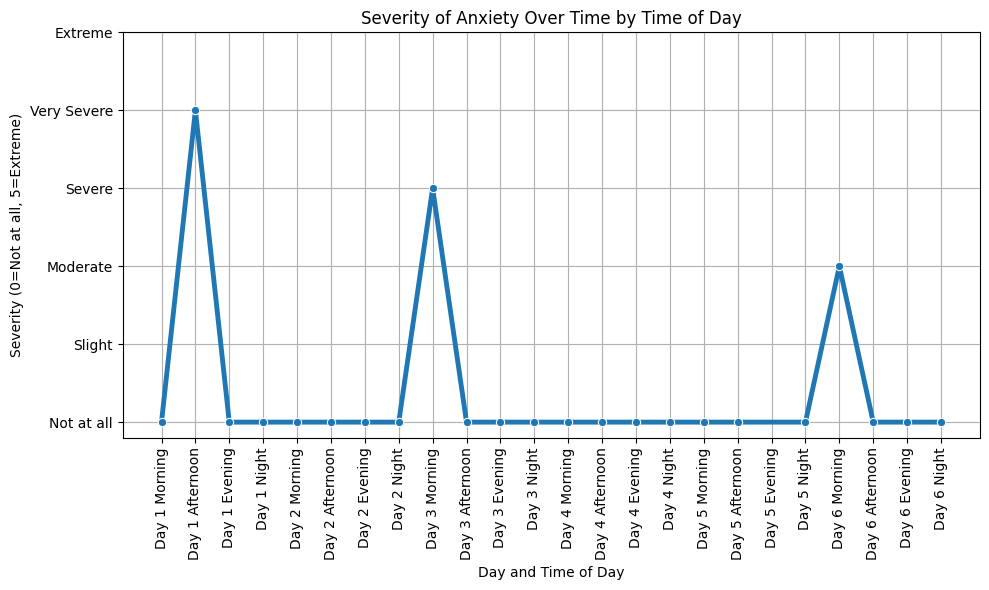

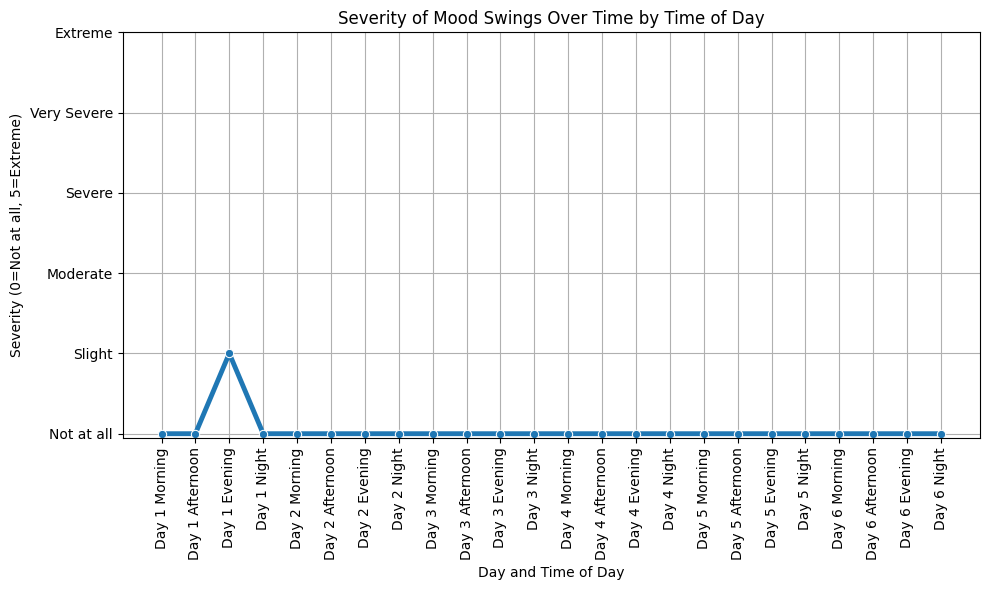

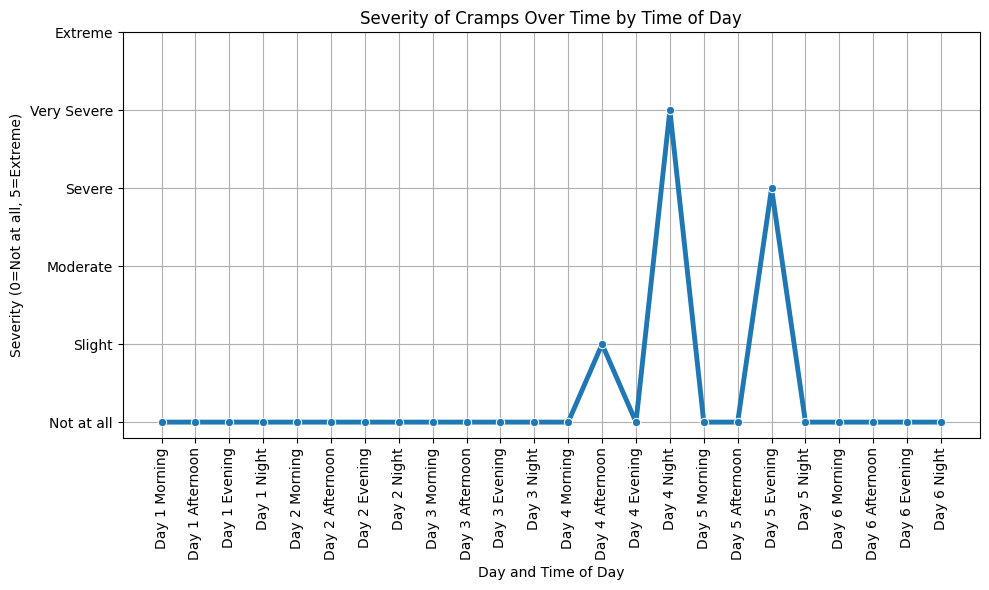

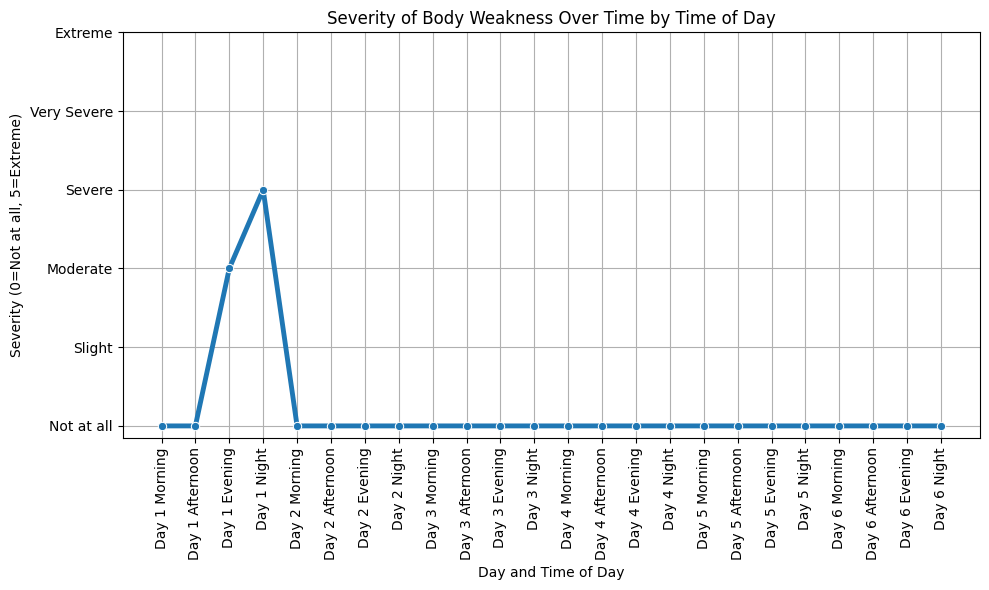

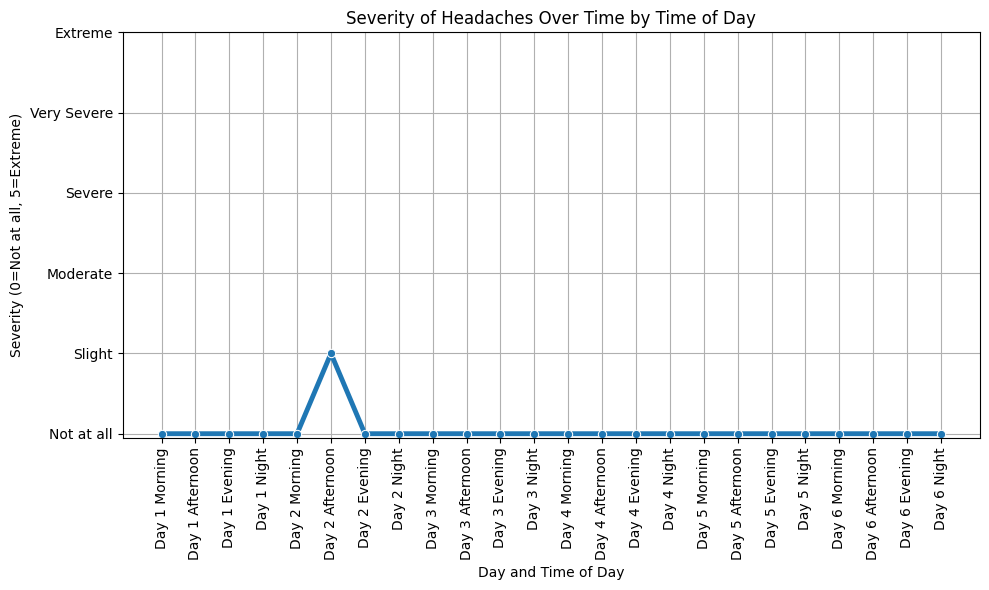

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Create a directory to save plots if it doesn't exist
output_dir = "/content/drive/MyDrive/symptom_plots"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load your CSV file
df_org = pd.read_csv("Symptom_67.csv")

# Filter for just one symptom
for i in df_org['symptom_name'].unique():
    symptom = i
    df = df_org[df_org['symptom_name'] == symptom].copy().reset_index(drop=True)

    # Assign sequence numbers to use instead of date
    df['sequence'] = df.index + 1

    # Map severity levels to numeric values
    severity_mapping = {
        "Not at all": 0,
        "Slight": 1,
        "Moderate": 2,
        "Severe": 3,
        "Very Severe": 4
    }
    for time in ['morning_severity', 'afternoon_severity', 'evening_severity', 'night_severity']:
        df[time] = df[time].map(severity_mapping)

    # Melt to long format
    df_melted = df.melt(
        id_vars='sequence',
        value_vars=['morning_severity', 'afternoon_severity', 'evening_severity', 'night_severity'],
        var_name='time_of_day',
        value_name='severity'
    )

    # Clean and order time_of_day values
    df_melted['time_of_day'] = df_melted['time_of_day'].str.replace('_severity', '').str.title()
    df_melted['time_of_day'] = pd.Categorical(df_melted['time_of_day'],
                                            categories=['Morning', 'Afternoon', 'Evening', 'Night'],
                                            ordered=True)

    # Sort and build x-axis labels like "Day 1 Morning", etc.
    df_melted = df_melted.sort_values(by=['sequence', 'time_of_day'])
    df_melted['day_time'] = df_melted.apply(lambda row: f"Day {row['sequence']} {row['time_of_day']}", axis=1)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_melted, x='day_time', y='severity', marker='o', linewidth=3.5)

    plt.title(f'Severity of {i} Over Time by Time of Day')
    plt.xlabel('Day and Time of Day')
    plt.ylabel('Severity (0=Not at all, 5=Extreme)')
    plt.xticks(rotation=90)
    plt.yticks(range(6), ['Not at all', 'Slight', 'Moderate', 'Severe', 'Very Severe', 'Extreme'])
    plt.grid(True)
    plt.tight_layout()

    # Save the plot as a PNG file in Google Drive
    clean_symptom_name = symptom.replace(' ', '_').replace('/', '_').lower()
    filename = f"{output_dir}/symptom_67_{clean_symptom_name}.png"
    plt.savefig(filename, dpi=300)

    # Show the plot (optional)
    plt.show()

    # Close the figure to free up memory
    plt.close()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


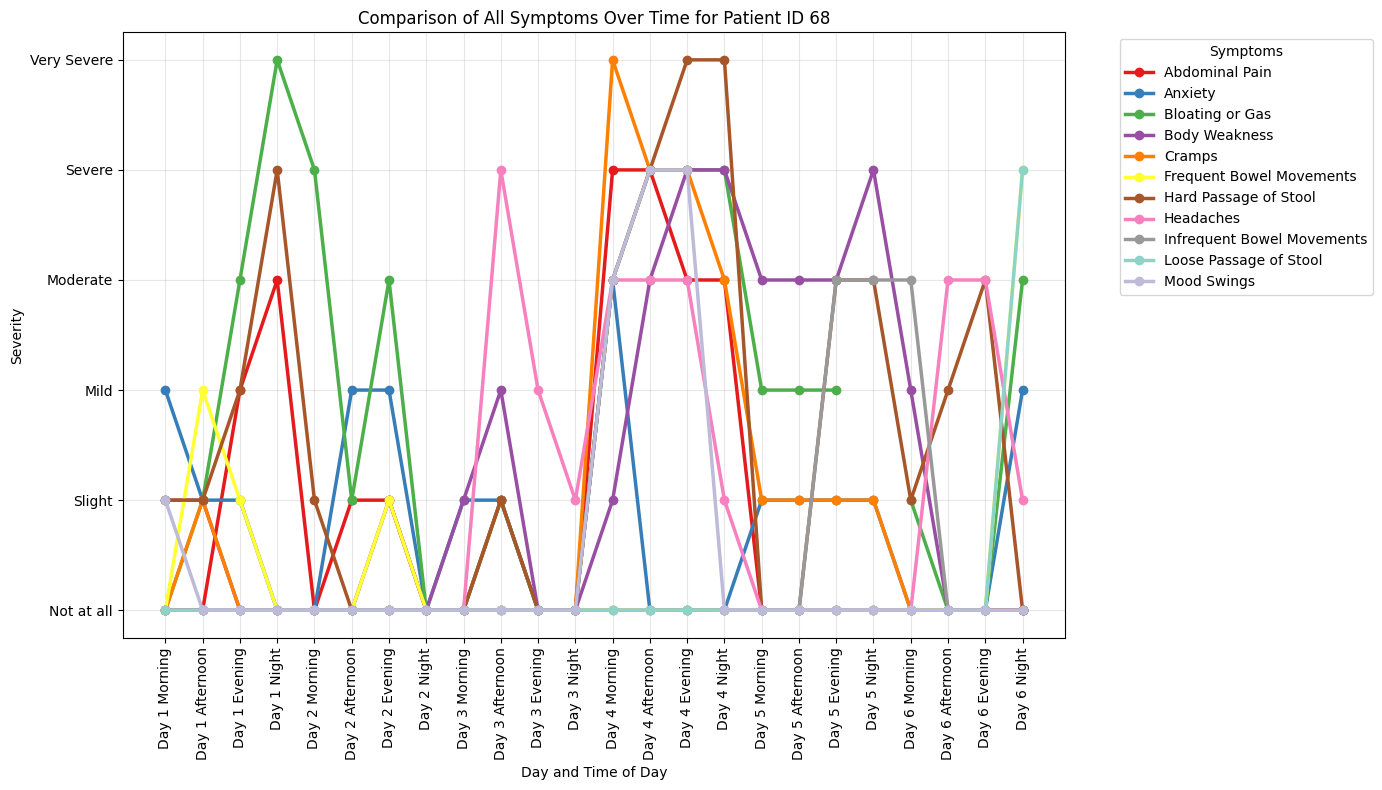

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Create a directory to save plots if it doesn't exist
output_dir = "/content/drive/MyDrive/symptom_plots_3"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load your CSV file
df_org = pd.read_csv("Symptoms - 72.csv")

# Process each symptom
symptom_list = sorted(df_org['symptom_name'].unique())

# Map severity levels to numeric values
# Updated to include "Mild" after "Slight"
severity_mapping = {
    "Not at all": 0,
    "Slight": 1,
    "Mild": 2,
    "Moderate": 3,
    "Severe": 4,
    "Very Severe": 5
}

# Simple set of distinct colors
distinct_colors = [
    '#e41a1c',  # red
    '#377eb8',  # blue
    '#4daf4a',  # green
    '#984ea3',  # purple
    '#ff7f00',  # orange
    '#ffff33',  # yellow
    '#a65628',  # brown
    '#f781bf',  # pink
    '#999999',  # grey
    '#8dd3c7',  # mint
    '#bebada',  # lavender
    '#fb8072',  # salmon
    '#80b1d3',  # light blue
    '#fdb462',  # light orange
    '#fccde5',  # light pink
    '#bc80bd',  # light purple
]

# Create a color dictionary for consistent coloring
color_dict = {symptom: distinct_colors[i % len(distinct_colors)] for i, symptom in enumerate(symptom_list)}

# Process all symptoms
all_symptoms_data = []
for symptom in symptom_list:
    df = df_org[df_org['symptom_name'] == symptom].copy().reset_index(drop=True)

    # Assign sequence numbers to use instead of date
    df['sequence'] = df.index + 1

    # Map severity levels to numeric values
    for time in ['morning_severity', 'afternoon_severity', 'evening_severity', 'night_severity']:
        df[time] = df[time].map(severity_mapping)

    # Melt to long format
    df_melted = df.melt(
        id_vars=['sequence', 'symptom_name'],
        value_vars=['morning_severity', 'afternoon_severity', 'evening_severity', 'night_severity'],
        var_name='time_of_day',
        value_name='severity'
    )

    # Clean and order time_of_day values
    df_melted['time_of_day'] = df_melted['time_of_day'].str.replace('_severity', '').str.title()
    df_melted['time_of_day'] = pd.Categorical(df_melted['time_of_day'],
                                          categories=['Morning', 'Afternoon', 'Evening', 'Night'],
                                          ordered=True)

    # Sort and build x-axis labels like "Day 1 Morning", etc.
    df_melted = df_melted.sort_values(by=['sequence', 'time_of_day'])
    df_melted['day_time'] = df_melted.apply(lambda row: f"Day {row['sequence']} {row['time_of_day']}", axis=1)

    all_symptoms_data.append(df_melted)

# Combine all data
combined_df = pd.concat(all_symptoms_data)

# Create the combined plot
plt.figure(figsize=(14, 8))

# Get unique day_time combinations to use for x-axis
all_day_times = sorted(combined_df['day_time'].unique(),
                      key=lambda x: (int(x.split()[1]),
                                    ['Morning', 'Afternoon', 'Evening', 'Night'].index(x.split()[2])))

# Plot each symptom
for symptom in symptom_list:
    symptom_data = combined_df[combined_df['symptom_name'] == symptom]
    plt.plot(symptom_data['day_time'], symptom_data['severity'],
             marker='o', linewidth=2.5, label=symptom, color=color_dict[symptom])

# Set x-axis labels to keep the structure from before
plt.xticks(rotation=90)

# Set custom y-ticks with symptom names instead of numbers
# Updated to include "Mild" after "Slight"
plt.yticks(range(6), ['Not at all', 'Slight', 'Mild', 'Moderate', 'Severe', 'Very Severe'])

# Add chart elements
plt.title('Comparison of All Symptoms Over Time for Patient ID 68')
plt.xlabel('Day and Time of Day')
plt.ylabel('Severity')
plt.grid(True, alpha=0.3)
plt.legend(title="Symptoms", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the combined plot
filename = f"{output_dir}/all_symptoms_comparison_detailed_67.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Also create and save individual plots
for symptom in symptom_list:
    symptom_data = combined_df[combined_df['symptom_name'] == symptom]

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=symptom_data, x='day_time', y='severity',
                 marker='o', linewidth=2.5, color=color_dict[symptom])

    plt.title(f'Severity of {symptom} Over Time')
    plt.xlabel('Day and Time of Day')
    plt.ylabel('Severity')
    plt.xticks(rotation=90)
    # Updated to include "Mild" after "Slight"
    plt.yticks(range(6), ['Not at all', 'Slight', 'Mild', 'Moderate', 'Severe', 'Very Severe'])
    plt.grid(True)
    plt.tight_layout()

    # Save the individual plot
    clean_symptom_name = symptom.replace(' ', '_').replace('/', '_').lower()
    filename = f"{output_dir}/symptom_67_{clean_symptom_name}_detailed.png"
    plt.savefig(filename, dpi=300)

    # Close the figure to free up memory
    plt.close()

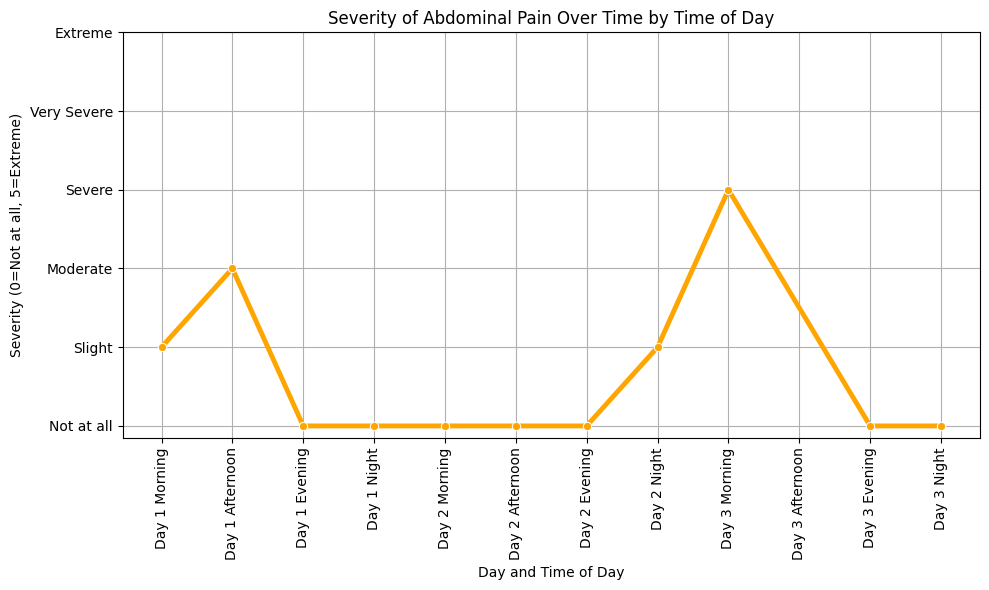

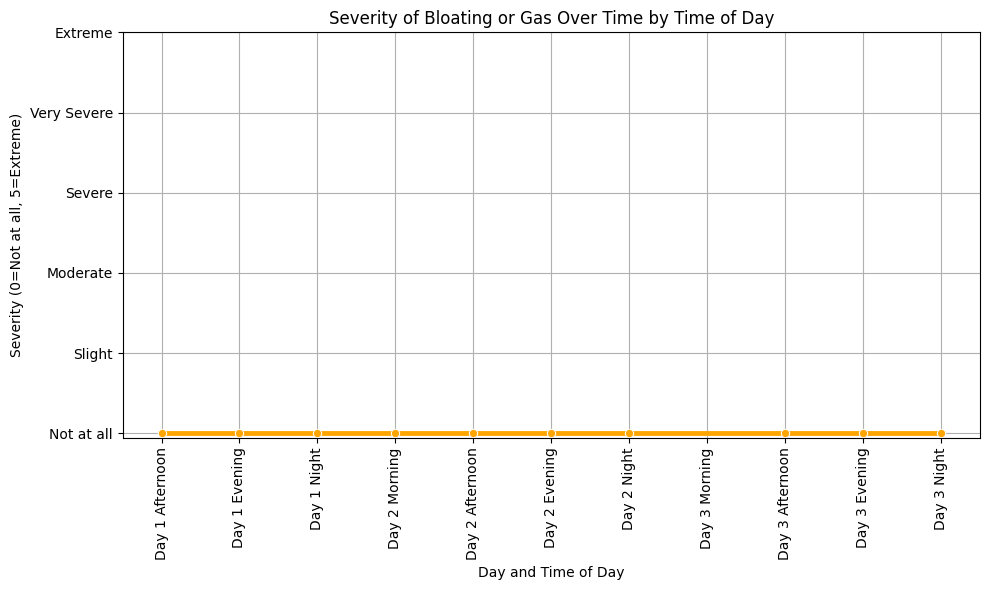

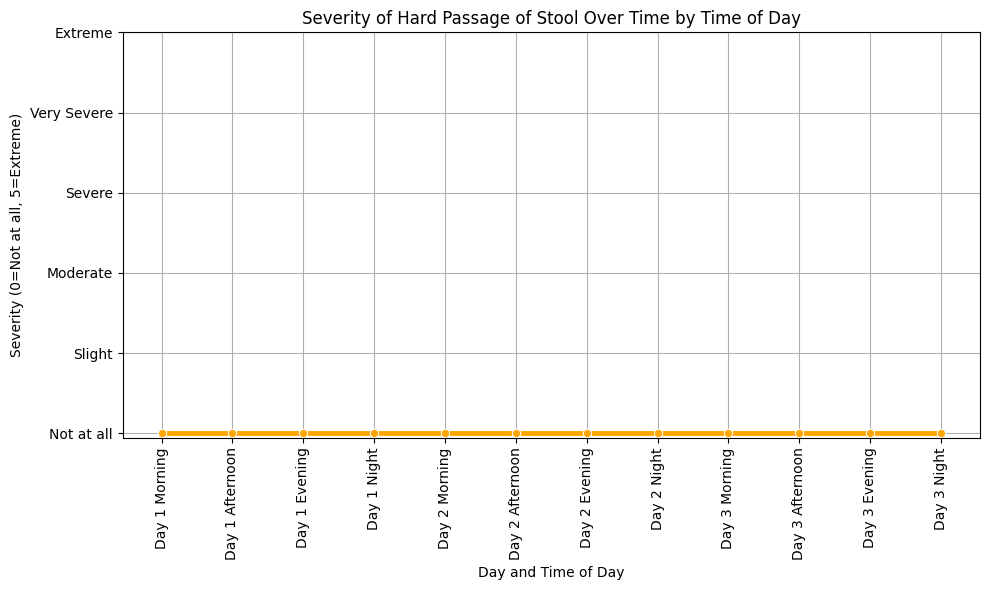

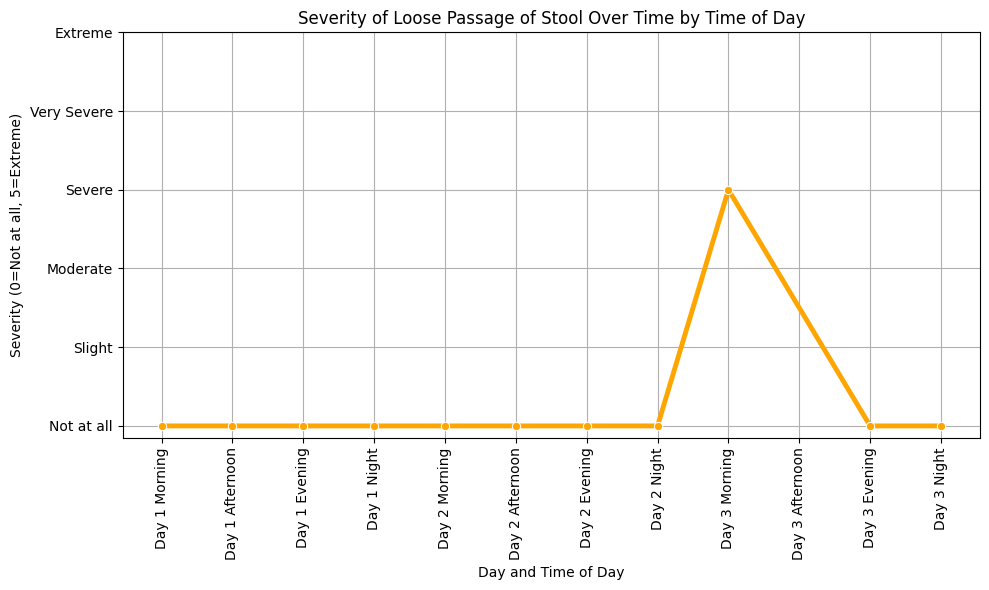

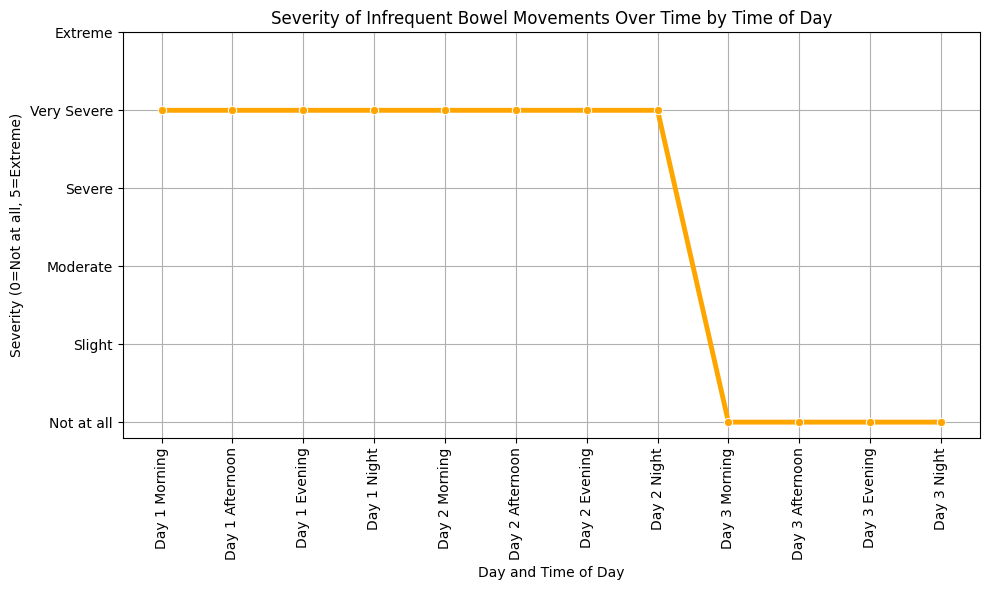

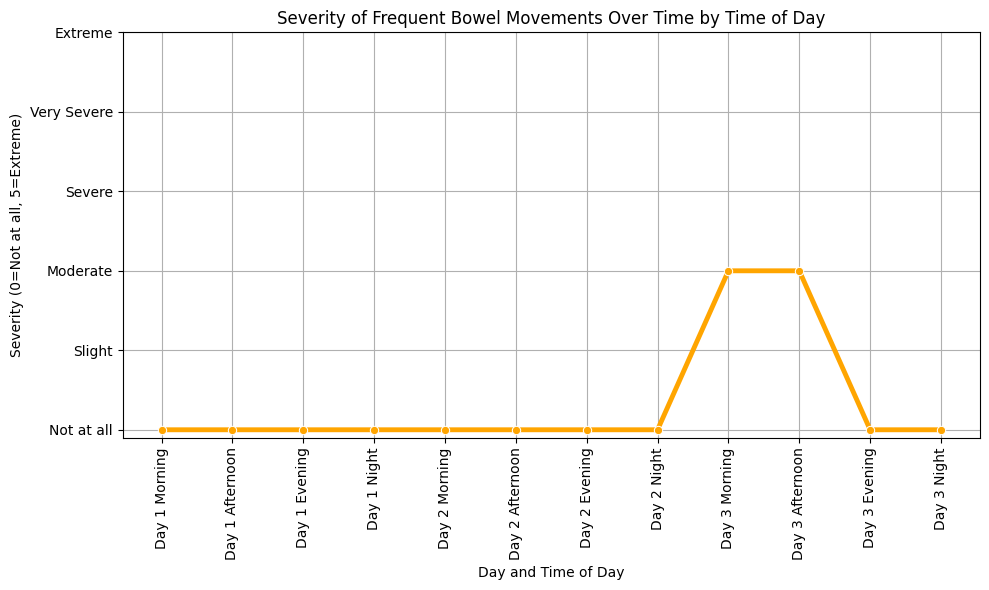

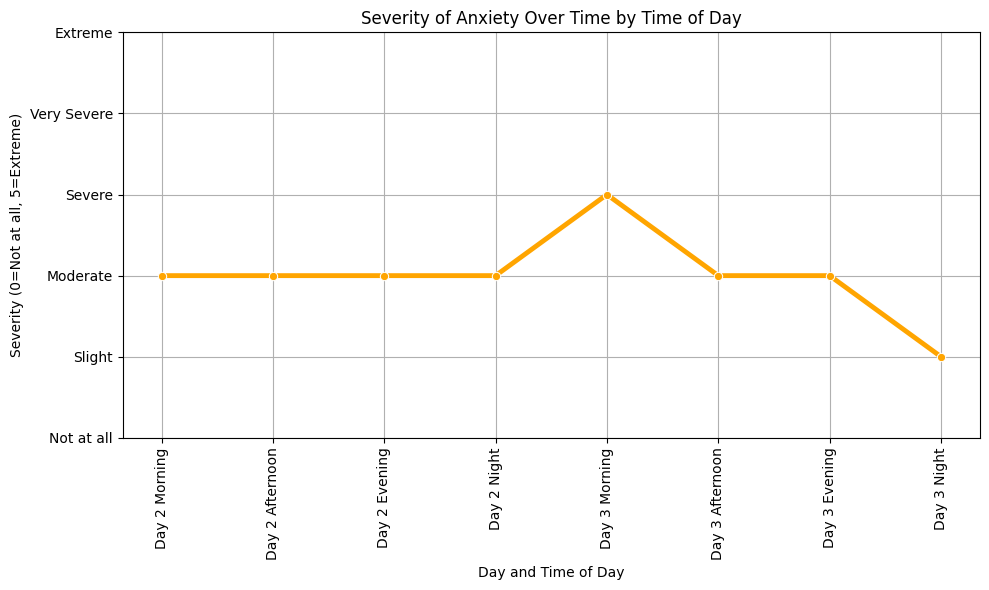

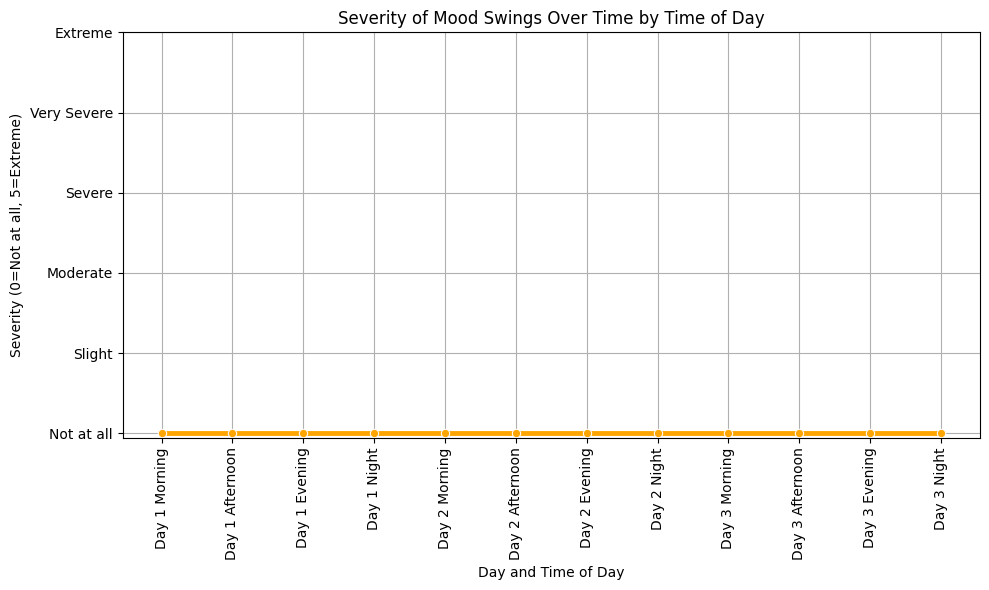

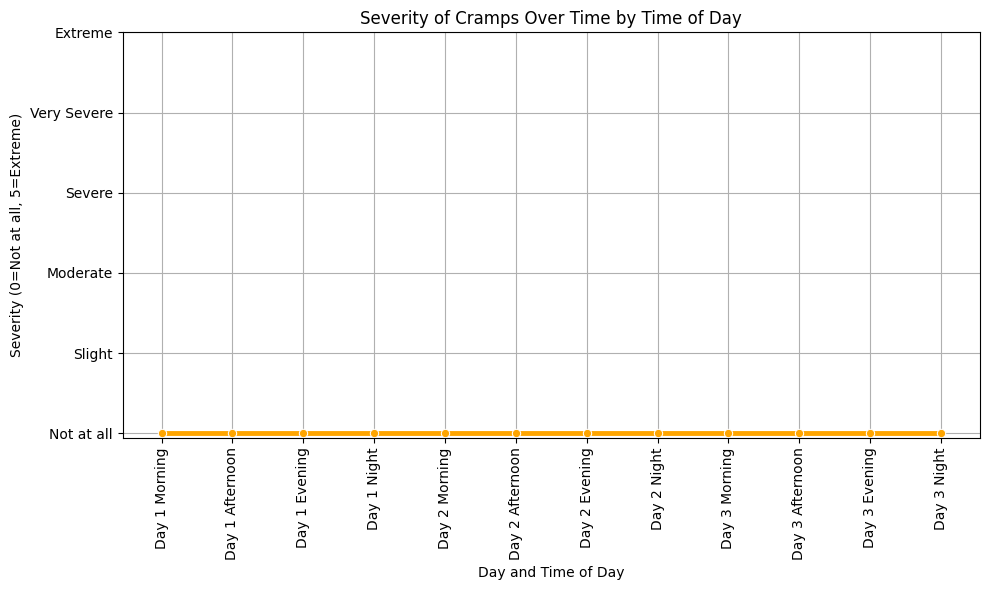

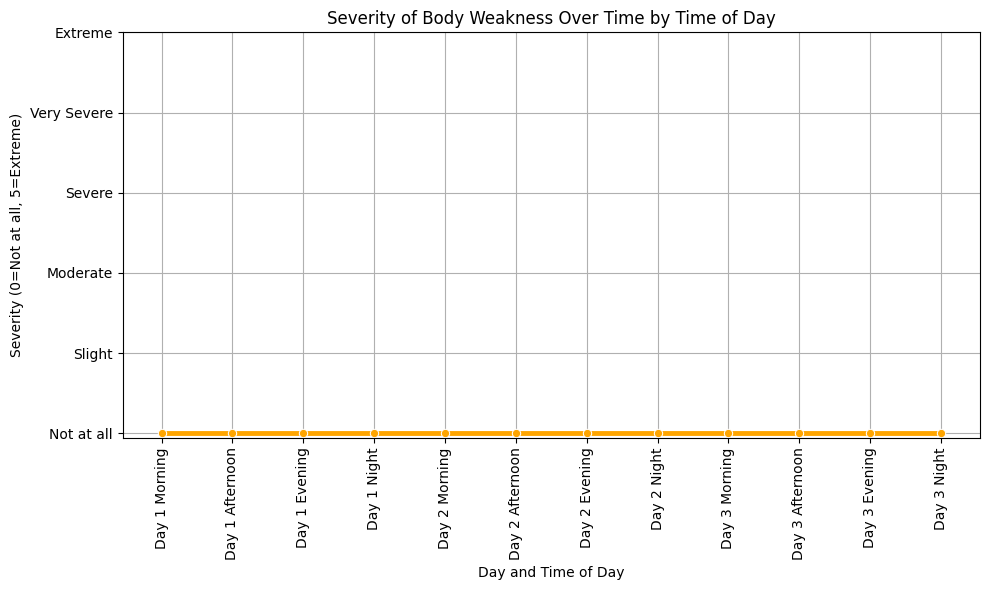

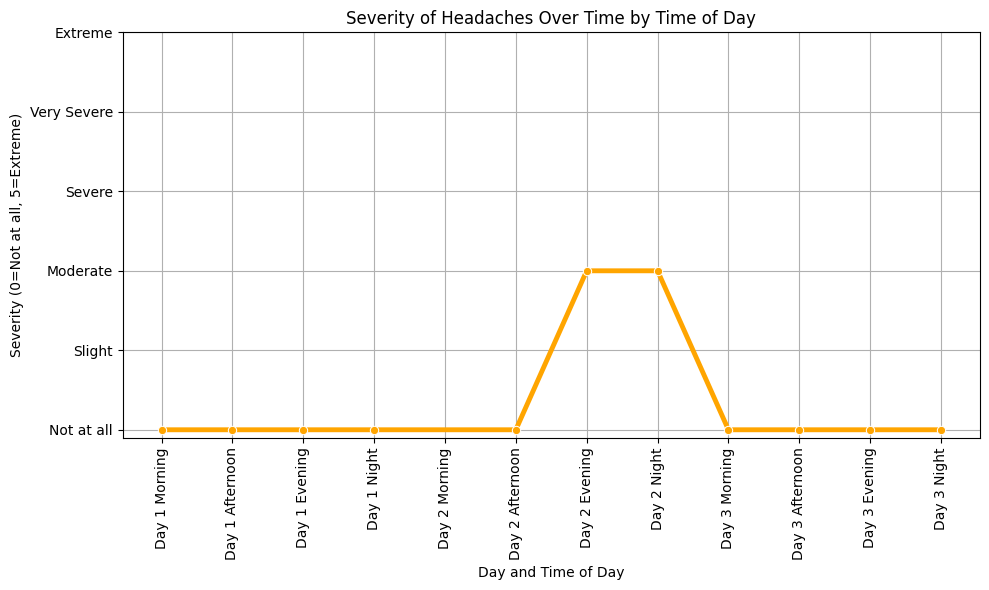

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV file
df_org = pd.read_csv("68.csv")

# Filter for just one symptom

for i in df_org['symptom_name'].unique():

  symptom = i
  df = df_org[df_org['symptom_name'] == symptom].copy().reset_index(drop=True)

  # Assign sequence numbers to use instead of date
  df['sequence'] = df.index + 1

  # Map severity levels to numeric values
  severity_mapping = {
      "Not at all": 0,
      "Slight": 1,
      "Moderate": 2,
      "Severe": 3,
      "Very Severe": 4
  }
  for time in ['morning_severity', 'afternoon_severity', 'evening_severity', 'night_severity']:
      df[time] = df[time].map(severity_mapping)

  # Melt to long format
  df_melted = df.melt(
      id_vars='sequence',
      value_vars=['morning_severity', 'afternoon_severity', 'evening_severity', 'night_severity'],
      var_name='time_of_day',
      value_name='severity'
  )

  # Clean and order time_of_day values
  df_melted['time_of_day'] = df_melted['time_of_day'].str.replace('_severity', '').str.title()
  df_melted['time_of_day'] = pd.Categorical(df_melted['time_of_day'],
                                            categories=['Morning', 'Afternoon', 'Evening', 'Night'],
                                            ordered=True)

  # Sort and build x-axis labels like "Day 1 Morning", etc.
  df_melted = df_melted.sort_values(by=['sequence', 'time_of_day'])
  df_melted['day_time'] = df_melted.apply(lambda row: f"Day {row['sequence']} {row['time_of_day']}", axis=1)

  # Plot
  plt.figure(figsize=(10, 6))
  sns.lineplot(data=df_melted, x='day_time', y='severity', marker='o', color = 'orange', linewidth = 3.5)

  plt.title(f'Severity of {i} Over Time by Time of Day')
  plt.xlabel('Day and Time of Day')
  plt.ylabel('Severity (0=Not at all, 5=Extreme)')
  plt.xticks(rotation=90)
  plt.yticks(range(6), ['Not at all', 'Slight', 'Moderate', 'Severe', 'Very Severe', 'Extreme'])
  plt.grid(True)
  plt.tight_layout()
  #plt.legend(title='Time of Day')
  plt.show()


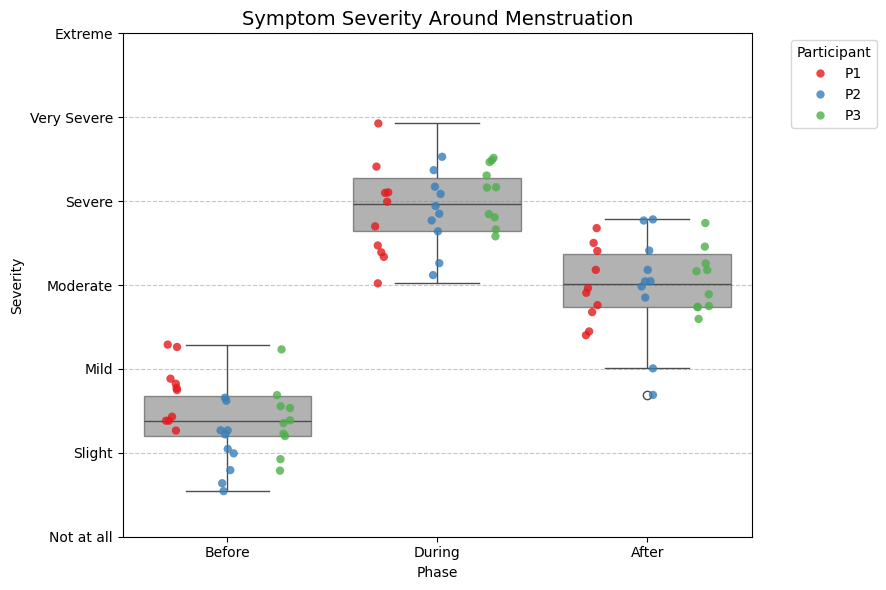

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Reproducibility
np.random.seed(42)

# Generate data
phases = ["Before", "During", "After"]
participants = ["P1", "P2", "P3"]
data = []

for phase in phases:
    for participant in participants:
        if phase == "Before":
            severity = np.random.normal(loc=2.5, scale=0.5, size=10)  # Mild–Moderate
        elif phase == "During":
            severity = np.random.normal(loc=5, scale=0.5, size=10)  # Severe
        else:  # After
            severity = np.random.normal(loc=4, scale=0.5, size=10)   # Moderate
        for val in severity:
            data.append({
                "Phase": phase,
                "Participant": participant,
                "Severity": np.clip(val, 1, 7)
            })

# Create DataFrame
df = pd.DataFrame(data)

# Custom y-axis labels
severity_labels = [
    "Not at all", "Slight", "Mild", "Moderate", "Severe", "Very Severe", "Extreme"
]

# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(x='Phase', y='Severity', data=df, color = 'gray', boxprops=dict(alpha=0.6))

sns.stripplot(
    x='Phase', y='Severity', data=df,
    hue='Participant', dodge=True, jitter=True,
    palette="Set1", size=6, alpha=0.8
)

# Labels and legend
plt.title("Symptom Severity Around Menstruation", fontsize=14)
plt.ylabel("Severity")
plt.yticks(ticks=range(1, 8), labels=severity_labels)
plt.legend(title="Participant", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


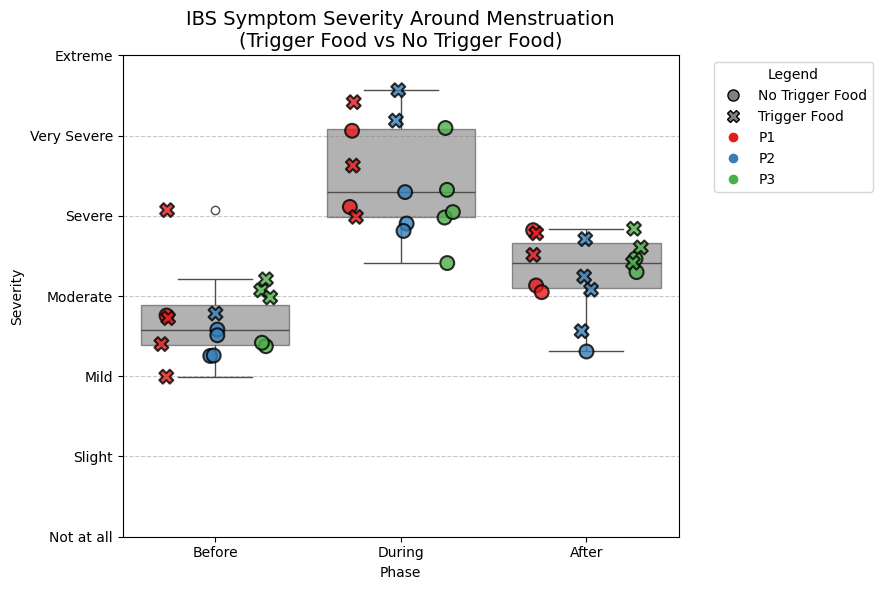

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Reproducibility
np.random.seed(42)

phases = ["Before", "During", "After"]
participants = ["P1", "P2", "P3"]
data = []

for phase in phases:
    for participant in participants:
        for i in range(5):  # 10 observations per condition
            trigger = np.random.choice([True, False])
            if phase == "Before":
                base = 3.5
            elif phase == "During":
                base = 5.5
            else:
                base = 4.0
            # Add a small bump if trigger food was eaten
            bump = 0.5 if trigger else 0
            severity = np.random.normal(loc=base + bump, scale=0.5)
            data.append({
                "Phase": phase,
                "Participant": participant,
                "Severity": np.clip(severity, 1, 7),
                "Trigger": trigger
            })

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(
    x='Phase', y='Severity', data=df,
    color = 'gray',
    boxprops=dict(alpha=0.6)
)

# Plot individual points with different markers
markers = {True: 'X', False: 'o'}
palette = dict(zip(participants, sns.color_palette("Set1", n_colors=3)))

for trigger_status in [False, True]:
    subset = df[df["Trigger"] == trigger_status]
    sns.stripplot(
        x='Phase', y='Severity', data=subset,
        hue='Participant', dodge=True, jitter=True,
        palette=palette, size=10, alpha=0.8,
        marker=markers[trigger_status], linewidth=1.5, edgecolor='black'
    )

# Custom y-axis labels
severity_labels = [
    "Not at all", "Slight", "Mild", "Moderate", "Severe", "Very Severe", "Extreme"
]
plt.yticks(ticks=range(1, 8), labels=severity_labels)
plt.ylabel("Severity")
plt.title("IBS Symptom Severity Around Menstruation\n(Trigger Food vs No Trigger Food)", fontsize=14)

# Custom legend (combined for participant + marker meaning)
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='No Trigger Food',
           markerfacecolor='gray', markersize=8, markeredgecolor='black'),
    Line2D([0], [0], marker='X', color='w', label='Trigger Food',
           markerfacecolor='gray', markersize=8, markeredgecolor='black')
] + [
    Line2D([0], [0], marker='o', color='w', label=participant,
           markerfacecolor=palette[participant], markersize=8)
    for participant in participants
]

plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


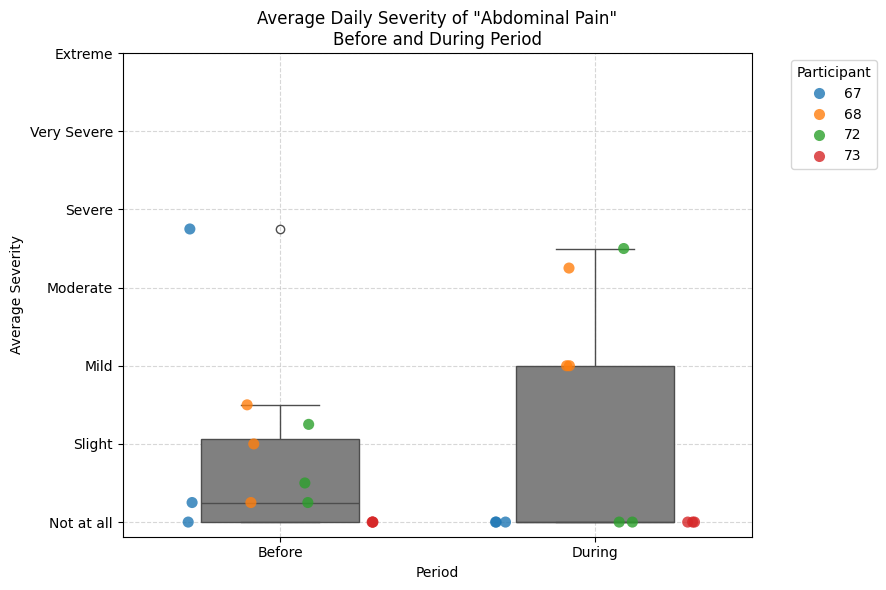

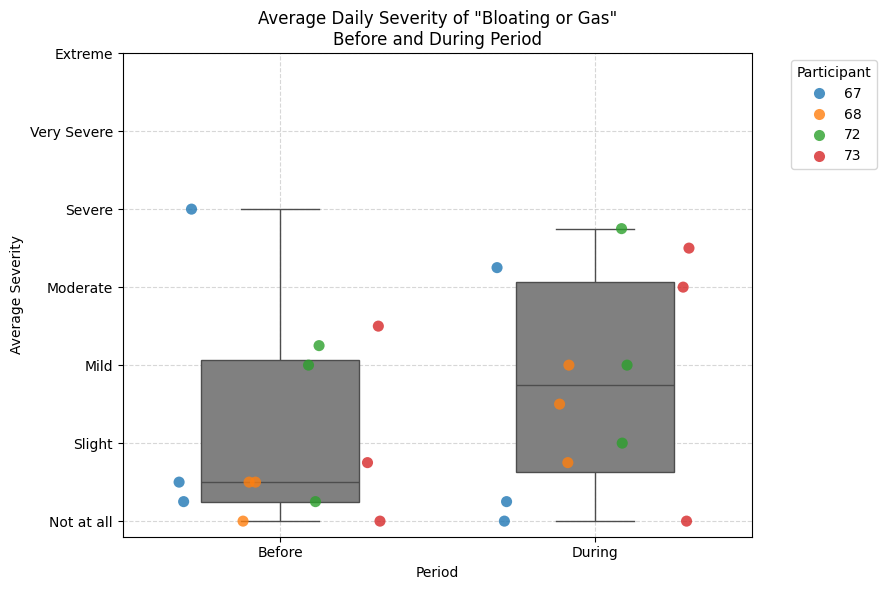

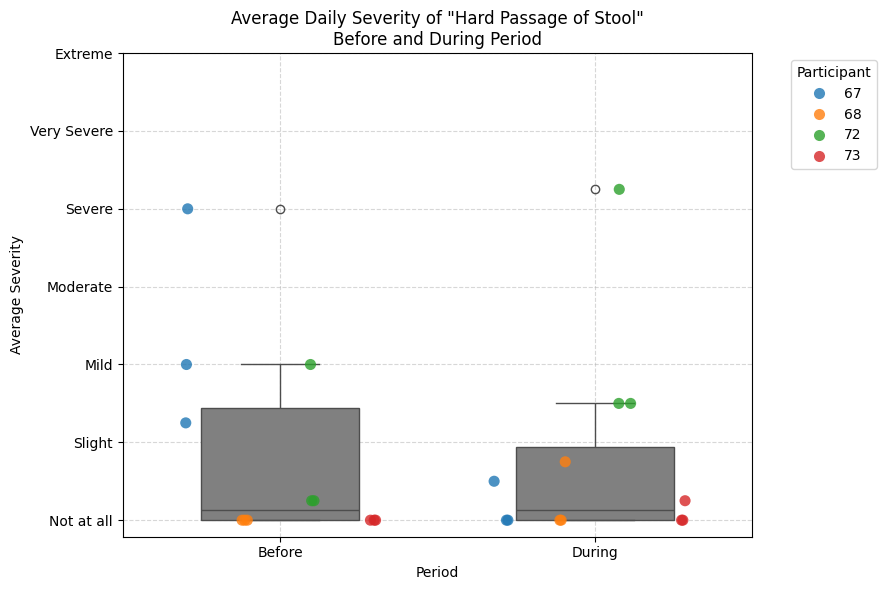

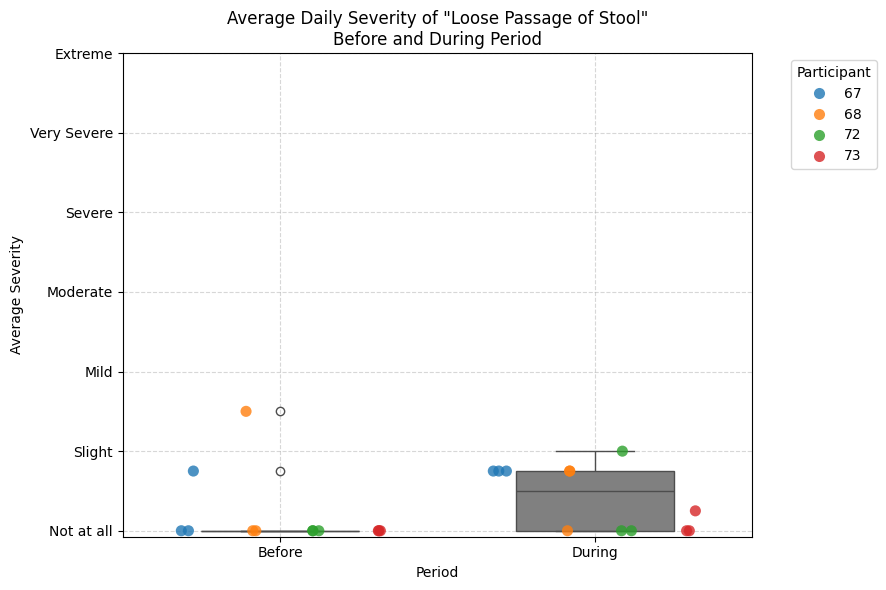

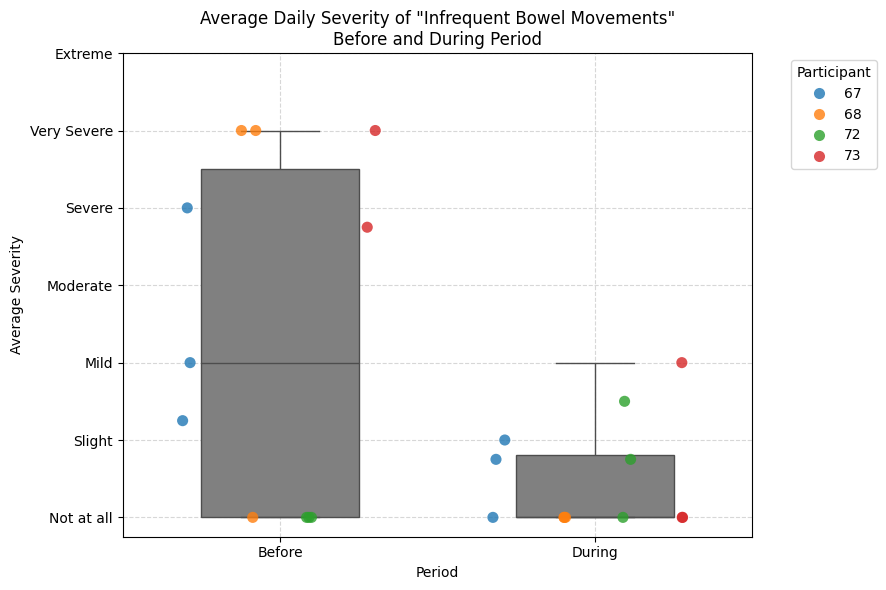

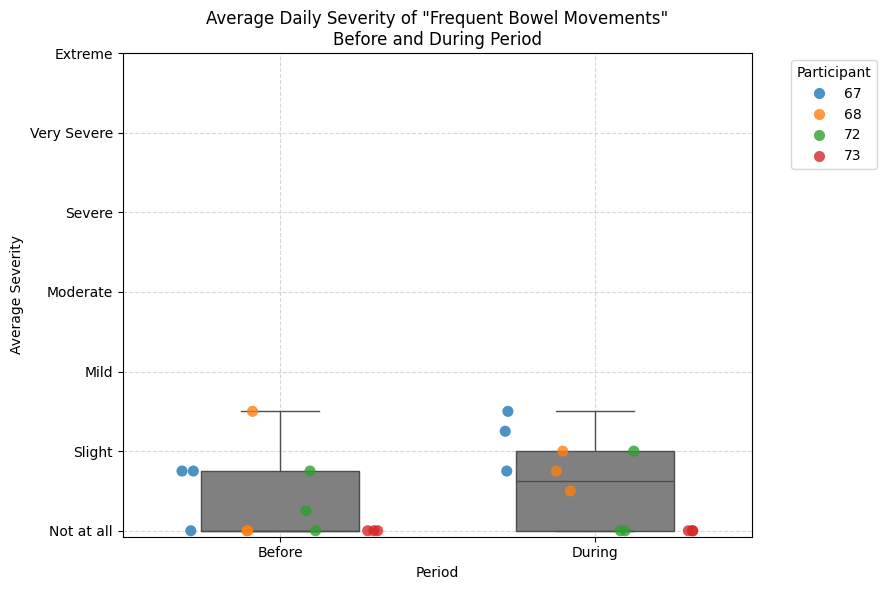

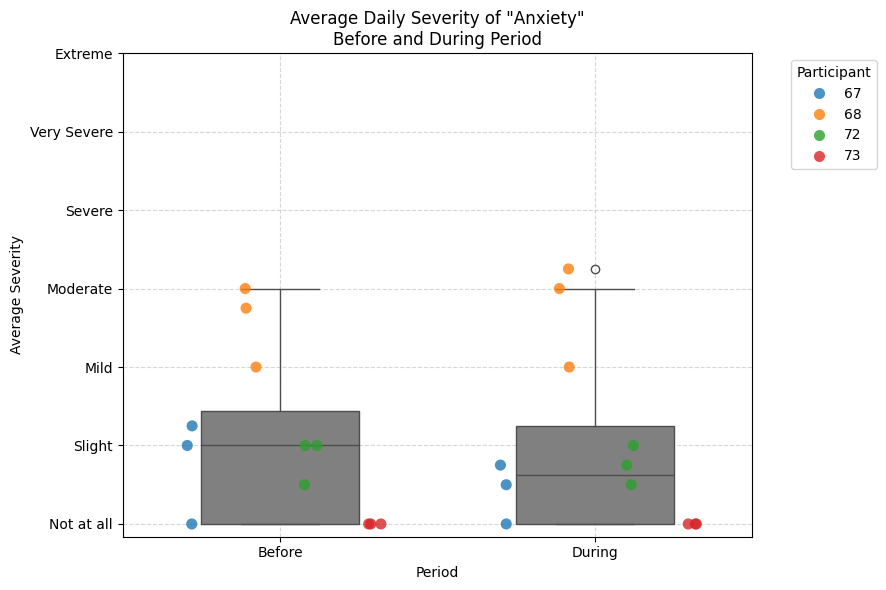

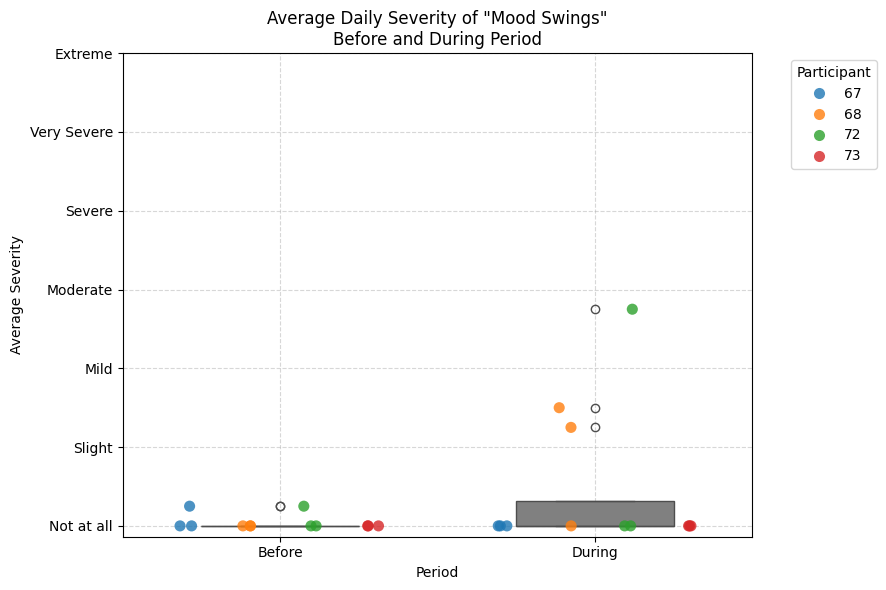

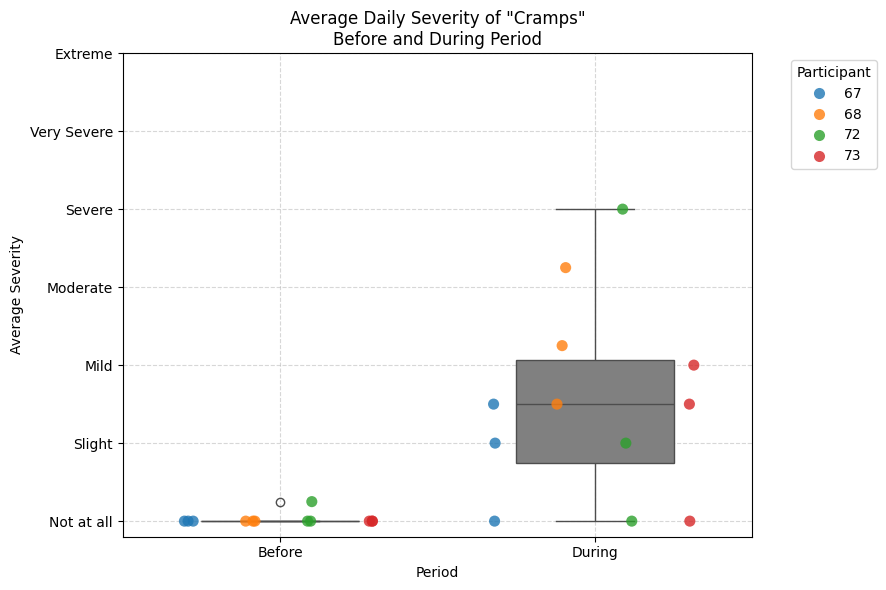

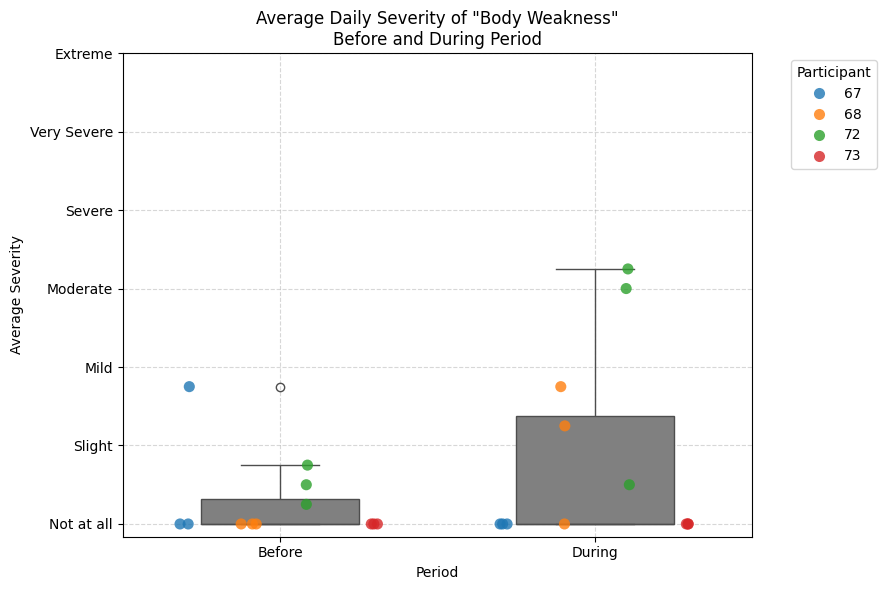

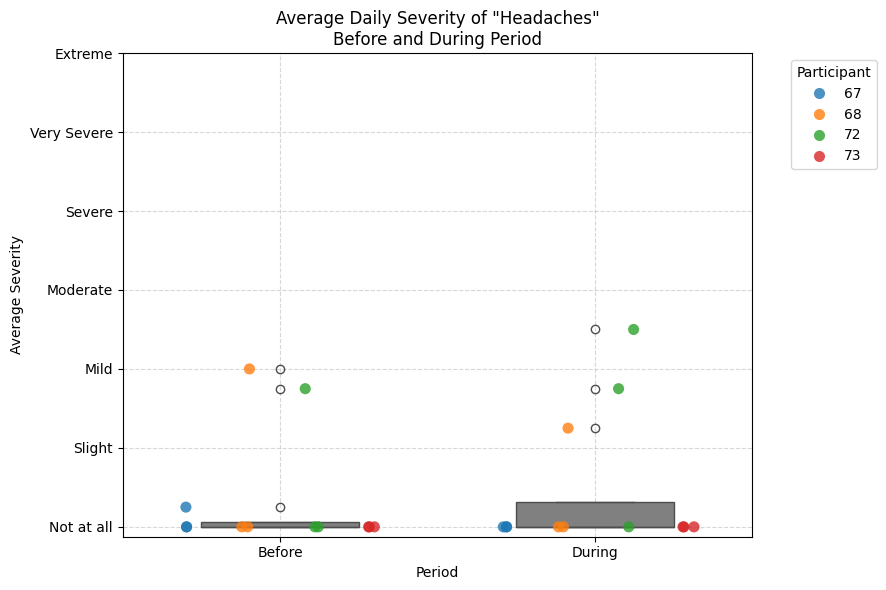

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Severity mapping
severity_map = {
    'Not at all': 0,
    'Slight': 1,
    'Mild': 2,
    'Moderate': 3,
    'Severe': 4,
    'Very Severe': 5
}

# Process a file for a given symptom
def process_file(filepath, user_id, symptom):
    df = pd.read_csv(filepath)
    df['date'] = pd.to_datetime(df['date'])
    df = df[df['symptom_name'] == symptom].copy()
    df = df.sort_values('date')

    # Select first 6 unique dates
    first_six_dates = df['date'].dt.date.unique()[:6]
    period_labels = {d: 'Before' if i < 3 else 'During' for i, d in enumerate(first_six_dates)}
    df['period'] = df['date'].dt.date.map(period_labels)
    df = df.dropna(subset=['period'])

    # Convert severity strings to numeric
    time_periods = ['morning_severity', 'afternoon_severity', 'evening_severity', 'night_severity']
    for tp in time_periods:
        df[tp] = df[tp].map(severity_map)

    # Compute average daily severity
    df['average_severity'] = df[time_periods].mean(axis=1)
    df['user_id'] = str(user_id)
    return df[['period', 'average_severity', 'user_id']]

# Filepaths and user IDs
files = {
    'Symptoms - 67.csv': '67',
    'Symptoms - 68.csv': '68',
    'Symptoms - 72.csv': '72',
    'Symptoms - 73.csv': '73'
}

# Load all files to get unique symptoms
all_data = [pd.read_csv(f) for f in files]
combined_df = pd.concat(all_data)
all_symptoms = combined_df['symptom_name'].dropna().unique()

# Loop through all symptoms
for symptom in all_symptoms:
    # Process data for each user for the current symptom
    dfs = []
    for filepath, user_id in files.items():
        df_symptom = process_file(filepath, user_id, symptom)
        if not df_symptom.empty:
            dfs.append(df_symptom)

    # Combine data for this symptom
    if dfs:
        df_all = pd.concat(dfs, ignore_index=True)

        # Plot
        plt.figure(figsize=(9, 6))
        sns.boxplot(x='period', y='average_severity', data=df_all, whis=1.5, width=0.5, color='gray')
        sns.stripplot(x='period', y='average_severity', data=df_all, hue='user_id', dodge=True, jitter=True, alpha=0.8, size=8)

        plt.title(f'Average Daily Severity of "{symptom}"\nBefore and During Period')
        plt.xlabel('Period')

        # Custom y-axis with severity text
        severity_labels = ['Not at all', 'Slight', 'Mild', 'Moderate', 'Severe', 'Very Severe', 'Extreme']
        plt.yticks(ticks=range(len(severity_labels)), labels=severity_labels)
        plt.ylabel('Average Severity')

        plt.legend(title='Participant', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()



<ipython-input-7-c1341759cea8>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


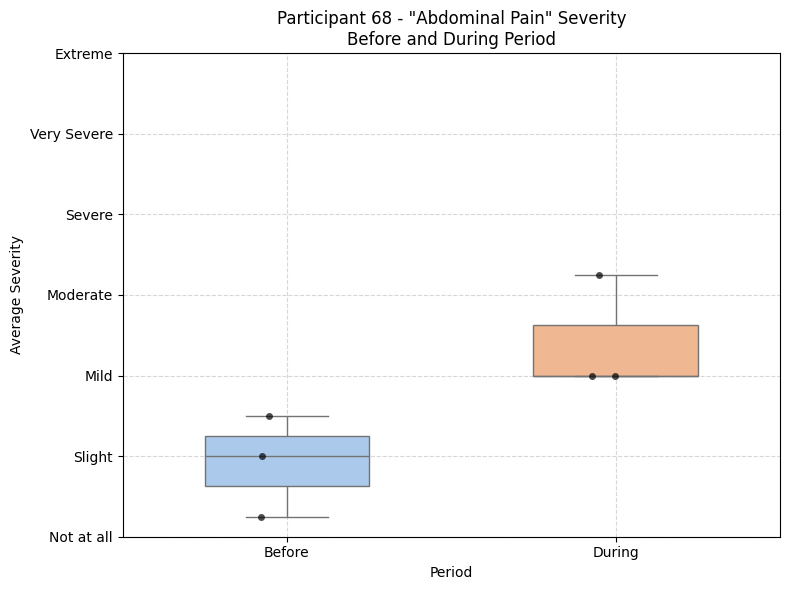

<ipython-input-7-c1341759cea8>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


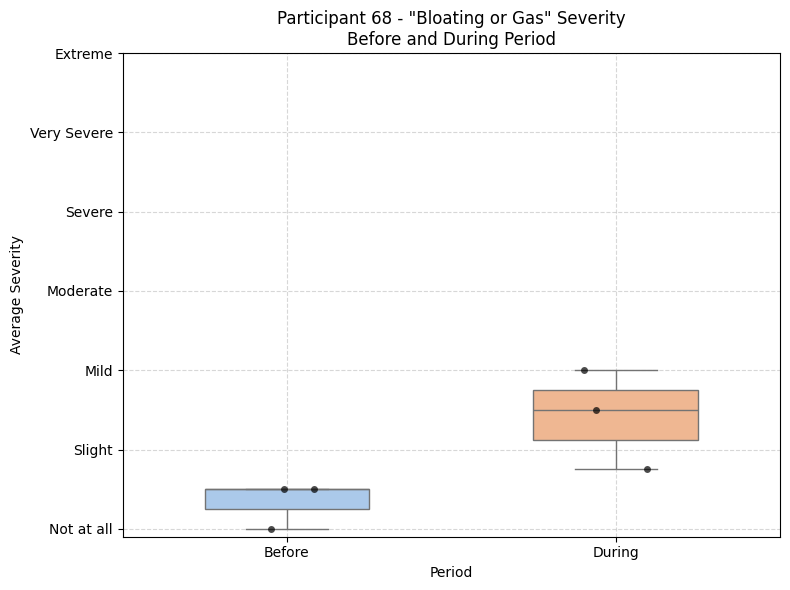

<ipython-input-7-c1341759cea8>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


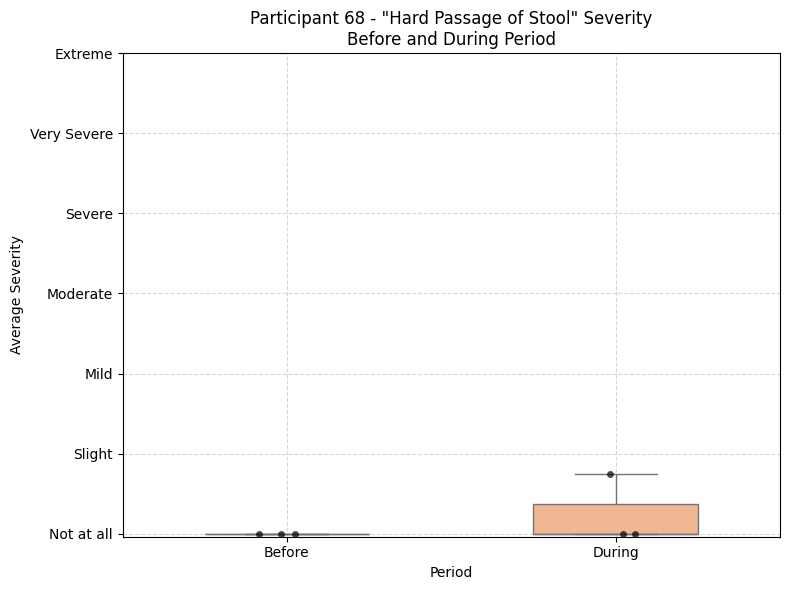

<ipython-input-7-c1341759cea8>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


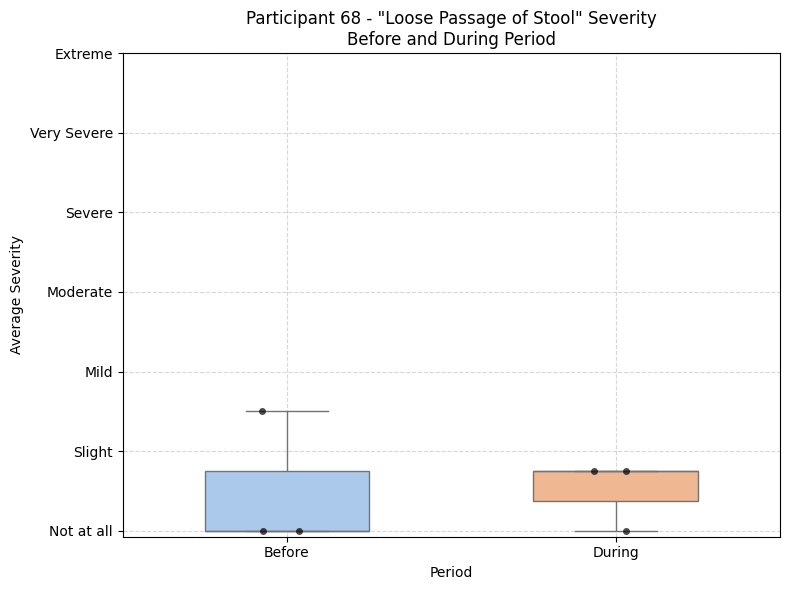

<ipython-input-7-c1341759cea8>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


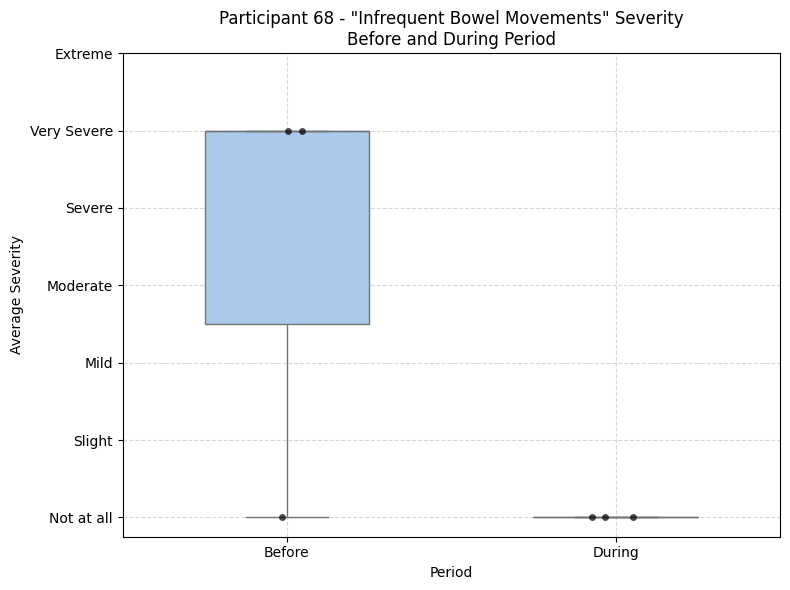

<ipython-input-7-c1341759cea8>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


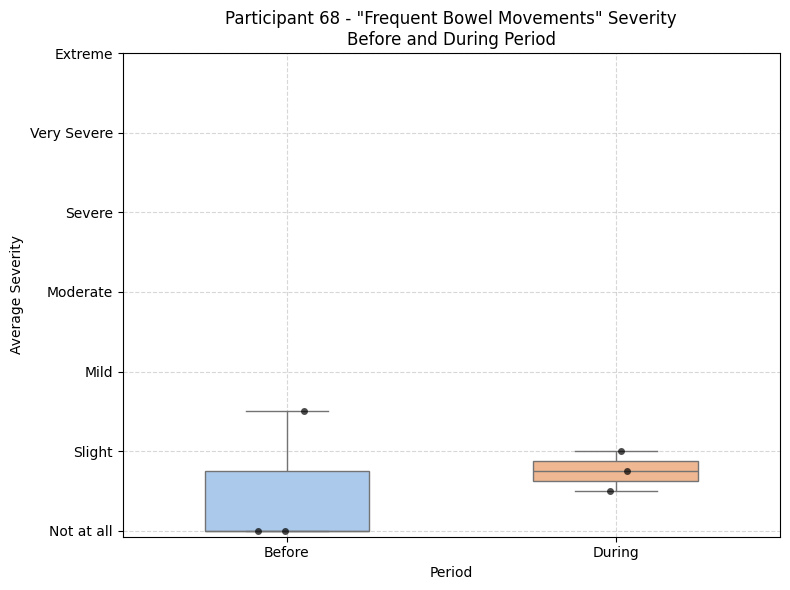

<ipython-input-7-c1341759cea8>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


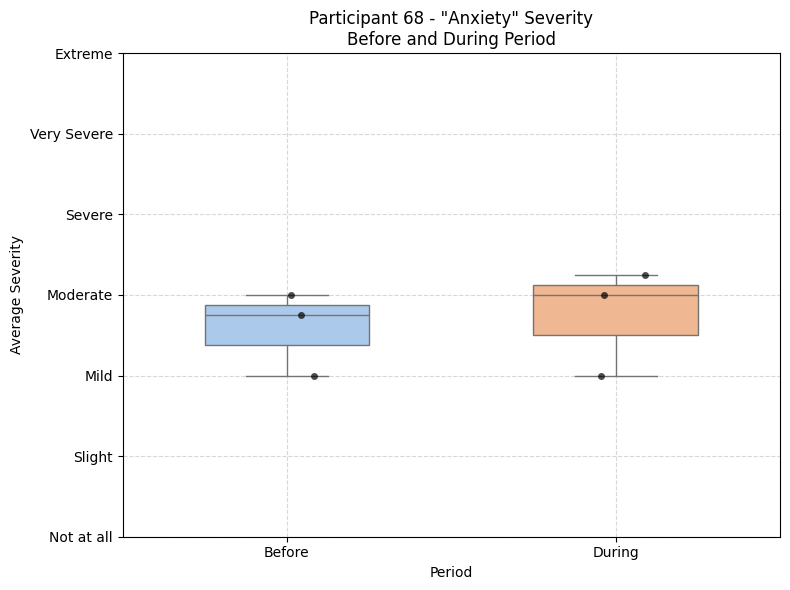

<ipython-input-7-c1341759cea8>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


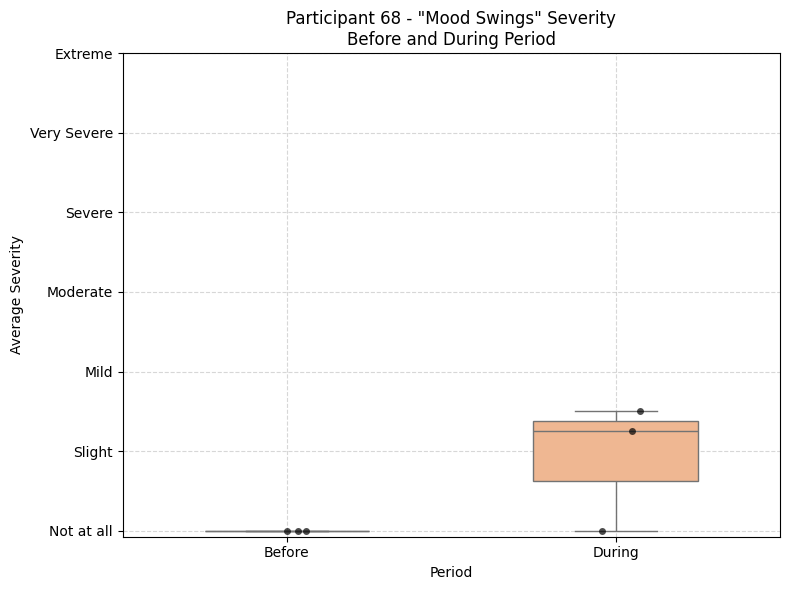

<ipython-input-7-c1341759cea8>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


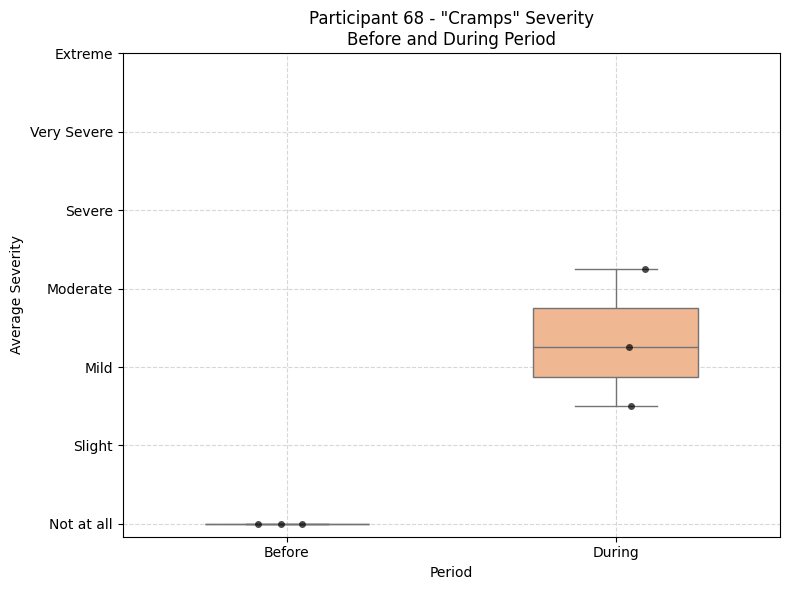

<ipython-input-7-c1341759cea8>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


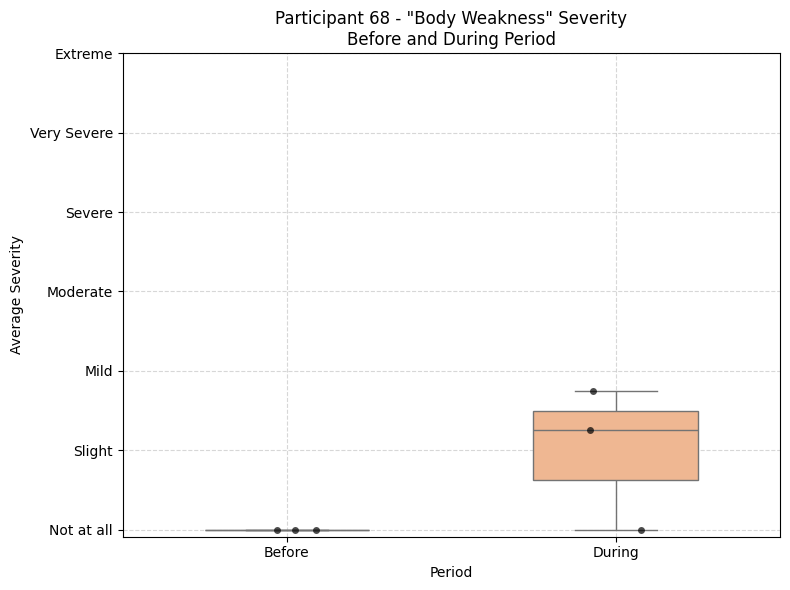

<ipython-input-7-c1341759cea8>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


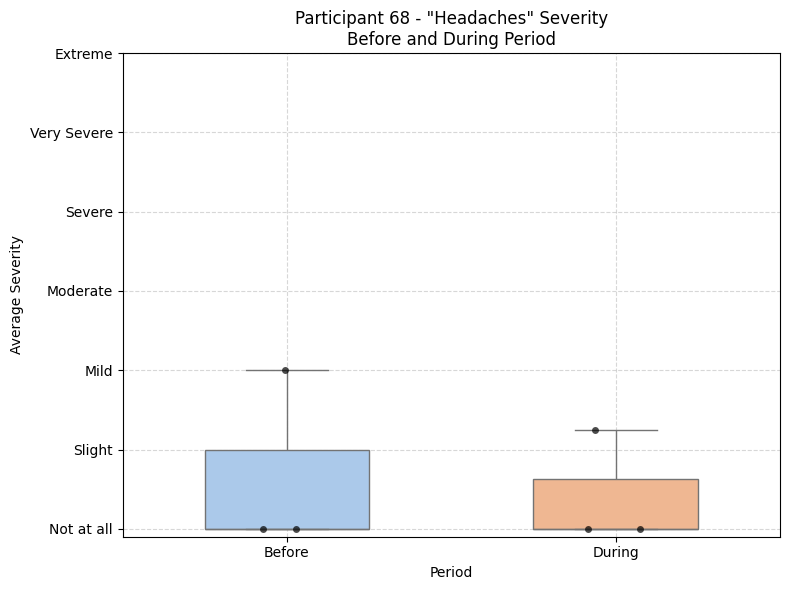

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === CONFIGURATION ===
participant_file = 'Symptoms - 68.csv'  # Change to 67 or 69 if needed
participant_id = '68'                   # Should match the filename above
# ======================

# Severity mapping
severity_map = {
    'Not at all': 0,
    'Slight': 1,
    'Mild': 2,
    'Moderate': 3,
    'Severe': 4,
    'Very Severe': 5
}

# Load participant data
df = pd.read_csv(participant_file)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# List all symptoms in the dataset
all_symptoms = df['symptom_name'].dropna().unique()

# Process each symptom
for symptom in all_symptoms:
    df_symptom = df[df['symptom_name'] == symptom].copy()

    # Identify first 6 dates and classify period
    first_six_dates = df_symptom['date'].dt.date.unique()[:6]
    period_labels = {d: 'Before' if i < 3 else 'During' for i, d in enumerate(first_six_dates)}
    df_symptom['period'] = df_symptom['date'].dt.date.map(period_labels)
    df_symptom = df_symptom.dropna(subset=['period'])

    # Skip if no valid entries
    if df_symptom.empty:
        continue

    # Convert severity strings to numeric
    time_periods = ['morning_severity', 'afternoon_severity', 'evening_severity', 'night_severity']
    for tp in time_periods:
        df_symptom[tp] = df_symptom[tp].map(severity_map)

    # Calculate average severity
    df_symptom['average_severity'] = df_symptom[time_periods].mean(axis=1)

    # Plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')
    sns.stripplot(x='period', y='average_severity', data=df_symptom, color='black', alpha=0.7, jitter=True)

    plt.title(f'Participant {participant_id} - "{symptom}" Severity\nBefore and During Period')
    plt.xlabel('Period')
    plt.ylabel('Average Severity')

    # Set custom y-axis labels
    severity_labels = ['Not at all', 'Slight', 'Mild', 'Moderate', 'Severe', 'Very Severe', 'Extreme']
    plt.yticks(ticks=range(len(severity_labels)), labels=severity_labels)

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


<ipython-input-8-c1bb5cd4c6dc>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


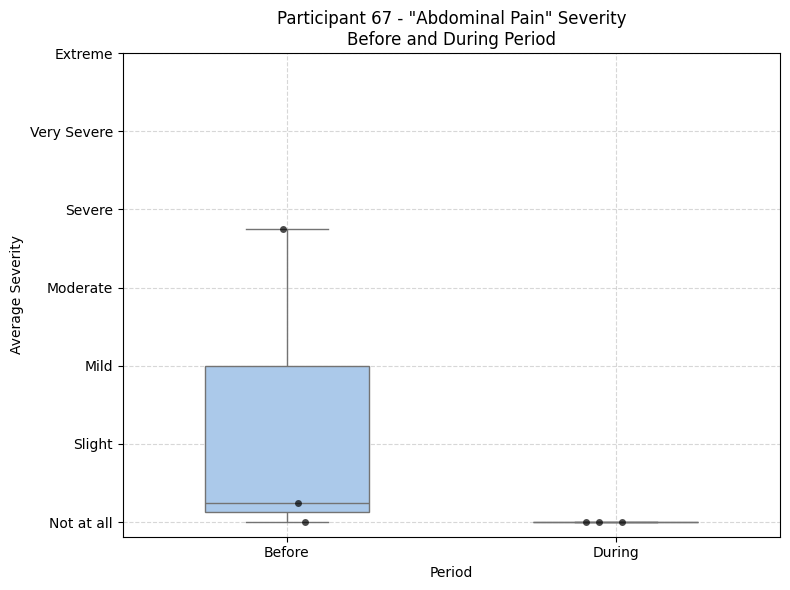

<ipython-input-8-c1bb5cd4c6dc>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


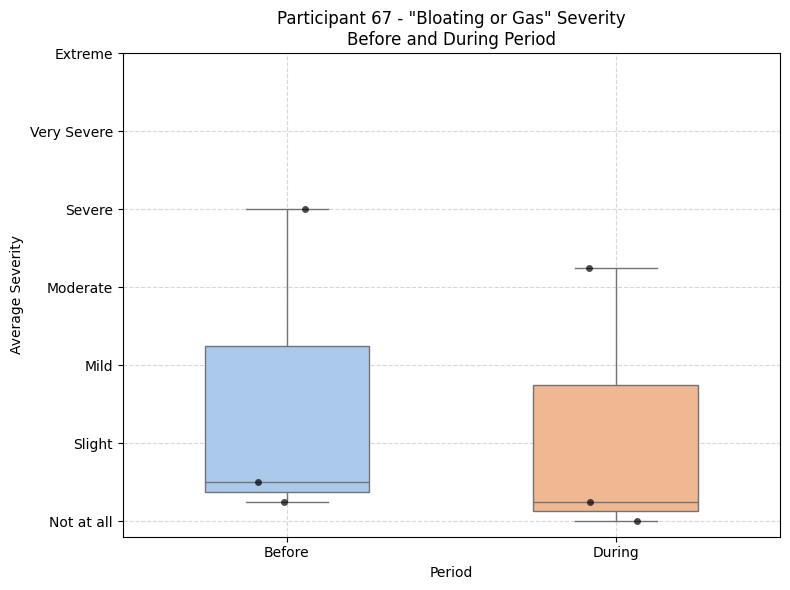

<ipython-input-8-c1bb5cd4c6dc>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


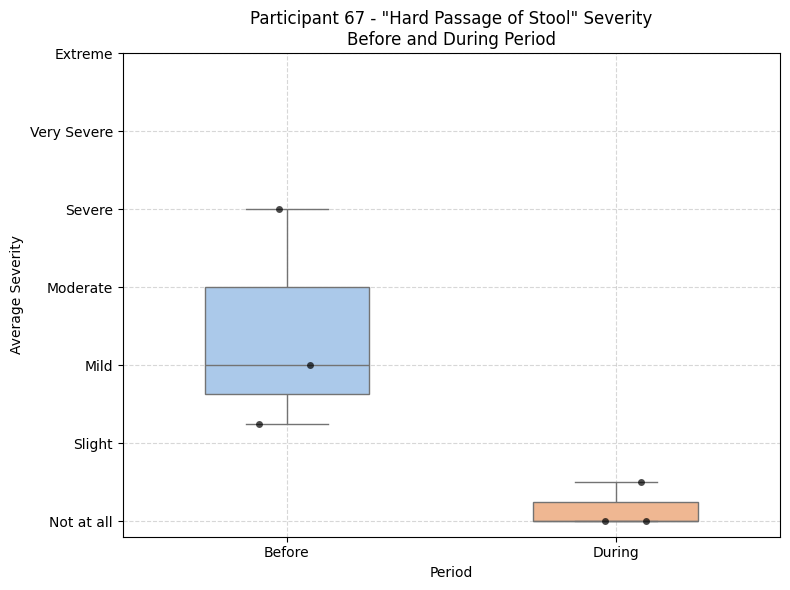

<ipython-input-8-c1bb5cd4c6dc>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


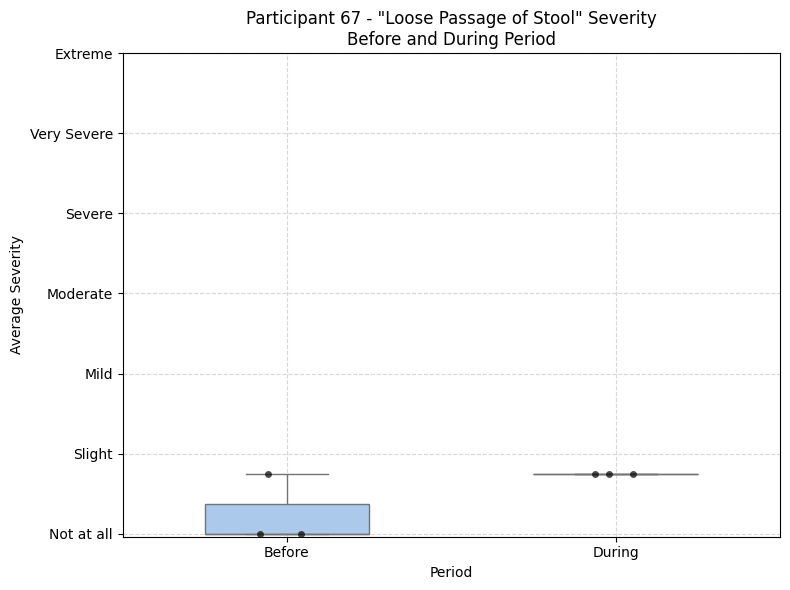

<ipython-input-8-c1bb5cd4c6dc>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


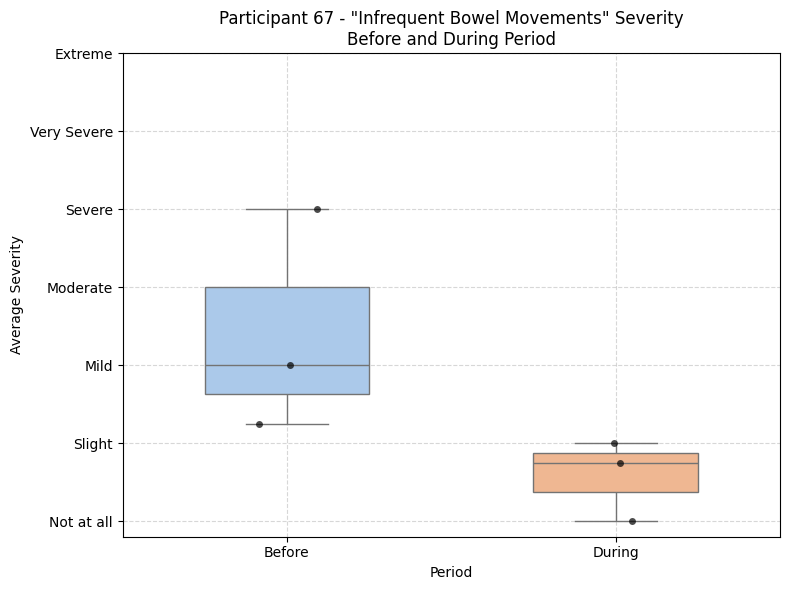

<ipython-input-8-c1bb5cd4c6dc>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


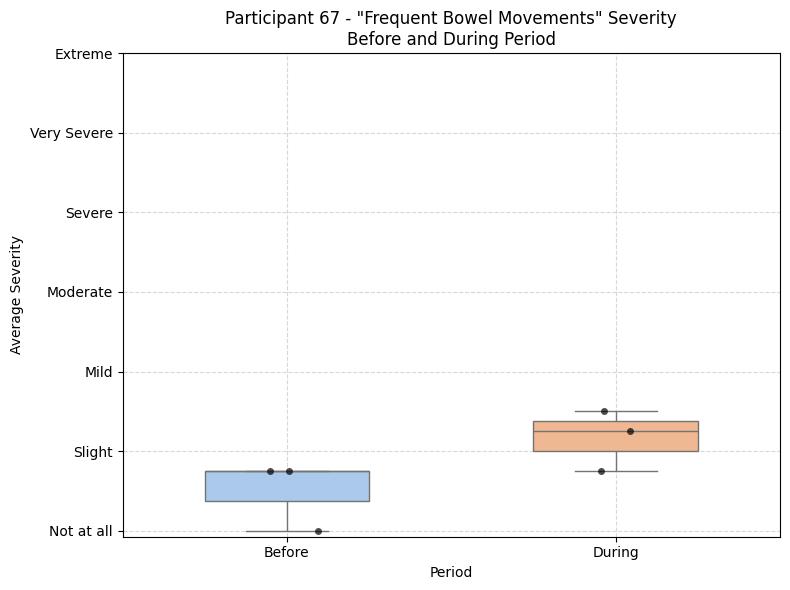

<ipython-input-8-c1bb5cd4c6dc>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


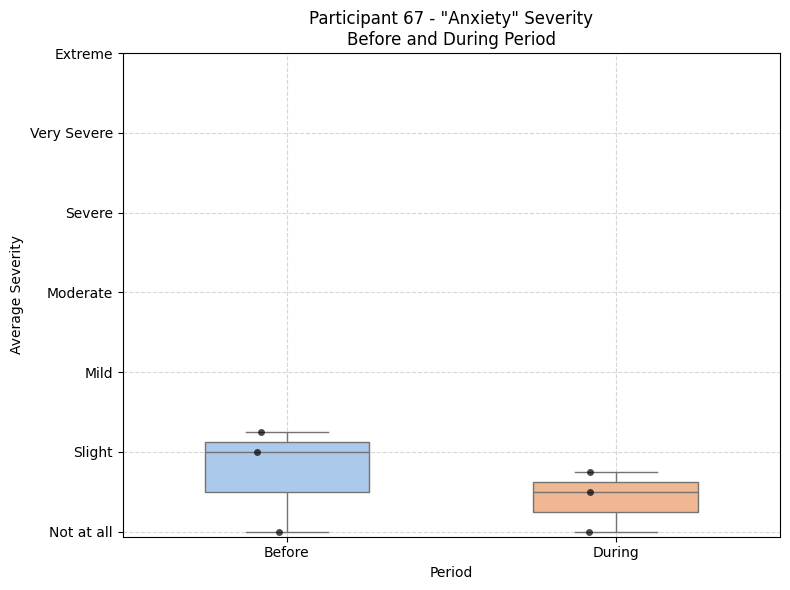

<ipython-input-8-c1bb5cd4c6dc>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


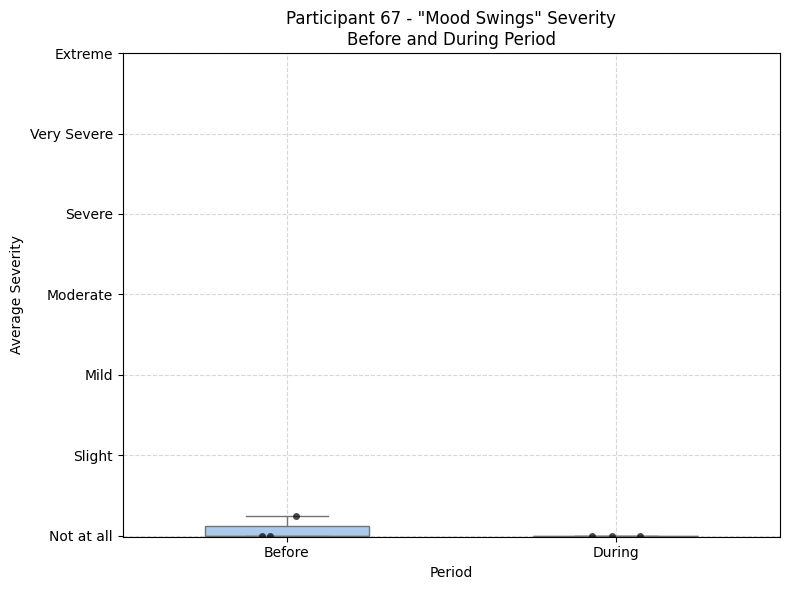

<ipython-input-8-c1bb5cd4c6dc>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


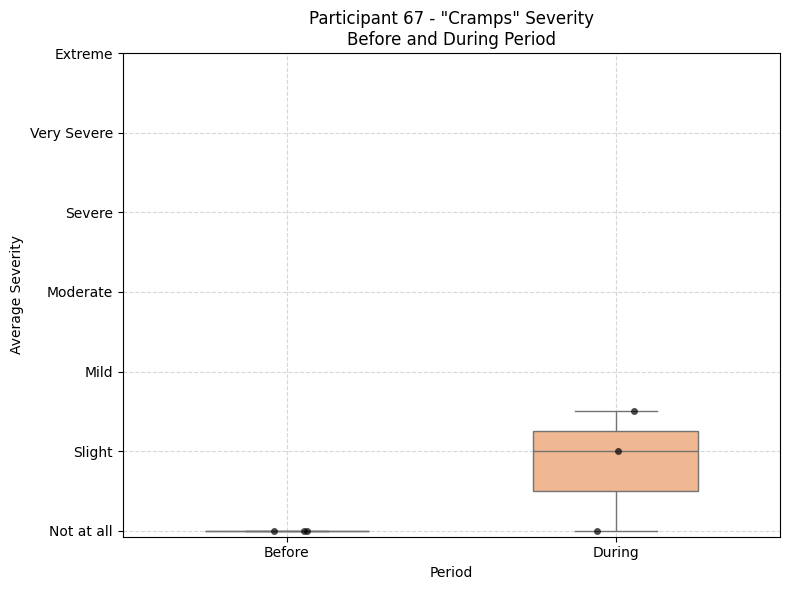

<ipython-input-8-c1bb5cd4c6dc>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


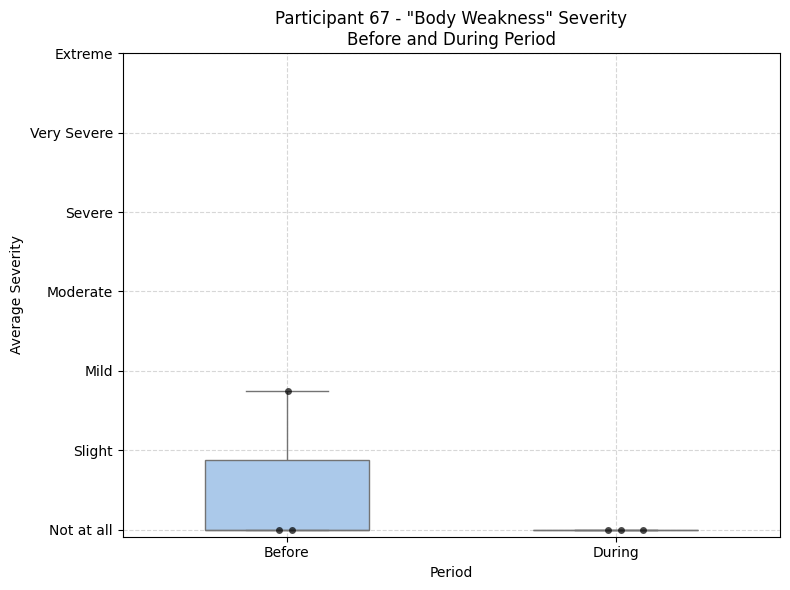

<ipython-input-8-c1bb5cd4c6dc>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


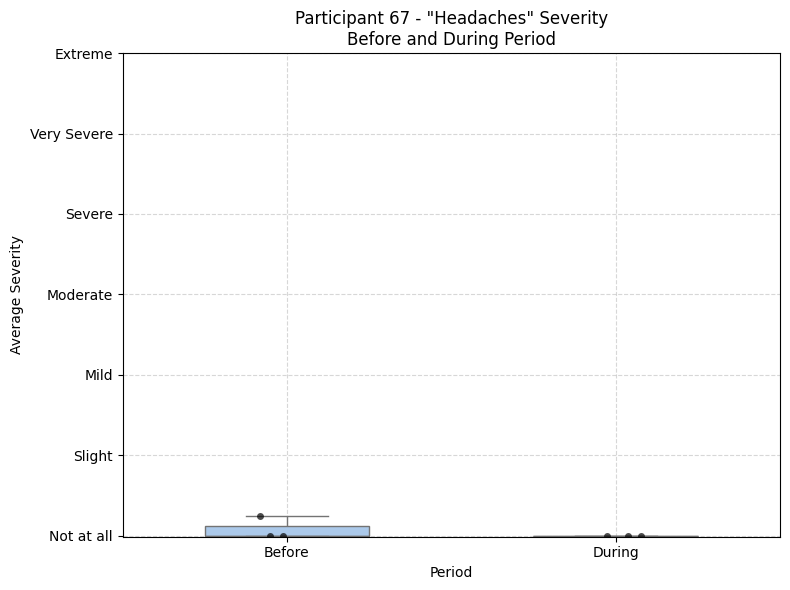

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === CONFIGURATION ===
participant_file = 'Symptoms - 67.csv'  # Change to 67 or 69 if needed
participant_id = '67'                   # Should match the filename above
# ======================

# Severity mapping
severity_map = {
    'Not at all': 0,
    'Slight': 1,
    'Mild': 2,
    'Moderate': 3,
    'Severe': 4,
    'Very Severe': 5
}

# Load participant data
df = pd.read_csv(participant_file)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# List all symptoms in the dataset
all_symptoms = df['symptom_name'].dropna().unique()

# Process each symptom
for symptom in all_symptoms:
    df_symptom = df[df['symptom_name'] == symptom].copy()

    # Identify first 6 dates and classify period
    first_six_dates = df_symptom['date'].dt.date.unique()[:6]
    period_labels = {d: 'Before' if i < 3 else 'During' for i, d in enumerate(first_six_dates)}
    df_symptom['period'] = df_symptom['date'].dt.date.map(period_labels)
    df_symptom = df_symptom.dropna(subset=['period'])

    # Skip if no valid entries
    if df_symptom.empty:
        continue

    # Convert severity strings to numeric
    time_periods = ['morning_severity', 'afternoon_severity', 'evening_severity', 'night_severity']
    for tp in time_periods:
        df_symptom[tp] = df_symptom[tp].map(severity_map)

    # Calculate average severity
    df_symptom['average_severity'] = df_symptom[time_periods].mean(axis=1)

    # Plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')
    sns.stripplot(x='period', y='average_severity', data=df_symptom, color='black', alpha=0.7, jitter=True)

    plt.title(f'Participant {participant_id} - "{symptom}" Severity\nBefore and During Period')
    plt.xlabel('Period')
    plt.ylabel('Average Severity')

    # Set custom y-axis labels
    severity_labels = ['Not at all', 'Slight', 'Mild', 'Moderate', 'Severe', 'Very Severe', 'Extreme']
    plt.yticks(ticks=range(len(severity_labels)), labels=severity_labels)

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


<ipython-input-9-4c1aa178e494>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


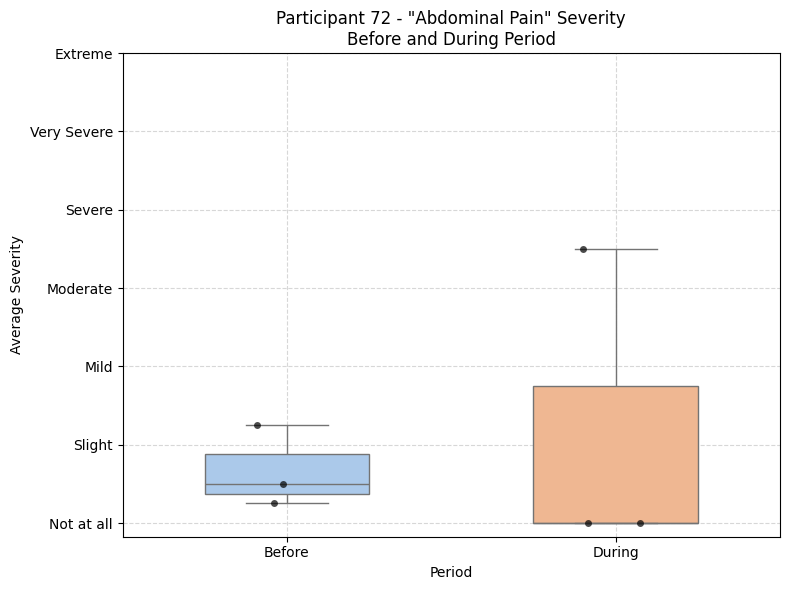

<ipython-input-9-4c1aa178e494>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


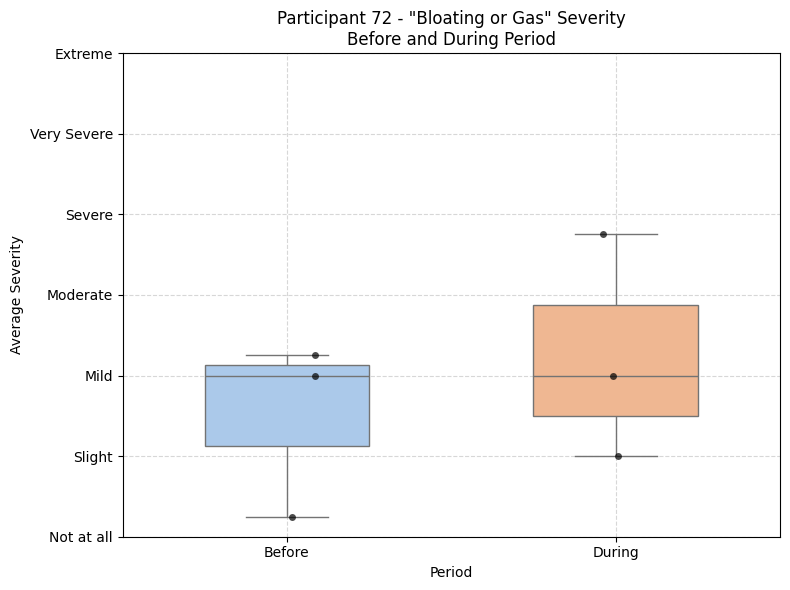

<ipython-input-9-4c1aa178e494>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


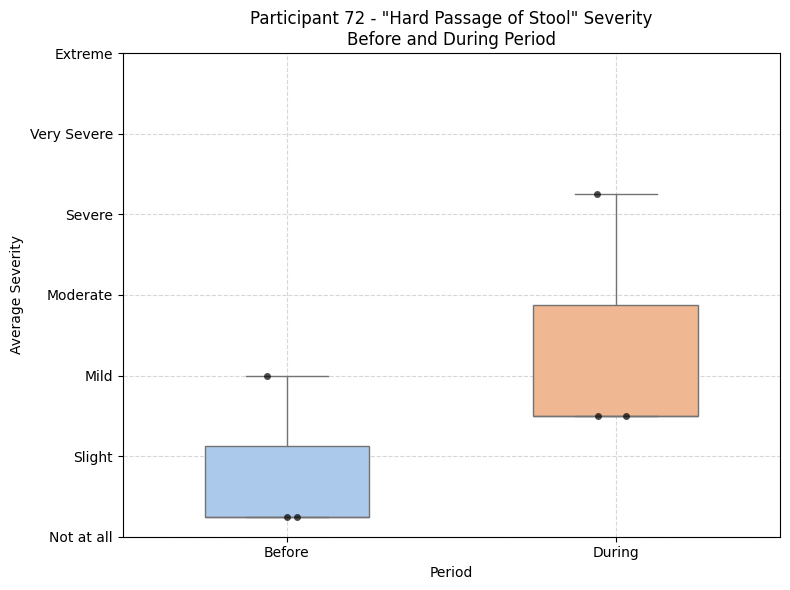

<ipython-input-9-4c1aa178e494>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


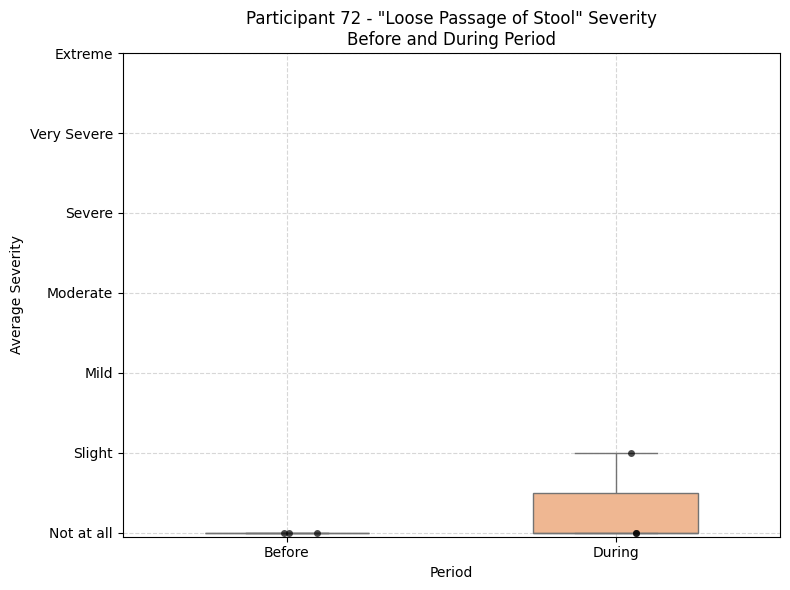

<ipython-input-9-4c1aa178e494>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


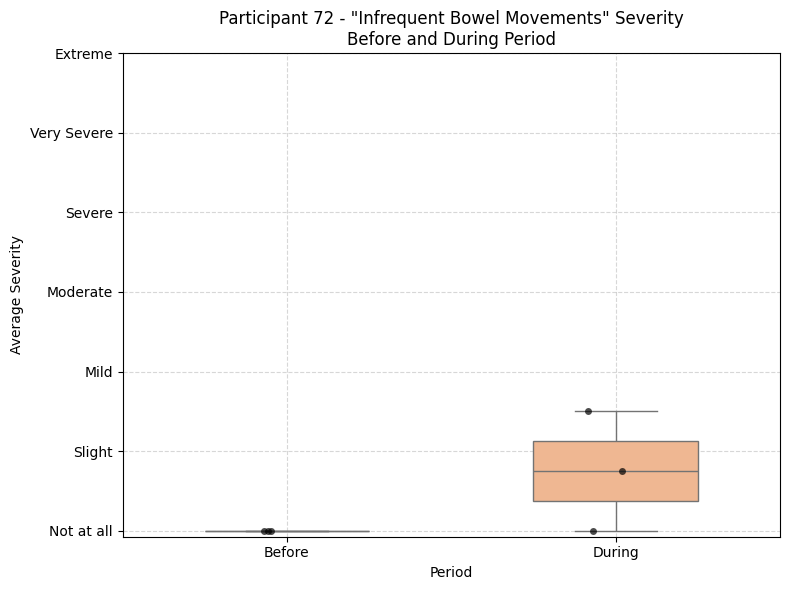

<ipython-input-9-4c1aa178e494>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


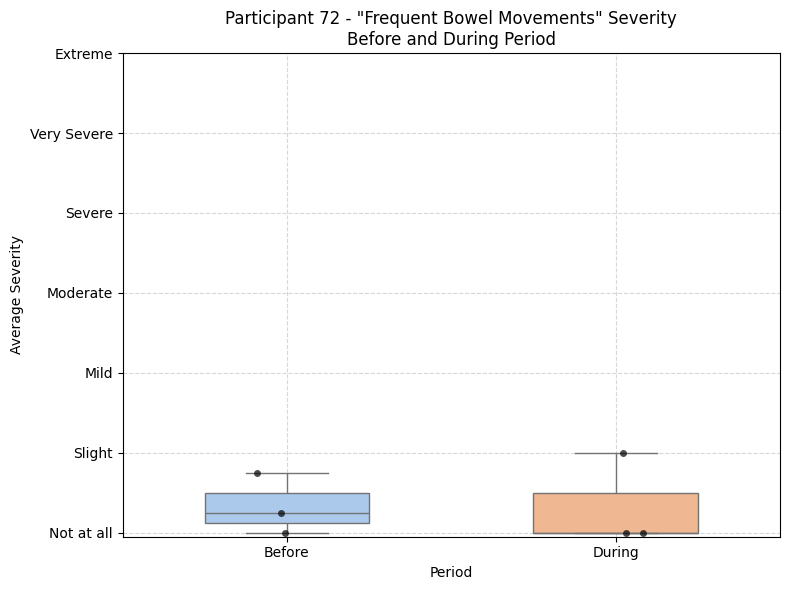

<ipython-input-9-4c1aa178e494>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


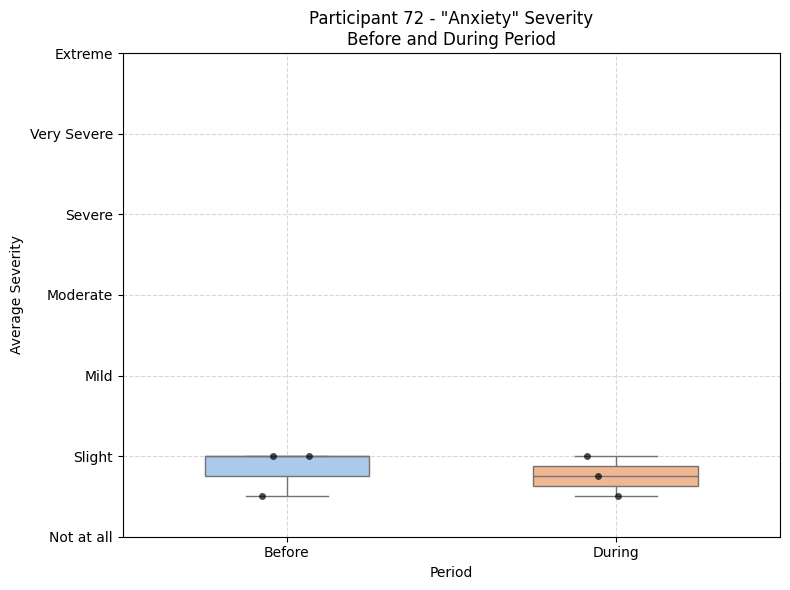

<ipython-input-9-4c1aa178e494>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


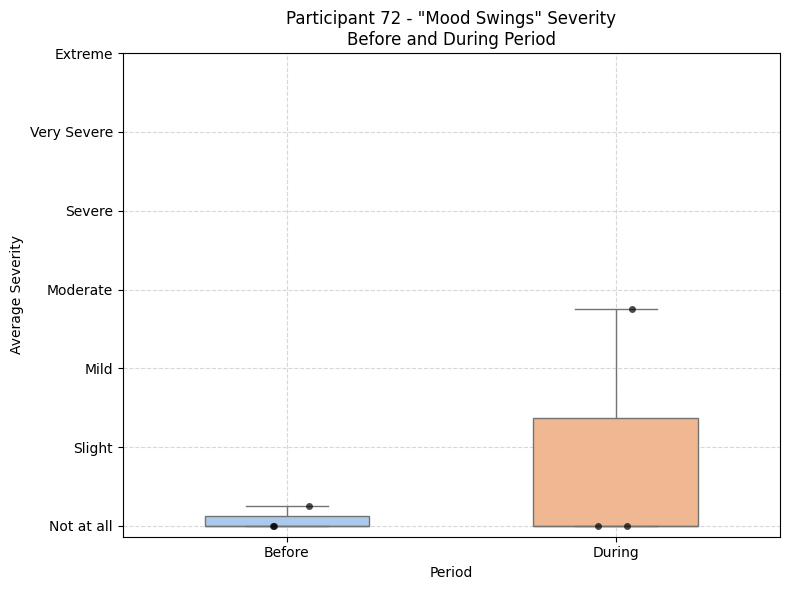

<ipython-input-9-4c1aa178e494>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


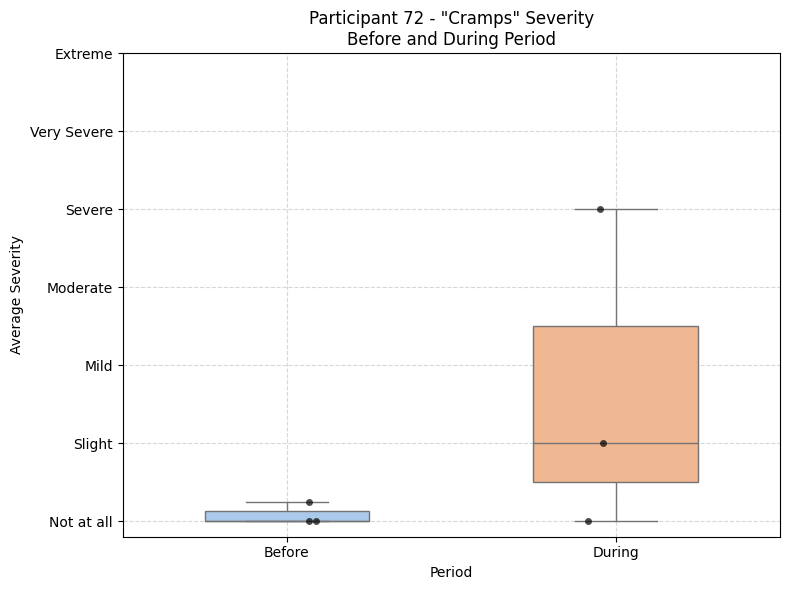

<ipython-input-9-4c1aa178e494>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


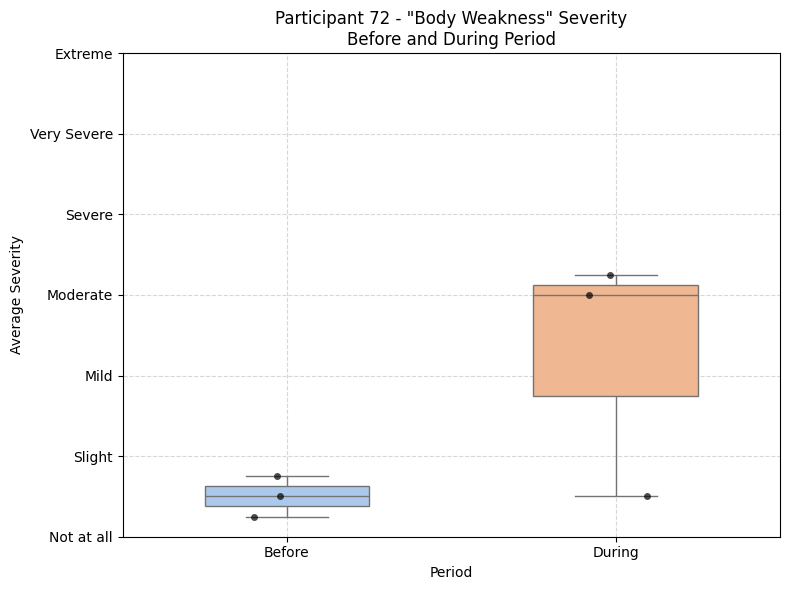

<ipython-input-9-4c1aa178e494>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


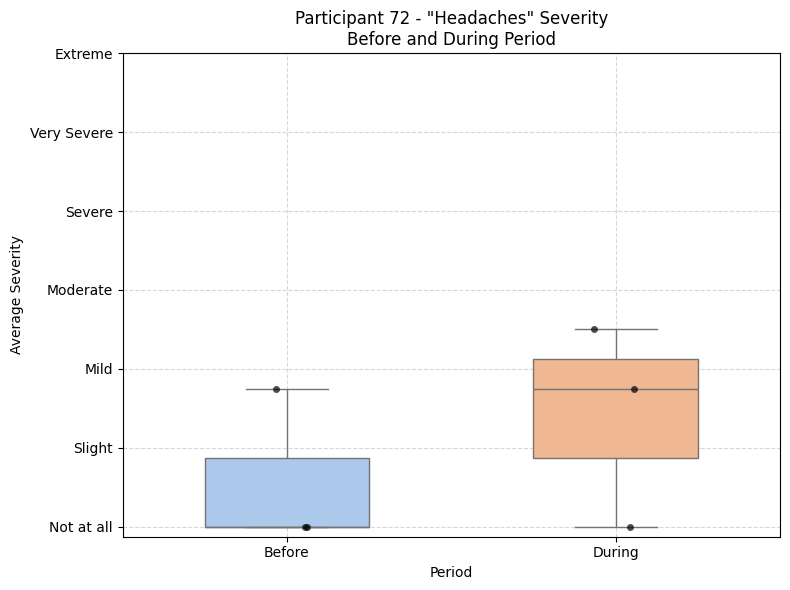

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === CONFIGURATION ===
participant_file = 'Symptoms - 72.csv'  # Change to 67 or 69 if needed
participant_id = '72'                   # Should match the filename above
# ======================

# Severity mapping
severity_map = {
    'Not at all': 0,
    'Slight': 1,
    'Mild': 2,
    'Moderate': 3,
    'Severe': 4,
    'Very Severe': 5
}

# Load participant data
df = pd.read_csv(participant_file)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# List all symptoms in the dataset
all_symptoms = df['symptom_name'].dropna().unique()

# Process each symptom
for symptom in all_symptoms:
    df_symptom = df[df['symptom_name'] == symptom].copy()

    # Identify first 6 dates and classify period
    first_six_dates = df_symptom['date'].dt.date.unique()[:6]
    period_labels = {d: 'Before' if i < 3 else 'During' for i, d in enumerate(first_six_dates)}
    df_symptom['period'] = df_symptom['date'].dt.date.map(period_labels)
    df_symptom = df_symptom.dropna(subset=['period'])

    # Skip if no valid entries
    if df_symptom.empty:
        continue

    # Convert severity strings to numeric
    time_periods = ['morning_severity', 'afternoon_severity', 'evening_severity', 'night_severity']
    for tp in time_periods:
        df_symptom[tp] = df_symptom[tp].map(severity_map)

    # Calculate average severity
    df_symptom['average_severity'] = df_symptom[time_periods].mean(axis=1)

    # Plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')
    sns.stripplot(x='period', y='average_severity', data=df_symptom, color='black', alpha=0.7, jitter=True)

    plt.title(f'Participant {participant_id} - "{symptom}" Severity\nBefore and During Period')
    plt.xlabel('Period')
    plt.ylabel('Average Severity')

    # Set custom y-axis labels
    severity_labels = ['Not at all', 'Slight', 'Mild', 'Moderate', 'Severe', 'Very Severe', 'Extreme']
    plt.yticks(ticks=range(len(severity_labels)), labels=severity_labels)

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

<ipython-input-10-38ff088aff4a>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


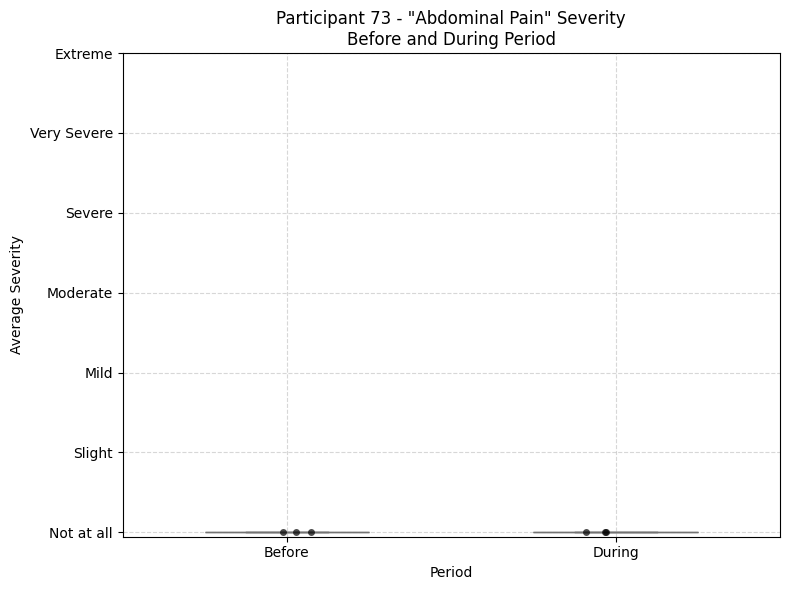

<ipython-input-10-38ff088aff4a>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


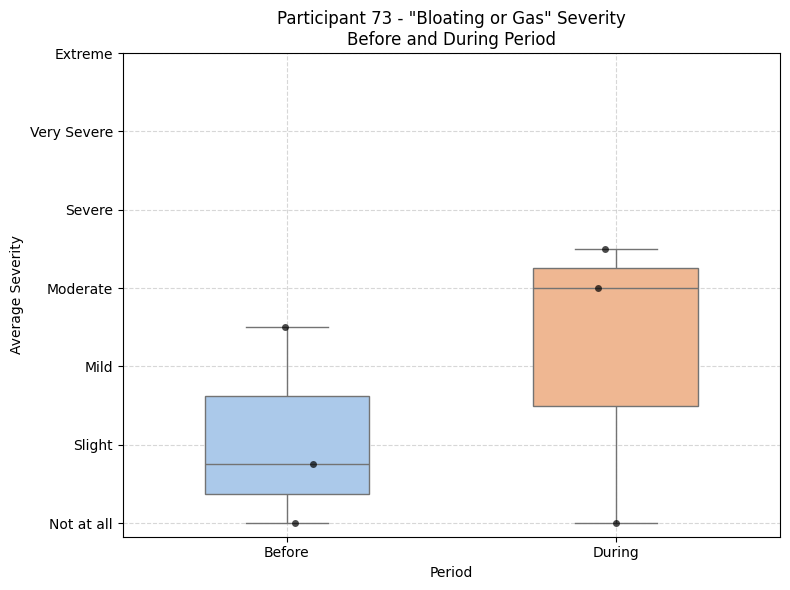

<ipython-input-10-38ff088aff4a>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


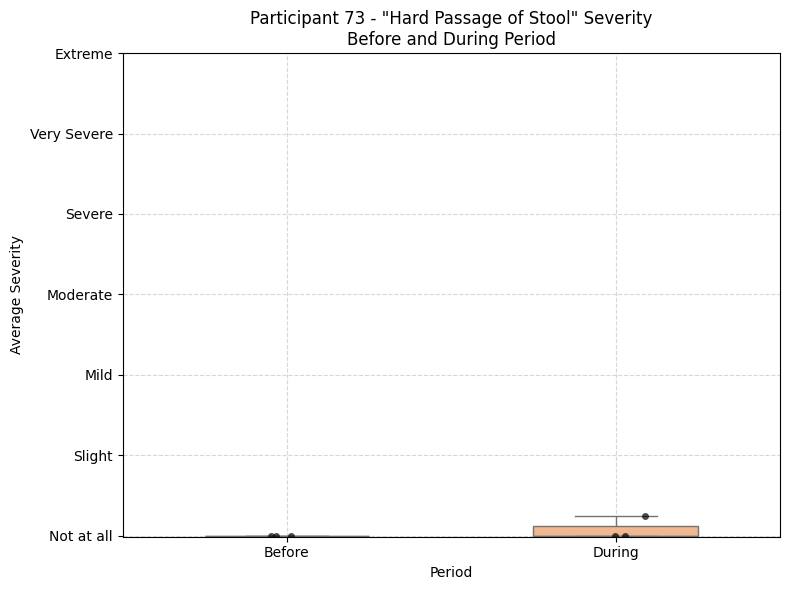

<ipython-input-10-38ff088aff4a>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


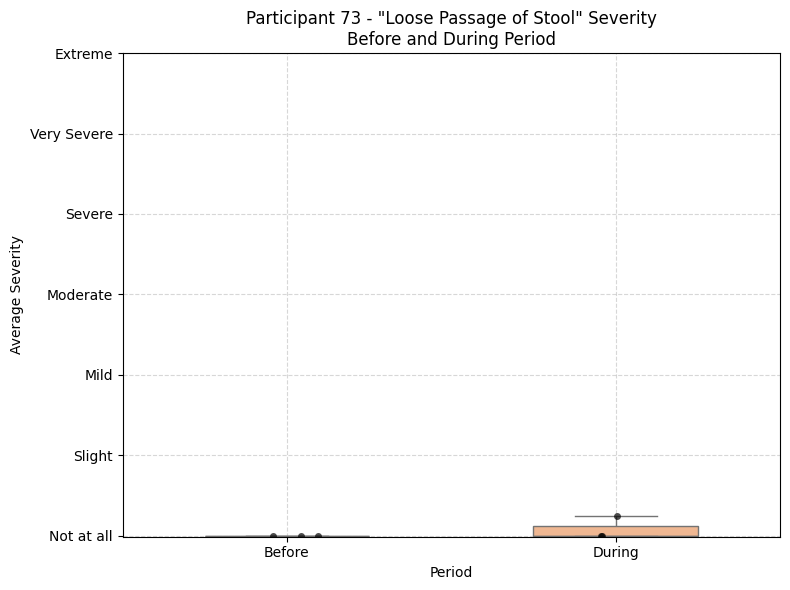

<ipython-input-10-38ff088aff4a>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


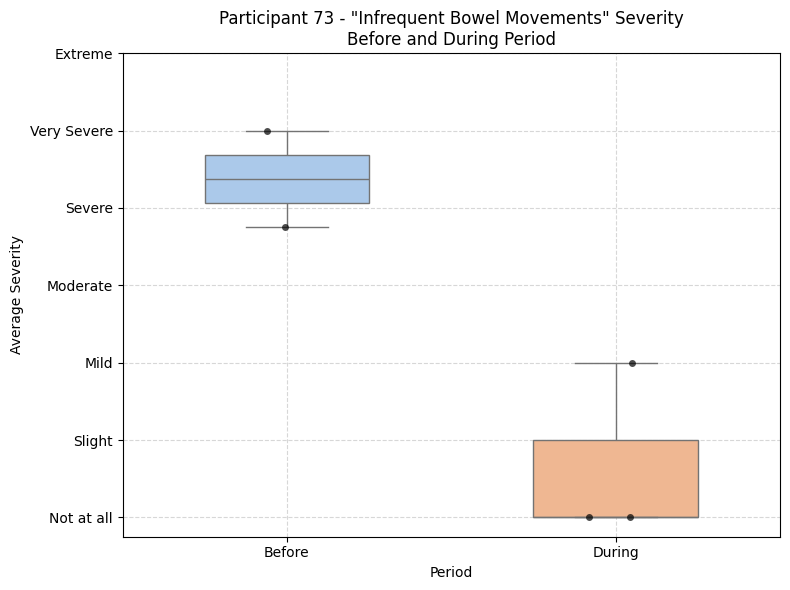

<ipython-input-10-38ff088aff4a>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


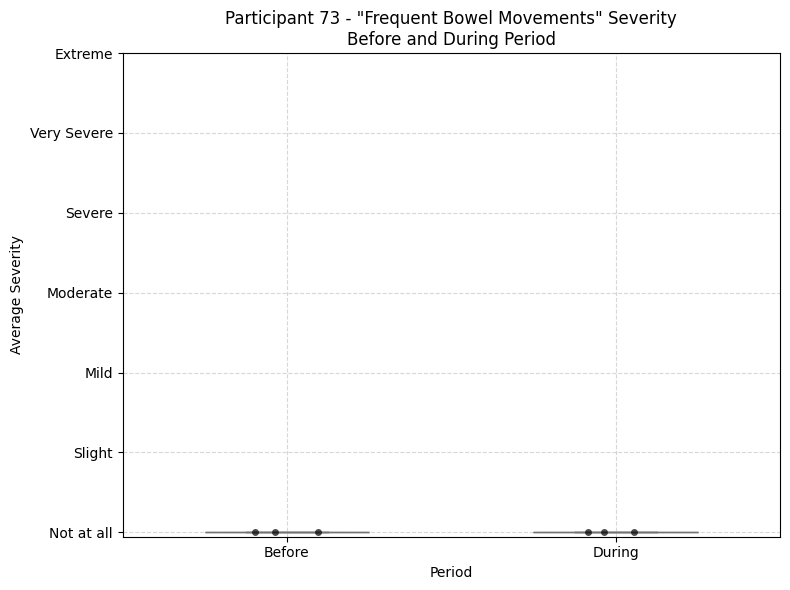

<ipython-input-10-38ff088aff4a>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


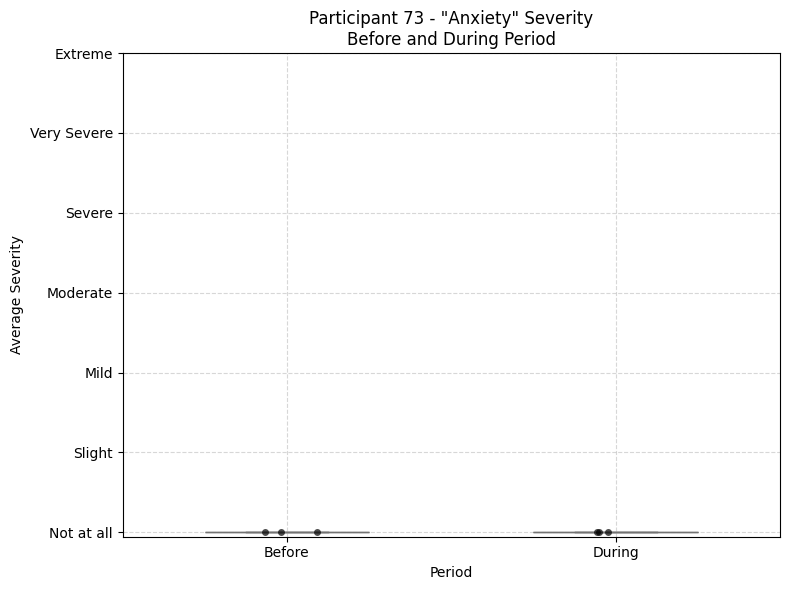

<ipython-input-10-38ff088aff4a>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


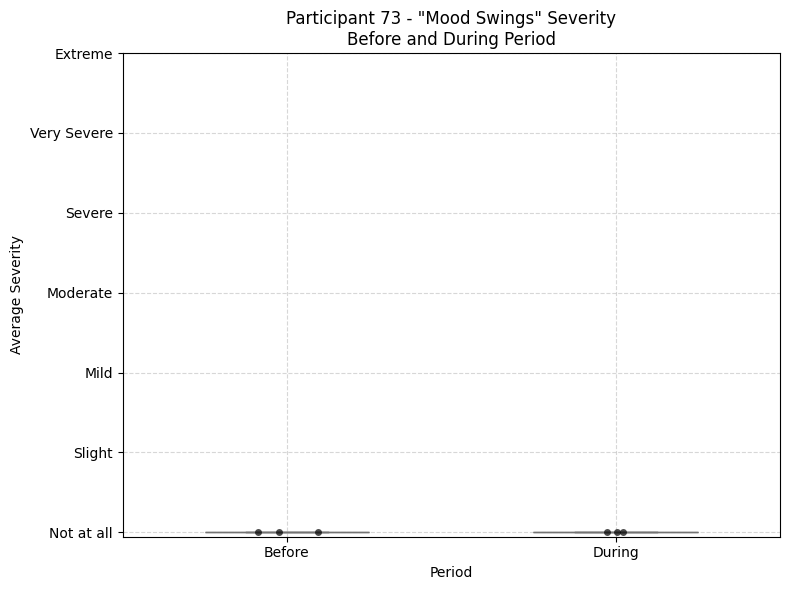

<ipython-input-10-38ff088aff4a>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


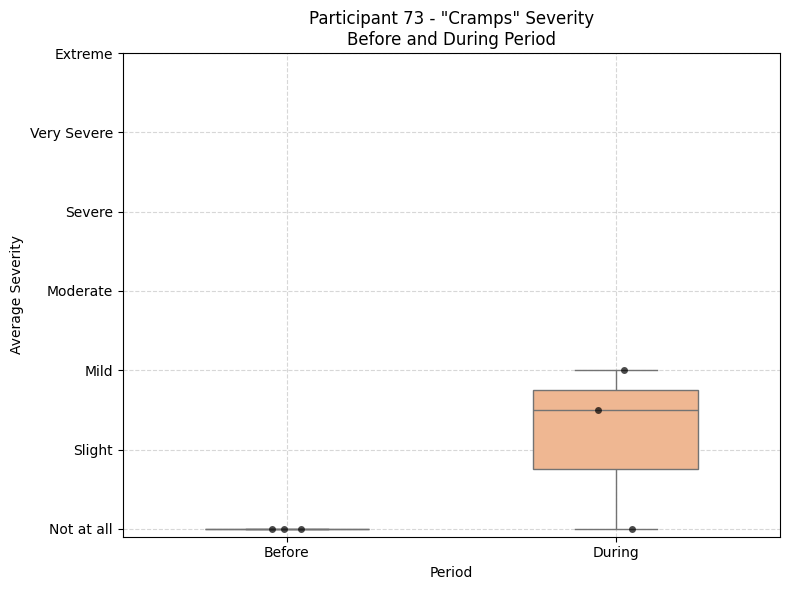

<ipython-input-10-38ff088aff4a>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


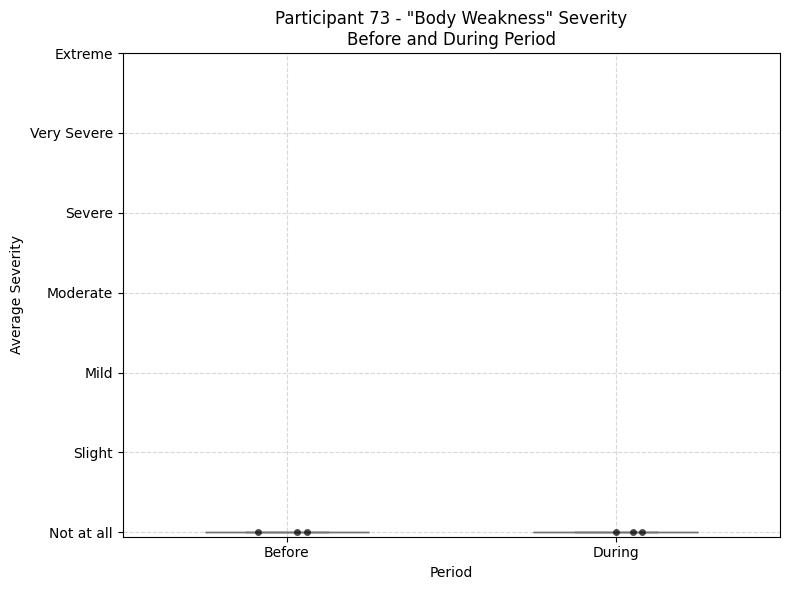

<ipython-input-10-38ff088aff4a>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')


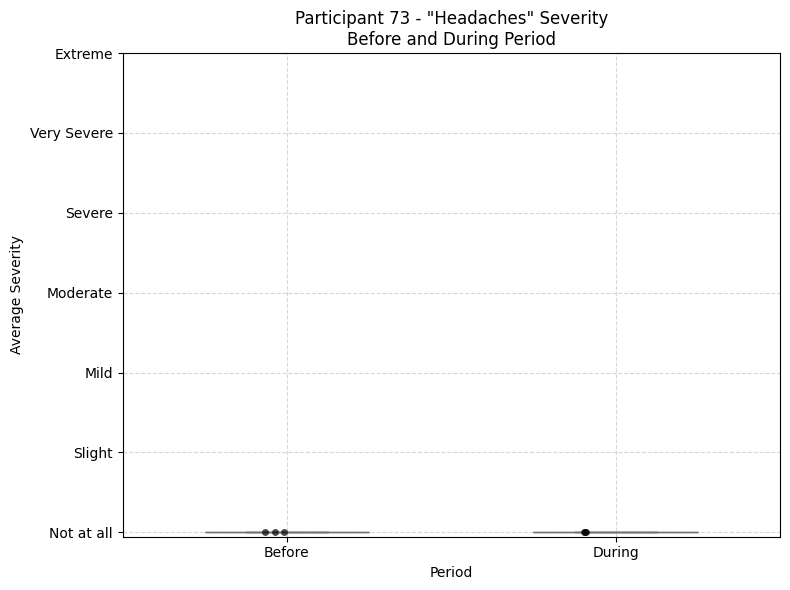

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === CONFIGURATION ===
participant_file = 'Symptoms - 73.csv'  # Change to 67 or 69 if needed
participant_id = '73'                   # Should match the filename above
# ======================

# Severity mapping
severity_map = {
    'Not at all': 0,
    'Slight': 1,
    'Mild': 2,
    'Moderate': 3,
    'Severe': 4,
    'Very Severe': 5
}

# Load participant data
df = pd.read_csv(participant_file)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# List all symptoms in the dataset
all_symptoms = df['symptom_name'].dropna().unique()

# Process each symptom
for symptom in all_symptoms:
    df_symptom = df[df['symptom_name'] == symptom].copy()

    # Identify first 6 dates and classify period
    first_six_dates = df_symptom['date'].dt.date.unique()[:6]
    period_labels = {d: 'Before' if i < 3 else 'During' for i, d in enumerate(first_six_dates)}
    df_symptom['period'] = df_symptom['date'].dt.date.map(period_labels)
    df_symptom = df_symptom.dropna(subset=['period'])

    # Skip if no valid entries
    if df_symptom.empty:
        continue

    # Convert severity strings to numeric
    time_periods = ['morning_severity', 'afternoon_severity', 'evening_severity', 'night_severity']
    for tp in time_periods:
        df_symptom[tp] = df_symptom[tp].map(severity_map)

    # Calculate average severity
    df_symptom['average_severity'] = df_symptom[time_periods].mean(axis=1)

    # Plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='period', y='average_severity', data=df_symptom, whis=1.5, width=0.5, palette='pastel')
    sns.stripplot(x='period', y='average_severity', data=df_symptom, color='black', alpha=0.7, jitter=True)

    plt.title(f'Participant {participant_id} - "{symptom}" Severity\nBefore and During Period')
    plt.xlabel('Period')
    plt.ylabel('Average Severity')

    # Set custom y-axis labels
    severity_labels = ['Not at all', 'Slight', 'Mild', 'Moderate', 'Severe', 'Very Severe', 'Extreme']
    plt.yticks(ticks=range(len(severity_labels)), labels=severity_labels)

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

